# Capstone Project: BikeShare Toronto
## Part 1: Data Clean & EDA
---
**Author:** Jason Ho<br>
**Date:** July 1st, 2021

### Changelog

#### Version 1.0
**New**<br>
    - Added datasets for November and December of 2020

#### Version 1.1
**New**<br>
    - Added comments throughout notebook explaining thought process<br>
    - Added Conclusions<br>
**Changes**<br>
    - Changed the introduction by including background information on data sets<br>
    - Changed Business Case Question<br>
    - Changed API requests for Nominatim code<br>
**Fixes**<br>
    - Removed station names relating to maintenance and repair<br>
    - Removed feature cleaning for `physical_configuration`, `address`, `rental_methods`, `groups`, `obcn`, `nearby_distance`, `cross_street`<br>
    - Removed unnecessary API requests<br>
    - Removed Map Visualizations<br>
    
 #### Version 1.2
**New**<br>
    - Added sections for data cleaning steps for easier reading<br>
    - Added option to keep trip duration in seconds
    - Added more comments throughtout notebook<br>
**Changes**<br>
    - Changed the layout of notebook and condensed sections so that the reader can follow along easier<br>
    - Removed redundant code<br>
**Fixes**<br>
    - Fixed coding for imputing missing station ids in trips17 & missing station names in trip 20 dataset<br>
    - Fixed issue regarding datetime datatype change in trips17 dataset<br>
    - Fixed classifer for User Types<br>
_____________________________________________

## Introduction

This Jupyter Notebook is Part 1 of my Capstone Project for the Data Science Program at BrainStation. I will be using the BikeShare Toronto data set and hourly weather data gathered from Environment Canada, between the dates of 2017-01-01 to 2020-12-31.

**Background**<br>
BikeShare Toronto is a bike-share program that features more than 6,850 bicycles and 625 docking stations across 200sqkm of the city. BikeShare Toronto provides a flexible and cost-effective way to navigate Toronto with their traditional bikes and e-bikes. Both options cost the same rate at \$3.25 per trip and the service offers short-term pass options (Single Day (24 hours), or 3 Day (72 Hours)) as well as long-term memberships (Annual 30 (30min rides), or Annual 45 (45min rides)).

**Objective**<br>
The objective of my Capstone Project is to answer the *Business Case Question* of:

**<center>Accurately predict bike usage numbers based on past usage patterns</center>**

The ability to predict usage levels are beneficial to many industries in terms of strategic planning and logistics where you can plan and adjust inventory and distribution across the system accordingly so that you can maximize efficiency and revenue generation.

**Purpose**<br>
The purpose of this notebook is to consolidate the downloaded BikeShare Toronto data and hourly weather data into a single dataframe, then conducting an exploratory data analysis, and produce some visualizations that we can gain some insights on **HOW** riders use the bikeshare service. Then we will export the cleaned data set to use in Part 2 to create a machine learning model to answer our *Business Case Question*.

**Data Sources**<br>
The data is to be gathered is from the following sources:

1. [City of Toronto: Open Data](https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/): City of Toronto has an open data catalogue where I obtained Toronto BikeShare trip datasets from 2017 to 2020. This will be the main source of trip data that will be analyzed.

2. [CKAN](https://ckan0.cf.opendata.inter.prod-toronto.ca/en/dataset/bike-share-toronto): CKAN is an open-source data portal platform where I obtained the links to the Toronto BikeShare API to request up-to-date data regarding BikeShare station information. I will be querying the API for any more useful information that can help with my objective.

3. [Government of Canada](https://climate.weather.gc.ca/historical_data/search_historic_data_e.html): Government of Canada has a catalogue of historical weather data throughout various weather stations across Canada. Weather affects bike usage, where incliment weather causes people to ride bikes less.

Aside from the data I am gathering above, I will also add in calendar information such as weekends and holidays as it may have an affect the number of riders will use the bike share service.

**Next Steps**<br>
After loading in the data sets, I will be checking the data and then cleaning it by imputation and/or removing any null values then combining the datasets together as my main working dataset.

If you wish to follow along, you will need to create a new conda environment by using the package list included in the zip folder by running the script below.

```bash
conda create -n jho_capstone_env --file jho_capstone_env.txt
```
You may change jho_capstone_env to any name you prefer.

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Timer
from tqdm import tqdm 
import time

# global settings
pd.set_option('display.max_columns', None) #Set max columns view to unlimited

## Table of Contents
[Section 1: Loading and Inspecting the Data](#Section-1:-Loading-and-Inspecting-the-Data)<br>
- [Part 1: Trips Datasets](#Part-1:-Trips-Datasets)

- [Part 2: Weather Datasets](#Part-2:-Weather-Datasets)

[Section 2: Data Wrangling](#Section-2:-Data-Wrangling)<br>
- [Part 1: Trip Datasets](#Part-1:-Trip-Datasets)

- [Part 2: Weather Datasets](#Part-2:-Weather-Datasets)

- [Part 3: Loading API Datasets](#Part-3:-Loading-API-Datasets)

- [Part 4: Creating Master Dataframe](#Part-4:-Creating-Master-Dataframe)

[Section 3: Exploratory Data Analysis](#Section-3:-Exploratory-Data-Analysis)<br>
- [Histograms](#Histograms)<br>
- [Time Scale Graphs](#Time-Scale-Graphs)<br>

[Section 4: Conclusions](#Section-4:-Conclusions)<br>

---
## Step 1: Loading and Inspecting the Data

In [2]:
# Condense below load data code into loops.
# [Code Source](https://swcarpentry.github.io/python-novice-gapminder/14-looping-data-sets/)

# `for filename in glob.glob('data/gapminder_*.csv'):
#     data = pd.read_csv(filename)`

### Part 1: Trip Data
#### **2017 & 2018 Trip Data**
**_About the Data_**

The 2017 trip dataset contains 1,492,369 bike trip data taken between more than 600 stations across the City of Toronto. The 2018 trip dataset contains 1,922,955 bike trip data. Both datasets contains 9 features. The description of each feature is listed below:

- `trip_id`: Unique ID code for individual trip taken.
- `trip_start_time`: Trip start time.
- `trip_end_time`: Trip end time.
- `trip_duration_seconds`: Duration of the trip in seconds.
- `from_station_id`: Unique ID code for the start station.
- `from_station_name`: Name of start station.
- `to_station_id`: Unique ID code for the end station.
- `to_station_name`: Name of end station.
- `user_type`: Type of user, either Member or Casual.

In [3]:
# Load in 2017 & 2018 datasets
# Change directory accordingly to where you saved the data files in relation to this notebook

Q1_17 = pd.read_csv('../data/raw/Bikeshare 2017/2017-Q1.csv')
Q2_17 = pd.read_csv('../data/raw/Bikeshare 2017/2017-Q2.csv')
Q3_17 = pd.read_csv('../data/raw/Bikeshare 2017/2017-Q3.csv')
Q4_17 = pd.read_csv('../data/raw/Bikeshare 2017/2017-Q4.csv')

Q1_18 = pd.read_csv('../data/raw/Bikeshare 2018/2018-Q1.csv')
Q2_18 = pd.read_csv('../data/raw/Bikeshare 2018/2018-Q2.csv')
Q3_18 = pd.read_csv('../data/raw/Bikeshare 2018/2018-Q3.csv')
Q4_18 = pd.read_csv('../data/raw/Bikeshare 2018/2018-Q4.csv')

#### **2017 & 2018 Trip Data**
**_About the Data_**

The 2019 trip dataset contains 2,439,517 bike trip data taken between more than 600 stations across the City of Toronto. The 2020 trip dataset contains 2,612,704 bike trip data. Starting 2019, the data feature names changed and 2 additional features were added making it 11 total. The description of each feature is listed below:

- `Trip Id`: Unique ID code for individual trip taken.
- `Subscription Id`: Unique ID code for the individual member, this can be used to track Annual Member usage.
- `Trip  Duration`: Duration of the trip in seconds.
- `Start Station Id`: Unique ID code for the start station.
- `Start Time`: Trip start time.
- `Start Station Name`: Name of start station.
- `End Station Id`: Unique ID code for the end station.
- `End Time`: Trip end time.
- `End Station Name`: Name of end station.
- `Bike Id`: Unique ID for the individual bike used.
- `User Type`: Type of user, either Annual or Casual.

In [4]:
# Load in 2019 & 2020 datasets
# Change directory accordingly to where you saved the data files in relation to this notebook

Q1_19 = pd.read_csv('../data/raw/Bikeshare 2019/2019-Q1.csv')
Q2_19 = pd.read_csv('../data/raw/Bikeshare 2019/2019-Q2.csv')
Q3_19 = pd.read_csv('../data/raw/Bikeshare 2019/2019-Q3.csv')
Q4_19 = pd.read_csv('../data/raw/Bikeshare 2019/2019-Q4.csv')

M1_20 = pd.read_csv('../data/raw/Bikeshare 2020/2020-01.csv')
M2_20 = pd.read_csv('../data/raw/Bikeshare 2020/2020-02.csv')
M3_20 = pd.read_csv('../data/raw/Bikeshare 2020/2020-03.csv')
M4_20 = pd.read_csv('../data/raw/Bikeshare 2020/2020-04.csv')
M5_20 = pd.read_csv('../data/raw/Bikeshare 2020/2020-05.csv')
M6_20 = pd.read_csv('../data/raw/Bikeshare 2020/2020-06.csv')
M7_20 = pd.read_csv('../data/raw/Bikeshare 2020/2020-07.csv')
M8_20 = pd.read_csv('../data/raw/Bikeshare 2020/2020-08.csv')
M9_20 = pd.read_csv('../data/raw/Bikeshare 2020/2020-09.csv')
M10_20 = pd.read_csv('../data/raw/Bikeshare 2020/2020-10.csv')
M11_20 = pd.read_csv('../data/raw/Bikeshare 2020/2020-11.csv')
M12_20 = pd.read_csv('../data/raw/Bikeshare 2020/2020-12.csv')

#### **2017-2020 Weather Data**
**_About the Data_**

The following datasets contains 8,760 weather datapoints taken during the each year between 2017-2020 recorded from a weather station located on the Toronto Island. The csv contains 28 features. The description of each feature is listed below:

- `Longitude (x)`: The longitude geo-coordinate of the weather station
- `Latitude (y)`: The longitude geo-coordinate of the weather station
- `Station Name`: The name of the weather station
- `Climate ID`: The Climate ID is a 7 digit number assigned by the Meteorological Service of Canada to a site where official weather observations are taken, and serves as a permanent, unique identifier.
- `Date/Time`: The date and time of when the weather data was collected.
- `Year`: The year the data was collected.
- `Month`: The month the data was collected.
- `Day`: The day the data was collected.
- `Time`: The time of day the data was collected.
- `Temp (°C)`: The temperature of the air in degrees Celsius (°C). 
- `Temp Flag`: Flag for unique events for temperature.
- `Dew Point Temp (°C)`: The dew point temperature in degrees Celsius (°C), a measure of the humidity of the air, is the temperature to which the air would have to be cooled to reach saturation with respect to liquid water. Saturation occurs when the air is holding the maximum water vapour possible at that temperature and atmospheric pressure.
- `Dew Point Temp Flag`: Flag for unique events for dew point temp.
- `Rel Hum (%)`: Relative humidity in percent (%) is the ratio of the quantity of water vapour the air contains compared to the maximum amount it can hold at that particular temperature.
- `Rel Hum Flag`: Flag for unique events for relative humidity.
- `Wind Dir (10s deg)`: The speed of motion of air in kilometres per hour (km/h) usually observed at 10 metres above the ground. It represents the average speed during the one-, two- or ten-minute period ending at the time of observation.
- `Wind Dir Flag`: Flag for unique events for wind direction.
- `Wind Spd (km/h)`: The speed of motion of air in kilometres per hour (km/h) usually observed at 10 metres above the ground. It represents the average speed during the one-, two- or ten-minute period ending at the time of observation.
- `Wind Spd Flag`: Flag for unique events for wind speed.
- `Visibility (km)`: Visibility in kilometres (km) is the distance at which objects of suitable size can be seen and identified.
- `Visibility Flag`: Flag for unique events for visibility.
- `Stn Press (kPa)`: The atmospheric pressure in kilopascals (kPa) at the station elevation. Atmospheric pressure is the force per unit area exerted by the atmosphere as a consequence of the mass of air in a vertical column from the elevation of the observing station to the top of the atmosphere.
- `Stn Press Flag`: Flag for unique events for station atmospheric pressure.
- `Hmdx`: Humidex is an index to indicate how hot or humid the weather feels to the average person. It is derived by combining temperature and humidity values into one number to reflect the perceived temperature.
- `Hmdx Flag`: Flag for unique events for humidex.
- `Wind Chill`: Wind chill is an index to indicate how cold the weather feels to the average person. It is derived by combining temperature and wind velocity values into one number to reflect the perceived temperature.
- `Wind Chill Flag`: Flag for unique events for wind chill index.
- `Weather`: Observations of atmospheric phenomenon including the occurrence of weather and obstructions to vision have been taken at many hourly reporting stations.

In [5]:
# Load in Weather datasets
# Change directory accordingly to where you saved the data files in relation to this notebook

W1_17 = pd.read_csv('../data/raw/Weather 2017/en_climate_hourly_ON_6158359_01-2017_P1H.csv')
W2_17 = pd.read_csv('../data/raw/Weather 2017/en_climate_hourly_ON_6158359_02-2017_P1H.csv')
W3_17 = pd.read_csv('../data/raw/Weather 2017/en_climate_hourly_ON_6158359_03-2017_P1H.csv')
W4_17 = pd.read_csv('../data/raw/Weather 2017/en_climate_hourly_ON_6158359_04-2017_P1H.csv')
W5_17 = pd.read_csv('../data/raw/Weather 2017/en_climate_hourly_ON_6158359_05-2017_P1H.csv')
W6_17 = pd.read_csv('../data/raw/Weather 2017/en_climate_hourly_ON_6158359_06-2017_P1H.csv')
W7_17 = pd.read_csv('../data/raw/Weather 2017/en_climate_hourly_ON_6158359_07-2017_P1H.csv')
W8_17 = pd.read_csv('../data/raw/Weather 2017/en_climate_hourly_ON_6158359_08-2017_P1H.csv')
W9_17 = pd.read_csv('../data/raw/Weather 2017/en_climate_hourly_ON_6158359_09-2017_P1H.csv')
W10_17 = pd.read_csv('../data/raw/Weather 2017/en_climate_hourly_ON_6158359_10-2017_P1H.csv')
W11_17 = pd.read_csv('../data/raw/Weather 2017/en_climate_hourly_ON_6158359_11-2017_P1H.csv')
W12_17 = pd.read_csv('../data/raw/Weather 2017/en_climate_hourly_ON_6158359_12-2017_P1H.csv')

W1_18 = pd.read_csv('../data/raw/Weather 2018/en_climate_hourly_ON_6158359_01-2018_P1H.csv')
W2_18 = pd.read_csv('../data/raw/Weather 2018/en_climate_hourly_ON_6158359_02-2018_P1H.csv')
W3_18 = pd.read_csv('../data/raw/Weather 2018/en_climate_hourly_ON_6158359_03-2018_P1H.csv')
W4_18 = pd.read_csv('../data/raw/Weather 2018/en_climate_hourly_ON_6158359_04-2018_P1H.csv')
W5_18 = pd.read_csv('../data/raw/Weather 2018/en_climate_hourly_ON_6158359_05-2018_P1H.csv')
W6_18 = pd.read_csv('../data/raw/Weather 2018/en_climate_hourly_ON_6158359_06-2018_P1H.csv')
W7_18 = pd.read_csv('../data/raw/Weather 2018/en_climate_hourly_ON_6158359_07-2018_P1H.csv')
W8_18 = pd.read_csv('../data/raw/Weather 2018/en_climate_hourly_ON_6158359_08-2018_P1H.csv')
W9_18 = pd.read_csv('../data/raw/Weather 2018/en_climate_hourly_ON_6158359_09-2018_P1H.csv')
W10_18 = pd.read_csv('../data/raw/Weather 2018/en_climate_hourly_ON_6158359_10-2018_P1H.csv')
W11_18 = pd.read_csv('../data/raw/Weather 2018/en_climate_hourly_ON_6158359_11-2018_P1H.csv')
W12_18 = pd.read_csv('../data/raw/Weather 2018/en_climate_hourly_ON_6158359_12-2018_P1H.csv')

W1_19 = pd.read_csv('../data/raw/Weather 2019/en_climate_hourly_ON_6158359_01-2019_P1H.csv')
W2_19 = pd.read_csv('../data/raw/Weather 2019/en_climate_hourly_ON_6158359_02-2019_P1H.csv')
W3_19 = pd.read_csv('../data/raw/Weather 2019/en_climate_hourly_ON_6158359_03-2019_P1H.csv')
W4_19 = pd.read_csv('../data/raw/Weather 2019/en_climate_hourly_ON_6158359_04-2019_P1H.csv')
W5_19 = pd.read_csv('../data/raw/Weather 2019/en_climate_hourly_ON_6158359_05-2019_P1H.csv')
W6_19 = pd.read_csv('../data/raw/Weather 2019/en_climate_hourly_ON_6158359_06-2019_P1H.csv')
W7_19 = pd.read_csv('../data/raw/Weather 2019/en_climate_hourly_ON_6158359_07-2019_P1H.csv')
W8_19 = pd.read_csv('../data/raw/Weather 2019/en_climate_hourly_ON_6158359_08-2019_P1H.csv')
W9_19 = pd.read_csv('../data/raw/Weather 2019/en_climate_hourly_ON_6158359_09-2019_P1H.csv')
W10_19 = pd.read_csv('../data/raw/Weather 2019/en_climate_hourly_ON_6158359_10-2019_P1H.csv')
W11_19 = pd.read_csv('../data/raw/Weather 2019/en_climate_hourly_ON_6158359_11-2019_P1H.csv')
W12_19 = pd.read_csv('../data/raw/Weather 2019/en_climate_hourly_ON_6158359_12-2019_P1H.csv')

W1_20 = pd.read_csv('../data/raw/Weather 2020/en_climate_hourly_ON_6158359_01-2020_P1H.csv')
W2_20 = pd.read_csv('../data/raw/Weather 2020/en_climate_hourly_ON_6158359_02-2020_P1H.csv')
W3_20 = pd.read_csv('../data/raw/Weather 2020/en_climate_hourly_ON_6158359_03-2020_P1H.csv')
W4_20 = pd.read_csv('../data/raw/Weather 2020/en_climate_hourly_ON_6158359_04-2020_P1H.csv')
W5_20 = pd.read_csv('../data/raw/Weather 2020/en_climate_hourly_ON_6158359_05-2020_P1H.csv')
W6_20 = pd.read_csv('../data/raw/Weather 2020/en_climate_hourly_ON_6158359_06-2020_P1H.csv')
W7_20 = pd.read_csv('../data/raw/Weather 2020/en_climate_hourly_ON_6158359_07-2020_P1H.csv')
W8_20 = pd.read_csv('../data/raw/Weather 2020/en_climate_hourly_ON_6158359_08-2020_P1H.csv')
W9_20 = pd.read_csv('../data/raw/Weather 2020/en_climate_hourly_ON_6158359_09-2020_P1H.csv')
W10_20 = pd.read_csv('../data/raw/Weather 2020/en_climate_hourly_ON_6158359_10-2020_P1H.csv')
W11_20 = pd.read_csv('../data/raw/Weather 2020/en_climate_hourly_ON_6158359_11-2020_P1H.csv')
W12_20 = pd.read_csv('../data/raw/Weather 2020/en_climate_hourly_ON_6158359_12-2020_P1H.csv')

## Section 2: Data Wrangling

Back to [Table of Contents](#Table-of-Contents).<br>

Now that we have successfully loaded all the datasets, let's start by combining the datasets by year, then inspecting the dataframes and perform any data cleaning if required.

1. Trip Datasets
2. Weather Datasets
3. API Datasets

In [6]:
# Add in code to loop through repetitive tasks.

# list[trips17,trips18,trips19,trips20]
# for i in list:

### **Part 1: Trip Datasets**

In [7]:
# Combine csvs into yearly dataframes
trips17 = pd.concat([Q1_17,Q2_17,Q3_17,Q4_17]).reset_index(drop=True)
trips18 = pd.concat([Q1_18,Q2_18,Q3_18,Q4_18]).reset_index(drop=True)
trips19 = pd.concat([Q1_19,Q2_19,Q3_19,Q4_19]).reset_index(drop=True)
trips20 = pd.concat([M1_20, M2_20, M3_20, M4_20, M5_20, M6_20, M7_20, M8_20, M9_20, M10_20, M11_20, M12_20]).reset_index(drop=True)

# Display dataframe shape
print(f"""
2017 Trip dataframe shape: {trips17.shape}
2018 Trip dataframe shape: {trips18.shape}
2019 Trip dataframe shape: {trips19.shape}
2020 Trip dataframe shape: {trips20.shape}
""")


2017 Trip dataframe shape: (1492369, 9)
2018 Trip dataframe shape: (1922955, 9)
2019 Trip dataframe shape: (2439517, 11)
2020 Trip dataframe shape: (2911308, 11)



**_Observations_**
- In 2017 there are almost 1.5 million recorded trips with 9 column features.
- In 2018 there are over 1.9 million recorded trips with 9 column features, 400k more trips than 2017.
- In 2019 there are over 2.4 million recorded trips with 11 column features, 500k more trips than 2018.
- In 2020 there are over 2.9 million recorded trips with 11 column features, 500k more trips than 2019.

**_Next Step_**<br>
Because there are 2 additonal column features in 2019-2020 trip datasets, we need to take a closer look into the datasets into what the differences are. Next we will display the first 3 records(rows) of each dataset.

In [8]:
# Display first 3 rows of each dataframe
print("\n**trips17 dataset**")
display(trips17.head(3))
print("\n**trips18 dataset**")
display(trips18.head(3))
print("\n**trips19 dataset**")
display(trips19.head(3))
print("\n**trips20 dataset**")
display(trips20.head(3))


**trips17 dataset**


,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,712382,1/1/2017 0:00,1/1/2017 0:03,223,7051.0,Wellesley St E / Yonge St Green P,7089.0,Church St / Wood St,Member
1,712383,1/1/2017 0:00,1/1/2017 0:05,279,7143.0,Kendal Ave / Bernard Ave,7154.0,Bathurst Subway Station,Member
2,712384,1/1/2017 0:05,1/1/2017 0:29,1394,7113.0,Parliament St / Aberdeen Ave,7199.0,College St W / Markham St,Member



**trips18 dataset**


,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
0,2383648,393,7018,1/1/2018 0:47,Bremner Blvd / Rees St,1/1/2018 0:54,7176,Bathurst St / Fort York Blvd,Annual Member
1,2383649,625,7184,1/1/2018 0:52,Ossington Ave / College St,1/1/2018 1:03,7191,Central Tech (Harbord St),Annual Member
2,2383650,233,7235,1/1/2018 0:55,Bay St / College St (West Side) - SMART,1/1/2018 0:59,7021,Bay St / Albert St,Annual Member



**trips19 dataset**


,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,01/01/2019 00:08,Bay St / Albert St,7233.0,01/01/2019 00:33,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,01/01/2019 00:10,King St W / Tecumseth St,7051.0,01/01/2019 00:29,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,01/01/2019 00:15,Jarvis St / Carlton St,7013.0,01/01/2019 00:25,Scott St / The Esplanade,2293,Annual Member



**trips20 dataset**


,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,7334128,324700,648,7003,01/01/2020 00:08,Madison Ave / Bloor St W,7271.0,01/01/2020 00:19,Yonge St / Alexander St - SMART,3104.0,Annual Member
1,7334129,350579,419,7007,01/01/2020 00:10,College St / Huron St,7163.0,01/01/2020 00:17,Yonge St / Wood St,2126.0,Annual Member
2,7334130,438337,566,7113,01/01/2020 00:13,Parliament St / Aberdeen Ave,7108.0,01/01/2020 00:22,Front St E / Cherry St,4425.0,Annual Member


**_Observations_**

- It appears that in 2019-2020, *BikeShare Toronto* added in 2 column features `Subscription Id` & `Bike Id` allowing for more granularity in analyzing their trip data. We may need to create two separate dataframes to make use of both the new data features and older datasets in the analysis phase
- Feature headings in 2019-2020 datasets looks more presentable therefore we will be changing the earlier datasets to fit this format later on before EDA is performed
- We will need to investigate if `user_type`/`User Type` can be converted to boolean classifier

**_Next Steps_**
1. Inspect each datasets' datatype
2. Check for any duplicates & `null` values in the datasets

In [9]:
# Check each dataframe's datatypes
print(f"""
**trips17 dataset**\n
{trips17.dtypes}\n
========================================\n
**trips18 dataset**\n
{trips18.dtypes}\n
========================================\n
**trips19 dataset**\n
{trips19.dtypes}\n
========================================\n
**trips20 dataset**\n
{trips20.dtypes}
""")


**trips17 dataset**

trip_id                    int64
trip_start_time           object
trip_stop_time            object
trip_duration_seconds      int64
from_station_id          float64
from_station_name         object
to_station_id            float64
to_station_name           object
user_type                 object
dtype: object


**trips18 dataset**

trip_id                   int64
trip_duration_seconds     int64
from_station_id           int64
trip_start_time          object
from_station_name        object
trip_stop_time           object
to_station_id             int64
to_station_name          object
user_type                object
dtype: object


**trips19 dataset**

Trip Id                 int64
Subscription Id         int64
Trip  Duration          int64
Start Station Id        int64
Start Time             object
Start Station Name     object
End Station Id        float64
End Time               object
End Station Name       object
Bike Id                 int64
User Type          

**_Observations_**
- `trip_start_time` & `trip_stop_time` data type needs to be changed to `datetime64`
- `from_station_id` & `to_station_id` data type needs to be changed to `int64`
- `trip_duration_seconds` can be simplified down to `trip_duration_minutes`

**_Next Steps_**<br>
~1. Inspect each datasets' datatype~<br>
2. Check for any duplicates & null values in the datasets

In [10]:
# Check for duplicates
print(f"""
Duplicates found in trips17: {trips17.duplicated().sum()}
Duplicates found in trips18: {trips18.duplicated().sum()}
Duplicates found in trips19: {trips19.duplicated().sum()}
Duplicates found in trips20: {trips20.duplicated().sum()}
""")


Duplicates found in trips17: 0
Duplicates found in trips18: 0
Duplicates found in trips19: 0
Duplicates found in trips20: 0



In [11]:
# Check for null values
print(f"""
**trips17 dataset**\n
Total Number of Null values:\n\n{trips17.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{trips17.isna().mean()*100}\n
========================================\n
**trips18 dataset**\n
Total Number of Null values:\n\n{trips18.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{trips18.isna().mean()*100}\n
========================================\n
**trips19 dataset**\n
Total Number of Null values:\n\n{trips19.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{trips19.isna().mean()*100}\n
========================================\n
**trips20 dataset**\n
Total Number of Null values:\n\n{trips20.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{trips20.isna().mean()*100}
""")


**trips17 dataset**

Total Number of Null values:

trip_id                        0
trip_start_time                0
trip_stop_time                 0
trip_duration_seconds          0
from_station_id          1026893
from_station_name              0
to_station_id            1026893
to_station_name                1
user_type                      0
dtype: int64

----------------------------------------

Total Percentage of Null values:

trip_id                   0.000000
trip_start_time           0.000000
trip_stop_time            0.000000
trip_duration_seconds     0.000000
from_station_id          68.809591
from_station_name         0.000000
to_station_id            68.809591
to_station_name           0.000067
user_type                 0.000000
dtype: float64


**trips18 dataset**

Total Number of Null values:

trip_id                  0
trip_duration_seconds    0
from_station_id          0
trip_start_time          0
from_station_name        0
trip_stop_time           0
to_station_id   

**_Observations_**

_2017 Trip Dataset_

There are ~1 million (68.8%) `from_station_id` and `to_station_id` missing records, we will need to look into what caused this and resolve the issue but the fact that `from_station_name` and `to_station_name` are not missing means that we can possibly impute the missing values by matching the `name` and `station id` from where it was not missing.

**Later investigation revealed that the date format in Q1 & Q2 of 2017 datasets were structurally different than Q3 & Q4 of 2017. Not only is it missing `from_station_id` and `to_station_id` but the date format is also different. I have not found an easy way to fix the date format issue other than instantiating 2017 trips data into two separate dataframes and changing the datatypes separately then joining it afterwards.**

_2018 Trip Dataset_

There are no duplicates or any null values found! 

_2019 Trip Dataset_

There are 454 (0.018%) `End Station Id` and `End Station Name` missing. Lets take a closer look into these null values to see if we can impute the missing information, if not then we can drop these datapoints since it is less than 0.1% of total datapoints.

_2020 Trip Dataset_

There are 691 (0.036%) `End Station Id` and `End Station Name` missing similar to the 2019 Trips Dataset. Therefore I need to take a closer look into these null values as well, if we cannot impute the missing data we will need to drop these datapoints since it is less than 0.1% of total datapoints. `Start Station Name` can be imputed easily as there are no missing `Start Station Id`. `Bike Id` will need to be dropped as there is no way to impute that data.

**_Next Steps_**
1. Fix the datetime issue in the 2017 dataset
2. Impute missing `from_station_id` & `to_station_id` values in the 2017 trip dataset
3. Investigate missing `End Station Id` & `End Station Name` values in 2019 & 2020 datasets, then impute/drop missing values
4. Change/Fix datatypes & column names
5. Rename columns/features for consistency
6. Add new features for weekend and holiday classifiers
7. Concatenate dataframes

#### *Issue 1: Fix Datetime Issue in 2017*

In the Time Series Analysis phase I noticed an anomaly in the first half of 2017 where the data skips near the end of every month. On closer inspection I realized that the first half of 2017 the date format is different from the rest of the dataset where it is formatted %d/%m/%Y, then changes to %m/%d/%Y July of 2017 onward.

I have not found a siple way to fix this issue because of this, I will need to re-instantiate the 2017 trip data into separated dataframes, change the datetime separately then join them together again once the date format is fixed.

In [12]:
# Combine 2017 csvs into 2 dataframes
trips17_1 = pd.concat([Q1_17,Q2_17]).reset_index(drop=True)
trips17_2 = pd.concat([Q3_17,Q4_17]).reset_index(drop=True)

# Display dataframe shape
print(f"""
trips17_1 dataframe shape: {trips17_1.shape}
trips17_2 dataframe shape: {trips17_2.shape}
""")


trips17_1 dataframe shape: (465476, 9)
trips17_2 dataframe shape: (1026893, 7)



**_Observations_**

It appears that the second half of 2017 has 2 fewer column features, we will need to take a closer look into this but this may be why there were over 1 million (68.8%) `from_station_id` and `to_station_id` missing records when it was initially combined as one dataframe.

**_Next Step_**<br>
Perform a check for `null` values in the dataset

In [13]:
# Check for null values
print(f"""
**trips17_1 dataset**\n
Total Number of Null values:\n\n{trips17_1.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{trips17_1.isna().mean()*100}\n
========================================\n
**trips17_2 dataset**\n
Total Number of Null values:\n\n{trips17_2.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{trips17_2.isna().mean()*100}
""")


**trips17_1 dataset**

Total Number of Null values:

trip_id                  0
trip_start_time          0
trip_stop_time           0
trip_duration_seconds    0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
user_type                0
dtype: int64

----------------------------------------

Total Percentage of Null values:

trip_id                  0.0
trip_start_time          0.0
trip_stop_time           0.0
trip_duration_seconds    0.0
from_station_id          0.0
from_station_name        0.0
to_station_id            0.0
to_station_name          0.0
user_type                0.0
dtype: float64


**trips17_2 dataset**

Total Number of Null values:

trip_id                  0
trip_start_time          0
trip_stop_time           0
trip_duration_seconds    0
from_station_name        0
to_station_name          1
user_type                0
dtype: int64

----------------------------------------

Total Percentage of Null values:

tri

There was only 1 `null` value found, therefore we found our reason as to why there were so many missing values in `trips17`. Because we still have the first half the year of data to draw on, we can simply impute the missing station ids by grouping and matching the station names to station ids once we merge the dataframes back together.

First we will need to see if we can impute the 1 missing value or if we need to drop it then change the datetime format.

In [14]:
# Display row with null vlaue
trips17_2[trips17_2.isna().any(axis=1)]

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_name,to_station_name,user_type
959126,2302635,11/29/17 05:53:54,NULLNULL,0,Seaton St / Dundas St E,NaN,Casual


Since the`to_station_name` is missing, there is no way to impute the `null` values and therefore needs to be dropped.

In [15]:
# Drop row with null value
trips17_2.dropna(inplace=True)

Now that the `NULL` value has been dropped we can run the code to change the data type for `trip_start_time`/`Start Time` & `trip_stop_time`/`End Time`

In [16]:
%%time
# Changing `trip_start_time` & `trip_stop_time` dtype from object to datetime
# WARNING: Will take a while to run 
# Runtime on my machine: ~2min
trips17_1['trip_start_time'] = pd.to_datetime(trips17_1['trip_start_time'], dayfirst=True, infer_datetime_format=True)
trips17_2['trip_start_time'] = pd.to_datetime(trips17_2['trip_start_time'], infer_datetime_format=True)

trips17_1['trip_stop_time'] = pd.to_datetime(trips17_1['trip_stop_time'], dayfirst=True, infer_datetime_format=True)
trips17_2['trip_stop_time'] = pd.to_datetime(trips17_2['trip_stop_time'], infer_datetime_format=True)

CPU times: user 1min 46s, sys: 225 ms, total: 1min 46s
Wall time: 1min 46s


In [17]:
# Combine the separate 2017 csvs into 1 dataframe
trips17 = pd.concat([trips17_1,trips17_2]).reset_index(drop=True)

#### *Issue 2: Impute Missing Values in 2017*

Code taken from [StackOverflow Forum Post](https://stackoverflow.com/questions/48359091/fill-nulls-with-values-in-another-dataframe-in-pandas).

I tried to just use the first half of 2017 trip data to impute the missing `station_ids` but it was not sufficient to impute all the missing values. Therefore I will be importing a `station_ids` dataset as reference to fill in the `null` values in `trips17`. The dataset contains the proper Station Ids and Station Names used between 2017 and 2020. 

In certain years, BikeShare Toronto would move Bike Stations to different locations while retaining the same Station Id. There is also some spelling and type errors in some station names that need to be addressed in the future using *Levenshtein Distance*.

In [18]:
# Load station_ids dataset as reference for imputing
station_ids17_20 = pd.read_csv('../data/processed/station_ids17_20.csv')

In [19]:
# Display dataframe
station_ids17_20

,station_id,name
0,7000,Fort York Blvd / Capreol Ct
1,7001,Wellesley Station Green P
2,7001,Lower Jarvis St / The Esplanade
3,7002,St. George St / Bloor St W
4,7003,Madison Ave / Bloor St W
...,...,...
653,7666,Dundas St W / St Helen Ave - SMART
654,7667,Spadina Ave / Sussex Ave - SMART
655,7668,Simcoe St / Dundas St W - SMART
656,7670,Yonge St / Woburn Ave - SMART


In [20]:
# Step 1 - Fill NA using station_ids as reference
trips17['from_station_id'].fillna(trips17['from_station_name'].map(station_ids17_20.set_index('name')['station_id']), inplace=True)
trips17['to_station_id'].fillna(trips17['to_station_name'].map(station_ids17_20.set_index('name')['station_id']), inplace=True)

# Step 2 - Forward fill any missed NA
trips17['from_station_id'] = (trips17.groupby('from_station_name')['from_station_id']).ffill()
trips17['to_station_id'] = (trips17.groupby('to_station_name')['to_station_id']).ffill()

In [21]:
# Check if imputation worked correctly
trips17.groupby(['from_station_id','from_station_name']).size().reset_index(name='count')

,from_station_id,from_station_name,count
0,7000.0,Fort York Blvd / Capreol Crt,12737
1,7001.0,Lower Jarvis St / The Esplanade,7869
2,7002.0,St George St / Bloor St W,3887
3,7002.0,St. George St / Bloor St W,7416
4,7003.0,Madison Ave / Bloor St W,8543
...,...,...,...
287,7286.0,Gerrard St E / Broadview - SMART,904
288,7287.0,Queen St E / Pape Ave - SMART,557
289,7288.0,Humber Bay Shores Park West,2606
290,7289.0,Humber Bay Shores Park East,1207


**_Future Cleaning Task_**<br>
Use Levenshtein_distance to fix typos in Station Names such as Station Id 7002 & St. George St / Bloor St W.
We cannot just use a simple transform as there may be instances where BikeShare Toronto would reuse the same Station Id for a different location or they simply moved the station down a street such as Station Id 7029 with it being named Bay St / Bloor St W (East Side) and St. James Park (King St. E.).

For now we will skip this step and continue forward to with the current data cleaning tasks.

In [22]:
# Check to see if the imputation worked
print(f"""
Total Number of Null values:\n\n{trips17.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{trips17.isna().mean()*100}
""")


Total Number of Null values:

trip_id                  0
trip_start_time          0
trip_stop_time           0
trip_duration_seconds    0
from_station_id          2
from_station_name        0
to_station_id            2
to_station_name          0
user_type                0
dtype: int64

----------------------------------------

Total Percentage of Null values:

trip_id                  0.000000
trip_start_time          0.000000
trip_stop_time           0.000000
trip_duration_seconds    0.000000
from_station_id          0.000134
from_station_name        0.000000
to_station_id            0.000134
to_station_name          0.000000
user_type                0.000000
dtype: float64



In [23]:
# Display rows with null values
trips17[trips17.isna().any(axis=1)]

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
731204,1542474,2017-08-09 10:44:00,2017-08-09 14:16:00,12684,NaN,Base Station,7193.0,Queen St W / Gladstone Ave,Member
962812,1793090,2017-09-09 19:32:00,2017-09-09 19:32:00,2,7176.0,Bathurst St / Fort York Blvd,NaN,Base Station,Casual
1435519,2314950,2017-12-01 14:43:54,2017-12-01 14:44:02,8,NaN,Base Station,NaN,Base Station,Member


**_Observation_**<br>
Since `Base Station` appears to be used for Maintenance and not Public Use. I will be dropping these records.

In [24]:
# Drop `NULL` values
trips17.dropna(inplace=True)

#### *Issue 3: Investigate & Impute/Drop Missing Values in 2019 & 2020*

In [25]:
# Display rows with null values
print("\n**trips19 dataset**")
display(trips19[trips19.isna().any(axis=1)].head(3))
print("\n**trips20 dataset**")
display(trips20[trips20.isna().any(axis=1)].head(3))


**trips19 dataset**


,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
693086,5370500,345839,696,7228,06/17/2019 13:21,Queen St W / Roncesvalles Ave,NaN,06/17/2019 13:32,NaN,2345,Annual Member
969363,5679465,391015,0,7077,07/11/2019 16:45,College Park South,NaN,07/11/2019 16:45,NaN,1232,Casual Member
1289598,6033723,427794,327,7444,08/06/2019 01:41,Clendenan Ave / Rowland St - SMART,NaN,08/06/2019 01:46,NaN,1890,Casual Member



**trips20 dataset**


,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
9718,7345835,401614,741,7204,01/04/2020 08:50,College St / Crawford St,NaN,01/04/2020 09:02,NaN,825.0,Annual Member
9760,7345883,343414,1071,7109,01/04/2020 09:24,Seaton St / Dundas St E - SMART,NaN,01/04/2020 09:42,NaN,2570.0,Annual Member
9884,7346023,410628,1261,7199,01/04/2020 10:25,College St / Markham St,NaN,01/04/2020 10:46,NaN,3856.0,Annual Member


**_Observations_**

Unfortunately it appears that there are a number of trips where none of the End Station information was recorded and there is no way to accurate impute the missing information. We will have try and impute the rows we can and drop the rows we cannot impute. Luckily it only comprises of less than 0.1% of total data each year so either way it will not have a statistical significance.

But first we will need to impute the missing values in `Start Station Name` in `trip20` and then drop the 73 records for missing `Bike Id`. This will not have any significant statistical impact as it comprises less than 0.003% of the data in 2020.

In [26]:
# Drop row if both `End Station Id` & `End Station Name` are missing
trips19.dropna(subset=['End Station Id', 'End Station Name'], thresh=1, inplace=True)
trips20.dropna(subset=['End Station Id', 'End Station Name'], thresh=1, inplace=True)

# Different way to drop rows with missing Bike Ids 
trips20 = trips20[trips20['Bike Id'].notna()]

# Reset index
trips19.reset_index(inplace=True, drop=True)
trips20.reset_index(inplace=True, drop=True)

In [27]:
# Recheck for null values
print(f"""
**trips19 dataset**\n
Total Number of Null values:\n\n{trips19.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{trips19.isna().mean()*100}\n
========================================\n
**trips20 dataset**\n
Total Number of Null values:\n\n{trips20.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{trips20.isna().mean()*100}
""")


**trips19 dataset**

Total Number of Null values:

Trip Id               0
Subscription Id       0
Trip  Duration        0
Start Station Id      0
Start Time            0
Start Station Name    0
End Station Id        0
End Time              0
End Station Name      0
Bike Id               0
User Type             0
dtype: int64

----------------------------------------

Total Percentage of Null values:

Trip Id               0.0
Subscription Id       0.0
Trip  Duration        0.0
Start Station Id      0.0
Start Time            0.0
Start Station Name    0.0
End Station Id        0.0
End Time              0.0
End Station Name      0.0
Bike Id               0.0
User Type             0.0
dtype: float64


**trips20 dataset**

Total Number of Null values:

Trip Id                 0
Subscription Id         0
Trip  Duration          0
Start Station Id        0
Start Time              0
Start Station Name    792
End Station Id          0
End Time                0
End Station Name      748
Bike I

**_Next Step_**<br>
Similar to `trips17` I will be using a reference dataset to impute the missing Station Names. However to avoid multiple names using the same Station Id, I am using a limited selection of Stations used in 2020.

In [28]:
# Load station_ids dataset as reference for imputing
station_ids20 = pd.read_csv('../data/processed/station_ids20.csv')

In [29]:
# Display dataframe
station_ids20

,station_id,name
0,7000,Fort York Blvd / Capreol Ct
1,7001,Wellesley Station Green P
2,7002,St. George St / Bloor St W
3,7003,Madison Ave / Bloor St W
4,7004,University Ave / Elm St
...,...,...
603,7666,Dundas St W / St Helen Ave - SMART
604,7667,Spadina Ave / Sussex Ave - SMART
605,7668,Simcoe St / Dundas St W - SMART
606,7670,Yonge St / Woburn Ave - SMART


In [30]:
# Use reference to impute missing Station Names
trips20['Start Station Name'].fillna(trips20['Start Station Id'].map(station_ids20.set_index('station_id')['name']), inplace=True)
trips20['End Station Name'].fillna(trips20['Start Station Id'].map(station_ids20.set_index('station_id')['name']), inplace=True)

In [31]:
# Check for null values
print(f"""
**trips20 dataset**\n
Total Number of Null values:\n\n{trips20.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{trips20.isna().mean()*100}\
""")


**trips20 dataset**

Total Number of Null values:

Trip Id               0
Subscription Id       0
Trip  Duration        0
Start Station Id      0
Start Time            0
Start Station Name    0
End Station Id        0
End Time              0
End Station Name      0
Bike Id               0
User Type             0
dtype: int64

----------------------------------------

Total Percentage of Null values:

Trip Id               0.0
Subscription Id       0.0
Trip  Duration        0.0
Start Station Id      0.0
Start Time            0.0
Start Station Name    0.0
End Station Id        0.0
End Time              0.0
End Station Name      0.0
Bike Id               0.0
User Type             0.0
dtype: float64


#### *Issue 4: Change Datatypes*

**_Next Steps_**
- `trip_start_time`/`Start Time` & `trip_stop_time`/`End Time` datatype needs to be changed to datetime64
- `from_station_id`/`Start Station Id` & `to_station_id`/`End Station Id` datatype needs to be changed to int64
- **OPTIONAL**: `trip_duration_seconds`/`Trip  Duration` can be simplified down to `trip_duration_minutes`/`Trip Duration Minutes`
- `user_type`/`User Type` to be changed to boolean classifier

In [32]:
%%time
# Changing `trip_start_time`/`Start Time` & `trip_stop_time`/`End Time` dtype from object to datetime

trips18['trip_start_time'] = pd.to_datetime(trips18['trip_start_time'], infer_datetime_format=True)
trips19['Start Time'] = pd.to_datetime(trips19['Start Time'], infer_datetime_format=True)
trips20['Start Time'] = pd.to_datetime(trips20['Start Time'], infer_datetime_format=True)

trips18['trip_stop_time'] = pd.to_datetime(trips18['trip_stop_time'], infer_datetime_format=True)
trips19['End Time'] = pd.to_datetime(trips19['End Time'], infer_datetime_format=True)
trips20['End Time'] = pd.to_datetime(trips20['End Time'], infer_datetime_format=True)

CPU times: user 22.7 s, sys: 216 ms, total: 22.9 s
Wall time: 22.9 s


In [33]:
# Change `from_station_id` & 'to_station_id' dtype to int
trips17['from_station_id'] = trips17['from_station_id'].astype(int)
trips18['from_station_id'] = trips18['from_station_id'].astype(int)

trips17['to_station_id'] = trips17['to_station_id'].astype(int)
trips18['to_station_id'] = trips18['to_station_id'].astype(int)
trips19['End Station Id'] = trips19['End Station Id'].astype(int)
trips20['End Station Id'] = trips20['End Station Id'].astype(int)

Next datatype issue to resolve is the trip duration metric. We have two options available to us:
1. We can round the duration time into minutes or;
2. We can leave the duration time in seconds and have the option to change it later.

Currently I have the option to keep the duration time in seconds active but left the code to drop it commented out.

In [34]:
# OPTIONAL TO SKIP in order to keep `trip_duration_seconds`/`Trip  Duration` 
# for more granularity in future analysis

# # Adding new column for `trip_duration_mins`
# trips17['Trip Duration (Minutes)'] = (trips17['trip_duration_seconds']/60).round(2).astype(int)
# trips18['Trip Duration (Minutes)'] = (trips18['trip_duration_seconds']/60).round(2).astype(int)
# trips19['Trip Duration (Minutes)'] = (trips19['Trip  Duration']/60).round(2).astype(int)
# trips20['Trip Duration (Minutes)'] = (trips20['Trip  Duration']/60).round(2).astype(int)

# # Dropping `trip_duration_seconds`
# trips17.drop(['trip_duration_seconds'], axis=1, inplace=True)
# trips18.drop(['trip_duration_seconds'], axis=1, inplace=True)
# trips19.drop(['Trip  Duration'], axis=1, inplace=True)
# trips20.drop(['Trip  Duration'], axis=1, inplace=True)

In [35]:
# Verify if we can make column into boolean variable
print(f"""
User Types found in trips17: {trips17['user_type'].unique()}
User Types found in trips18: {trips18['user_type'].unique()}
User Types found in trips19: {trips19['User Type'].unique()}
User Types found in trips20: {trips20['User Type'].unique()}
""")


User Types found in trips17: ['Member' 'Casual']
User Types found in trips18: ['Annual Member' 'Casual Member']
User Types found in trips19: ['Annual Member' 'Casual Member']
User Types found in trips20: ['Annual Member' 'Casual Member']



In [36]:
# Dictionary for converting membership status to binary
member = {'Member': 1, 'Casual': 0}
member2 = {'Annual Member': 1, 'Casual Member': 0}

# Create new column for `is_member` (1= Members, 0 = Casual)
trips17['Member'] = trips17['user_type'].map(member)
trips18['Member'] = trips18['user_type'].map(member2)
trips19['Member'] = trips19['User Type'].map(member2)
trips20['Member'] = trips20['User Type'].map(member2)

# Dropping `user_type`
trips17.drop(['user_type'], axis=1, inplace=True)
trips18.drop(['user_type'], axis=1, inplace=True)
trips19.drop(['User Type'], axis=1, inplace=True)
trips20.drop(['User Type'], axis=1, inplace=True)

#### *Issue 5: Add New Weekend & Holiday Features*

In [37]:
# Create new `Weekend` Boolean Column
trips17['Weekend'] = ((trips17['trip_start_time'].dt.dayofweek) > 5).astype(int)
trips18['Weekend'] = ((trips18['trip_start_time'].dt.dayofweek) > 5).astype(int)
trips19['Weekend'] = ((trips19['Start Time'].dt.dayofweek) > 5).astype(int)
trips20['Weekend'] = ((trips20['Start Time'].dt.dayofweek) > 5).astype(int)

In [38]:
# Weekend Value Counts
print(f"""
trips17['Weekend'] value counts \n
{trips17['Weekend'].value_counts()}\n
========================================\n
trips18['Weekend'] value counts \n
{trips18['Weekend'].value_counts()}\n
========================================\n
trips19['Weekend'] value counts \n
{trips19['Weekend'].value_counts()}\n
========================================\n
trips20['Weekend'] value counts \n
{trips20['Weekend'].value_counts()}
""")


trips17['Weekend'] value counts 

0    1320887
1     171478
Name: Weekend, dtype: int64


trips18['Weekend'] value counts 

0    1700750
1     222205
Name: Weekend, dtype: int64


trips19['Weekend'] value counts 

0    2141325
1     297738
Name: Weekend, dtype: int64


trips20['Weekend'] value counts 

0    2451400
1     458535
Name: Weekend, dtype: int64



In [39]:
import holidays
from datetime import date

# Instantiate Ontario Holidays
ont_holidays = holidays.CA(years=[2017,2018,2019,2020])

# Create new `Holiday` Boolean Column
trips17['Holiday'] = pd.to_datetime(trips17['trip_start_time']).dt.date.isin(ont_holidays).astype(int)
trips18['Holiday'] = pd.to_datetime(trips18['trip_start_time']).dt.date.isin(ont_holidays).astype(int)
trips19['Holiday'] = pd.to_datetime(trips19['Start Time']).dt.date.isin(ont_holidays).astype(int)
trips20['Holiday'] = pd.to_datetime(trips20['Start Time']).dt.date.isin(ont_holidays).astype(int)

In [40]:
# Holidays Value Counts
print(f"""
trips17['Holiday'] value counts \n
{trips17['Holiday'].value_counts()}\n
========================================\n
trips18['Holiday'] value counts \n
{trips18['Holiday'].value_counts()}\n
========================================\n
trips19['Holiday'] value counts \n
{trips19['Holiday'].value_counts()}\n
========================================\n
trips20['Holiday'] value counts \n
{trips20['Holiday'].value_counts()}\
""")


trips17['Holiday'] value counts 

0    1457007
1      35358
Name: Holiday, dtype: int64


trips18['Holiday'] value counts 

0    1878067
1      44888
Name: Holiday, dtype: int64


trips19['Holiday'] value counts 

0    2384462
1      54601
Name: Holiday, dtype: int64


trips20['Holiday'] value counts 

0    2846371
1      63564
Name: Holiday, dtype: int64


#### *Issue 6: Rename Columns for Consistency*

In [41]:
# OPTION 1 (If duration seconds was dropped)
# Renaming the columns to match trips19 & trips20 datasets

# trips17.rename(columns={'trip_id':'Trip Id',
#                         'trip_start_time':'Start Time',
#                         'trip_stop_time':'End Time',
#                         'from_station_id':'Start Station Id',
#                         'from_station_name':'Start Station Name',
#                         'to_station_id':'End Station Id',
#                         'to_station_name':'End Station Name'}, inplace=True)

# trips18.rename(columns={'trip_id':'Trip Id',
#                         'trip_start_time':'Start Time',
#                         'trip_stop_time':'End Time',
#                         'from_station_id':'Start Station Id',
#                         'from_station_name':'Start Station Name',
#                         'to_station_id':'End Station Id',
#                         'to_station_name':'End Station Name'}, inplace=True)

In [42]:
# OPTION 2 (Keep trip duration seconds)
# Renaming the columns to match trips19 & trips20 datasets

trips17.rename(columns={'trip_id':'Trip Id',
                        'trip_start_time':'Start Time',
                        'trip_stop_time':'End Time',
                        'from_station_id':'Start Station Id',
                        'from_station_name':'Start Station Name',
                        'to_station_id':'End Station Id',
                        'to_station_name':'End Station Name',
                        'trip_duration_seconds':'Trip Duration (Seconds)'}, inplace=True)

trips18.rename(columns={'trip_id':'Trip Id',
                        'trip_start_time':'Start Time',
                        'trip_stop_time':'End Time',
                        'from_station_id':'Start Station Id',
                        'from_station_name':'Start Station Name',
                        'to_station_id':'End Station Id',
                        'to_station_name':'End Station Name',
                        'trip_duration_seconds':'Trip Duration (Seconds)'}, inplace=True)

trips19.rename(columns={'Trip  Duration':'Trip Duration (Seconds)'}, inplace=True)

trips20.rename(columns={'Trip  Duration':'Trip Duration (Seconds)'}, inplace=True)

In [43]:
# Final check on datatypes
print(f"""\
**trips17 dataset**\n
{trips17.dtypes}\n
========================================\n
**trips18 dataset**\n
{trips18.dtypes}\n
========================================\n
**trips19 dataset**\n
{trips19.dtypes}\n
========================================\n
**trips20 dataset**\n
{trips20.dtypes}\
""")

**trips17 dataset**

Trip Id                             int64
Start Time                 datetime64[ns]
End Time                   datetime64[ns]
Trip Duration (Seconds)             int64
Start Station Id                    int64
Start Station Name                 object
End Station Id                      int64
End Station Name                   object
Member                              int64
Weekend                             int64
Holiday                             int64
dtype: object


**trips18 dataset**

Trip Id                             int64
Trip Duration (Seconds)             int64
Start Station Id                    int64
Start Time                 datetime64[ns]
Start Station Name                 object
End Time                   datetime64[ns]
End Station Id                      int64
End Station Name                   object
Member                              int64
Weekend                             int64
Holiday                             int64
dtype: object


**

#### *Issue 7: Concatenate Dataframes*

In [44]:
# Combine the trip datasets
trips17_20 = pd.concat([trips17,trips18,trips19,trips20], ignore_index=True)

# Dropping columns from trips19 & trips20 datasets where we have no data in trips17 & trips18
# i.e. 'Subscription Id' & 'Bike Id'
trips17_20.drop(['Subscription Id', 'Bike Id'], axis=1, inplace=True)

# Note: We have future opportunity to explore further into tracking 'Subscritption ID' & 'Bike Id
#       by creating a separate dataframe for trip19 & trip20
trips19_20 = pd.concat([trips19, trips20], ignore_index=True)

In [45]:
# Reorganize columns
trips17_20 = trips17_20[['Trip Id',
                         'Trip Duration (Seconds)',
#                          `Trip Duration (Minutes),
                         'Start Time',
                         'Start Station Id',
                         'Start Station Name',
                         'End Time',
                         'End Station Id',
                         'End Station Name',
                         'Member',
                         'Weekend',
                         'Holiday']]

trips19_20 = trips19_20[['Trip Id',
                         'Subscription Id',
                         'Bike Id',
                         'Trip Duration (Seconds)',
#                          `Trip Duration (Minutes),
                         'Start Time',
                         'Start Station Id',
                         'Start Station Name',
                         'End Time',
                         'End Station Id',
                         'End Station Name',
                         'Member',
                         'Weekend',
                         'Holiday']]

In [46]:
# Check if concatting is successful
print(f"""
trips17_20 dataframe shape: {trips17_20.shape}
trips19_20 dataframe shape: {trips19_20.shape}
""")


trips17_20 dataframe shape: (8764318, 11)
trips19_20 dataframe shape: (5348998, 13)



In [47]:
# Final check for duplicates
print(f"""
Duplicates found in trips17_20: {trips17_20.duplicated().sum()}
Duplicates found in trips19_20: {trips19_20.duplicated().sum()}
""")


Duplicates found in trips17_20: 0
Duplicates found in trips19_20: 0



In [48]:
# Final check for null values
print(f"""
**trips17_20 dataset**\n
Total Number of Null values:\n\n{trips17_20.isna().sum()}\n
========================================\n
**trips19_20 dataset**\n
Total Number of Null values:\n\n{trips19_20.isna().sum()}\
""")


**trips17_20 dataset**

Total Number of Null values:

Trip Id                    0
Trip Duration (Seconds)    0
Start Time                 0
Start Station Id           0
Start Station Name         0
End Time                   0
End Station Id             0
End Station Name           0
Member                     0
Weekend                    0
Holiday                    0
dtype: int64


**trips19_20 dataset**

Total Number of Null values:

Trip Id                    0
Subscription Id            0
Bike Id                    0
Trip Duration (Seconds)    0
Start Time                 0
Start Station Id           0
Start Station Name         0
End Time                   0
End Station Id             0
End Station Name           0
Member                     0
Weekend                    0
Holiday                    0
dtype: int64


**_Next Step_**<br>
Now that the datasets are cleaned, lets run a quick visualization of each column feature to see what kind of insights we can find.


---------------------------------------------
Trip Duration (Seconds)
---------------------------------------------
        


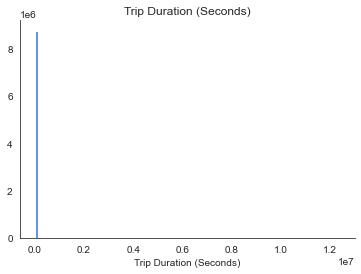


---------------------------------------------
Start Time
---------------------------------------------
        


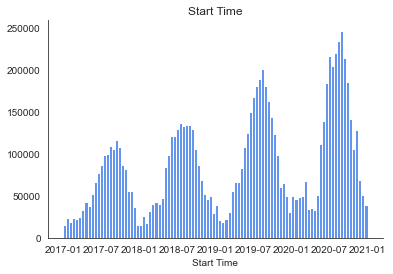


---------------------------------------------
Start Station Id
---------------------------------------------
        


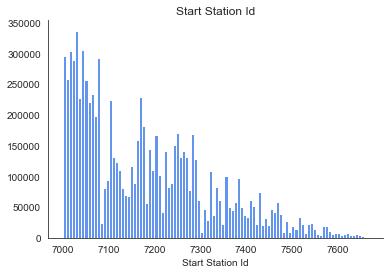


---------------------------------------------
Start Station Name
---------------------------------------------
        


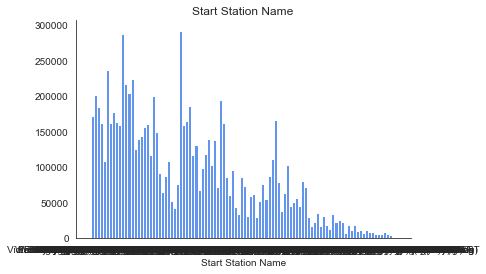


---------------------------------------------
End Time
---------------------------------------------
        


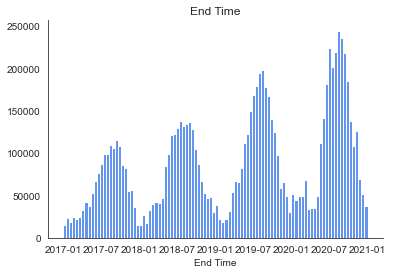


---------------------------------------------
End Station Id
---------------------------------------------
        


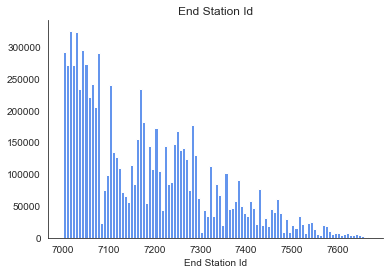


---------------------------------------------
End Station Name
---------------------------------------------
        


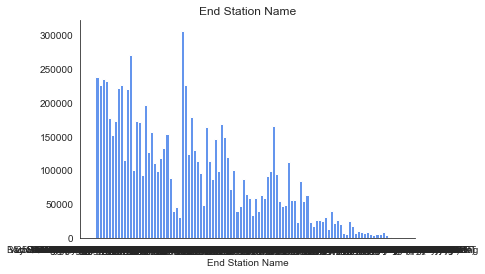


---------------------------------------------
Member
---------------------------------------------
        


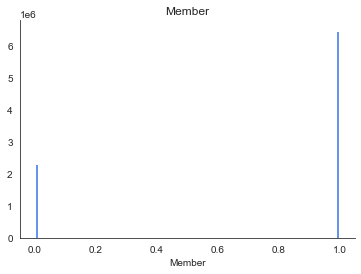


---------------------------------------------
Weekend
---------------------------------------------
        


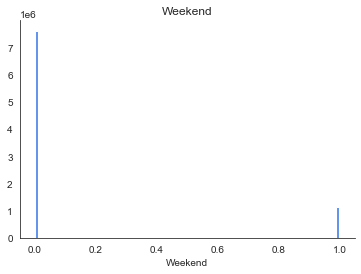


---------------------------------------------
Holiday
---------------------------------------------
        


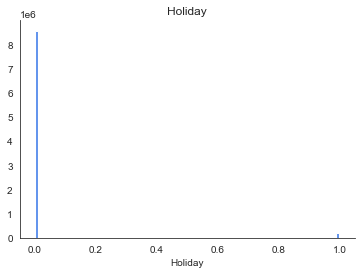

In [49]:
# Ignore runtime warning
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style("white")

# Show histogram for each numeric column
for col in trips17_20.columns[1:]:
    try:
        print(f"""
---------------------------------------------
{col}
---------------------------------------------
        """)
        sns.set_style("white")
        plt.figure(figsize=(6, 4))
        plt.title(col)
        plt.hist(trips17_20[col], color='cornflowerblue', bins=100)
        plt.xlabel(col)
        sns.despine()
        plt.show()
    except KeyError:
        pass

**_Observations_**
- `Trip Duration Seconds` is right skewed with a long tail which resulted in the visualization tightly binned to one large bin on the left, we may need to limit of cut off the long tail with a max value to produce a usable visualization in the EDA phase.
- There is a clear seasonality displayed in the Start Time and End Time columns based on bike usage trend with summer highs and winter lows and steady upward trend over the years.
- Most usage happens in the older stations and tapers off with the newer stations
- There are noticeable differences between Station Ids and Station Names possibly because of the moving and renaming of stations or typos. This will need to be looked into in the future.

In [50]:
# Save cleaned datasets to new csv
# trips17_20.to_csv('../data/processed/trips17_20.csv') 
# trips19_20.to_csv('../data/processed/trips19_20.csv') 

### **Part 2: Weather Datasets**

Back to [Table of Contents](#Table-of-Contents).<br>

~1. Trip Datasets~<br>
2. Weather Datasets<br>
3. API Datasets

In [51]:
# Combine csvs into one dataframe 'weather17'
weather17 = pd.concat([W1_17, W2_17, W3_17, W4_17, W5_17, W6_17, W7_17, W8_17, W9_17, W10_17, W11_17, W12_17]).reset_index(drop=True)
weather18 = pd.concat([W1_18, W2_18, W3_18, W4_18, W5_18, W6_18, W7_18, W8_18, W9_18, W10_18, W11_18, W12_18]).reset_index(drop=True)
weather19 = pd.concat([W1_19, W2_19, W3_19, W4_19, W5_19, W6_19, W7_19, W8_19, W9_19, W10_19, W11_19, W12_19]).reset_index(drop=True)
weather20 = pd.concat([W1_20, W2_20, W3_20, W4_20, W5_20, W6_20, W7_20, W8_20, W9_20, W10_20, W11_20, W12_20]).reset_index(drop=True)

# Display dataset size
print(f"""
2017 Weather dataframe shape: {weather17.shape}
2018 Weather dataframe shape: {weather18.shape}
2019 Weather dataframe shape: {weather19.shape}
2020 Weather dataframe shape: {weather20.shape}
""")


2017 Weather dataframe shape: (8760, 28)
2018 Weather dataframe shape: (8760, 28)
2019 Weather dataframe shape: (8760, 28)
2020 Weather dataframe shape: (8784, 28)



**_Observation_**

2020 has 24 more records because it was a leap year.

In [52]:
# Display first 3 rows
print("\n**weather17 dataset**")
display(weather17.head(3))
print("\n**weather18 dataset**")
display(weather18.head(3))
print("\n**weather19 dataset**")
display(weather19.head(3))
print("\n**weather20 dataset**")
display(weather20.head(3))


**weather17 dataset**


,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 00:00,2017,1,1,00:00,1.5,NaN,-3.6,NaN,69.0,NaN,26.0,NaN,39.0,NaN,16.1,NaN,99.81,NaN,NaN,NaN,NaN,NaN,NaN
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 01:00,2017,1,1,01:00,1.5,NaN,-3.9,NaN,67.0,NaN,27.0,NaN,35.0,NaN,16.1,NaN,100.01,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 02:00,2017,1,1,02:00,1.0,NaN,-4.3,NaN,68.0,NaN,26.0,NaN,32.0,NaN,16.1,NaN,100.14,NaN,NaN,NaN,NaN,NaN,NaN



**weather18 dataset**


,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-01 00:00,2018,1,1,00:00,-16.2,NaN,-20.5,NaN,70.0,NaN,31.0,NaN,8.0,NaN,16.1,NaN,102.13,NaN,NaN,NaN,-22.0,NaN,NaN
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-01 01:00,2018,1,1,01:00,-16.8,NaN,-21.1,NaN,70.0,NaN,NaN,M,4.0,NaN,16.1,NaN,102.10,NaN,NaN,NaN,-20.0,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-01 02:00,2018,1,1,02:00,-17.3,NaN,-20.8,NaN,75.0,NaN,29.0,NaN,15.0,NaN,16.1,NaN,102.15,NaN,NaN,NaN,-26.0,NaN,NaN



**weather19 dataset**


,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 00:00,2019,1,1,00:00,4.3,NaN,4.0,NaN,98.0,NaN,8.0,NaN,11.0,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 01:00,2019,1,1,01:00,5.1,NaN,5.0,NaN,99.0,NaN,NaN,M,4.0,NaN,16.1,NaN,98.47,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 02:00,2019,1,1,02:00,5.9,NaN,5.6,NaN,98.0,NaN,31.0,NaN,28.0,NaN,4.0,NaN,98.57,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"



**weather20 dataset**


,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2020-01-01 00:00,2020,1,1,00:00,0.2,NaN,-3.7,NaN,75.0,NaN,25.0,NaN,35.0,NaN,16.1,NaN,99.30,NaN,NaN,NaN,NaN,NaN,NaN
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2020-01-01 01:00,2020,1,1,01:00,0.1,NaN,-4.0,NaN,74.0,NaN,25.0,NaN,34.0,NaN,16.1,NaN,99.33,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2020-01-01 02:00,2020,1,1,02:00,0.0,NaN,-3.9,NaN,75.0,NaN,25.0,NaN,34.0,NaN,16.1,NaN,99.36,NaN,NaN,NaN,-7.0,NaN,NaN


**_Observation_**

It appears that there are a lot of `null` values in multiple column features. But lets take a look at the datatypes before making any further observations and next steps.

In [53]:
# Check each dataframe's datatypes
print(f"""\
**weather17 dataset**\n
{weather17.dtypes}\n
========================================\n
**weather18 dataset**\n
{weather18.dtypes}\n
========================================\n
**weather19 dataset**\n
{weather19.dtypes}\n
========================================\n
**weather20 dataset**\n
{weather20.dtypes}
""")

**weather17 dataset**

Longitude (x)          float64
Latitude (y)           float64
Station Name            object
Climate ID               int64
Date/Time               object
Year                     int64
Month                    int64
Day                      int64
Time                    object
Temp (°C)              float64
Temp Flag               object
Dew Point Temp (°C)    float64
Dew Point Temp Flag     object
Rel Hum (%)            float64
Rel Hum Flag            object
Wind Dir (10s deg)     float64
Wind Dir Flag           object
Wind Spd (km/h)        float64
Wind Spd Flag          float64
Visibility (km)        float64
Visibility Flag         object
Stn Press (kPa)        float64
Stn Press Flag          object
Hmdx                   float64
Hmdx Flag              float64
Wind Chill             float64
Wind Chill Flag        float64
Weather                 object
dtype: object


**weather18 dataset**

Longitude (x)          float64
Latitude (y)           float64
Station 

**Initial Observations**
- We can drop the `Longitude (x)`, `Latitude (y)`, `Station Name`, `Climate ID` as they relate specifically with weather station
- We can drop the *Flag* features as they are indicators for missing data which is useful but not necessary for us
- We can also drop `Wind Dir (10s deg)` & Wind speed `Wind Spd (km/h)` because this metric will vary in different parts of the city greatly depending on terrain, i.e. open field vs city streets. However, we can create a boolean classifier for windy conditions over 60km/h sustained before we drop these features
- We will conconcating this weather data with the trips data via `Date/Time`, therefore the `Year`, `Month`, `Day`, `Time` can be dropped as it is redundant
- `null` values for Temperature `Temp (°C)`, Dew Point `Dew Point Temp (°C)`, Relative Humidity `Rel Hum (%)`, and Atmopheric Pressure `Stn Press (kPa)` can be imputed via ffill to keep it simple
- According to Meteorological Standards, visibility reported as 10 miles is normally a stand-in for "unlimited" visibility, therefore Visibility (km) can have a maximum of 16.1 on a clear day. Therefore we will be replacing all `null` values with the max value of 16.1
- `Hmdx` & `Wind Chill` impute 0 for `null` as they are no longer measured in cold/hot weather respectively
- `Weather` has multiple weather observations that can be broken down into boolean classifier using `CountVectorizer` to create sparse (boolean) matrix 

**Next Steps**<br>
1. Since all the weather dataframes are the same, we can concat them together before doing any data cleaning.
2. Create boolean variable for `Strong Winds`
3. Drop unnecassary/redundant features
4. Create Sparse Matrix for `Weather` Observations
5. Check for duplicates or `null` values
6. Impute `null` values
7. Change the dtypes for `Date/Time` from object strings to datetime

#### *Issue 1: Combine dataframes*

In [54]:
# Combine weather dataframes into 1
weather_df = pd.concat([weather17,weather18,weather19,weather20], ignore_index=True)

#### *Issue 2: Create Feature for Strong Winds*

In [55]:
# Create a new binary column with a 1 if Wind Spd (km/h) >= 60, 0 if Wind Spd (km/h) < 60
weather_df['Strong Wind'] = (weather_df['Wind Spd (km/h)']>=60).astype(int)

#### *Issue 3: Drop Features*

In [56]:
# Dropping features
weather_df.drop(['Longitude (x)', 
                 'Latitude (y)', 
                 'Station Name', 
                 'Climate ID',
                 'Year', 
                 'Month', 
                 'Day', 
                 'Time',
                 'Temp Flag', 
                 'Dew Point Temp Flag', 
                 'Rel Hum Flag', 
                 'Wind Dir (10s deg)',
                 'Wind Dir Flag',
                 'Wind Spd (km/h)',
                 'Wind Spd Flag', 
                 'Visibility Flag',
                 'Stn Press Flag', 
                 'Hmdx Flag',
                 'Wind Chill Flag'], axis=1, inplace=True)

#### *Issue 4: Create Sparse Matrix for Weather Observations*

In [57]:
# Verify if we can make column into boolean variable
print(f"""
Variables found in Weather:\n {weather_df['Weather'].unique()}\
""")


Variables found in Weather:
 [nan 'Fog' 'Rain,Fog' 'Rain' 'Snow' 'Moderate Rain' 'Moderate Rain,Fog'
 'Haze' 'Moderate Snow' 'Heavy Rain,Fog' 'Thunderstorms,Rain,Fog'
 'Thunderstorms,Rain' 'Thunderstorms' 'Thunderstorms,Moderate Rain'
 'Thunderstorms,Moderate Rain,Fog' 'Thunderstorms,Heavy Rain,Fog'
 'Rain,Snow' 'Freezing Rain,Fog' 'Freezing Rain,Snow' 'Freezing Rain'
 'Snow,Blowing Snow' 'Heavy Snow' 'Haze,Blowing Snow' 'Thunderstorms,Fog'
 'Thunderstorms,Heavy Rain']


**_Observation_**

Looks like there are definitely several re-occuring variables that can be transformed into a sparse matrix. Next I will import a NLP tool that will help in transforming the column feature into a sparse matrix then concating it back into the weather dataframe.

In [58]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
# Fill in `NULL` values with a stand in value
weather_df['Weather'].fillna(value='clear', inplace=True)

In [60]:
# 1. Instantiate the CountVectorizer with a token pattern
weather_code = CountVectorizer(token_pattern=r'(?u)[a-zA-Z][a-z ]+')

# 2. Fit & Transform column feature with the CountVectorizer
weather_code_f_t = weather_code.fit_transform(weather_df['Weather'])

# 3. Print Results
print("Size of weather_code_f_t\n")
display(weather_code_f_t)

Size of weather_code_f_t



<35064x12 sparse matrix of type '<class 'numpy.int64'>'
	with 36090 stored elements in Compressed Sparse Row format>

In [61]:
# List of feature names
print(weather_code.get_feature_names())

['blowing snow', 'clear', 'fog', 'freezing rain', 'haze', 'heavy rain', 'heavy snow', 'moderate rain', 'moderate snow', 'rain', 'snow', 'thunderstorms']


In [62]:
# Instantiate into dataframe
weather_code_df = pd.DataFrame(columns=weather_code.get_feature_names(), 
                               data=weather_code_f_t.toarray())

# Drop stand in value
weather_code_df.drop(['clear'], axis=1, inplace=True)

# Change Titlecase on Column Names
weather_code_df.columns = map(str.title, weather_code_df.columns)

In [63]:
# Overwrite previous weather_df with additional weather_code
weather_df = pd.concat([weather_df, weather_code_df], join='inner', axis=1)

# Drop `Weather` feature
weather_df.drop(['Weather'], axis=1, inplace=True)

#### *Issue 5: Check for Duplicates and Missing Values*

In [64]:
# Check for duplicates
print(f"Duplicates found in weather_df: {weather_df.duplicated().sum()}")

Duplicates found in weather_df: 0


In [65]:
# Check for null values
print(f"""
**weather_df dataset**\n
Total Number of Null values:\n\n{weather_df.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{weather_df.isna().mean()*100}\
""")


**weather_df dataset**

Total Number of Null values:

Date/Time                  0
Temp (°C)                123
Dew Point Temp (°C)      172
Rel Hum (%)              164
Visibility (km)           55
Stn Press (kPa)          126
Hmdx                   29397
Wind Chill             28870
Strong Wind                0
Blowing Snow               0
Fog                        0
Freezing Rain              0
Haze                       0
Heavy Rain                 0
Heavy Snow                 0
Moderate Rain              0
Moderate Snow              0
Rain                       0
Snow                       0
Thunderstorms              0
dtype: int64

----------------------------------------

Total Percentage of Null values:

Date/Time               0.000000
Temp (°C)               0.350787
Dew Point Temp (°C)     0.490532
Rel Hum (%)             0.467716
Visibility (km)         0.156856
Stn Press (kPa)         0.359343
Hmdx                   83.838125
Wind Chill             82.335159
Strong Wind

#### *Issue 6: Impute Missing Values*
- Impute `Visibility (km)` with 16.1
- Impute `Hmdx` & `Wind Chill` with 0
- Impute `Temp (°C)`, `Dew Point Temp (°C)`, `Rel Hum (%)`, and `Stn Press (kPa)` via ffill

In [66]:
# Impute `Visibility (km)` with 16.1; `Hmdx` & `Wind Chill` with 0
weather_df.fillna({'Visibility (km)': 16.1, 'Hmdx': 0, 'Wind Chill': 0}, inplace=True)

In [67]:
# Forwardfill any null values
weather_df.fillna(method='ffill', inplace=True)

In [68]:
# Final check for null values
print(f"""
**weather_df dataset**\n
Total Number of Null values:\n\n{weather_df.isna().sum()}\
""")


**weather_df dataset**

Total Number of Null values:

Date/Time              0
Temp (°C)              0
Dew Point Temp (°C)    0
Rel Hum (%)            0
Visibility (km)        0
Stn Press (kPa)        0
Hmdx                   0
Wind Chill             0
Strong Wind            0
Blowing Snow           0
Fog                    0
Freezing Rain          0
Haze                   0
Heavy Rain             0
Heavy Snow             0
Moderate Rain          0
Moderate Snow          0
Rain                   0
Snow                   0
Thunderstorms          0
dtype: int64


#### *Issue 7: Change Datatypes*

In [69]:
# Datatype check
weather_df.dtypes

Date/Time               object
Temp (°C)              float64
Dew Point Temp (°C)    float64
Rel Hum (%)            float64
Visibility (km)        float64
Stn Press (kPa)        float64
Hmdx                   float64
Wind Chill             float64
Strong Wind              int64
Blowing Snow             int64
Fog                      int64
Freezing Rain            int64
Haze                     int64
Heavy Rain               int64
Heavy Snow               int64
Moderate Rain            int64
Moderate Snow            int64
Rain                     int64
Snow                     int64
Thunderstorms            int64
dtype: object

In [70]:
%%time
# Changing `Date/Time` and `Time` dtype from object to datetime
weather_df['Date/Time'] = pd.to_datetime(weather_df['Date/Time'], yearfirst=True, infer_datetime_format=True)

CPU times: user 14.3 ms, sys: 1.79 ms, total: 16.1 ms
Wall time: 15.8 ms


In [71]:
# Final datatype check
weather_df.dtypes

Date/Time              datetime64[ns]
Temp (°C)                     float64
Dew Point Temp (°C)           float64
Rel Hum (%)                   float64
Visibility (km)               float64
Stn Press (kPa)               float64
Hmdx                          float64
Wind Chill                    float64
Strong Wind                     int64
Blowing Snow                    int64
Fog                             int64
Freezing Rain                   int64
Haze                            int64
Heavy Rain                      int64
Heavy Snow                      int64
Moderate Rain                   int64
Moderate Snow                   int64
Rain                            int64
Snow                            int64
Thunderstorms                   int64
dtype: object

**_Next Step_**<br>
Now that the dataset are cleaned, lets run a quick visualization of each column feature to see what kind of insights we can find.


---------------------------------------------
Temp (°C)
---------------------------------------------
        


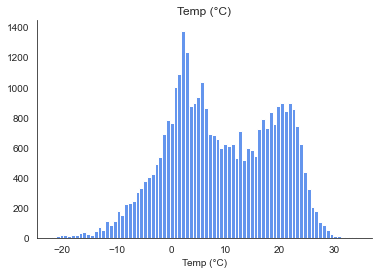


---------------------------------------------
Dew Point Temp (°C)
---------------------------------------------
        


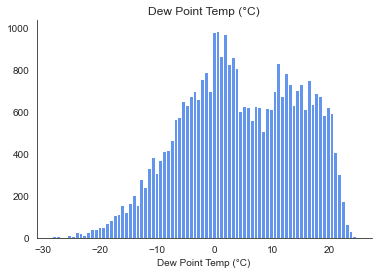


---------------------------------------------
Rel Hum (%)
---------------------------------------------
        


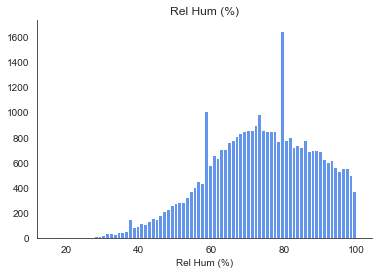


---------------------------------------------
Visibility (km)
---------------------------------------------
        


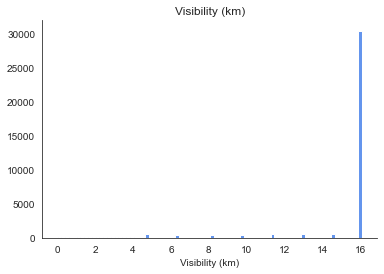


---------------------------------------------
Stn Press (kPa)
---------------------------------------------
        


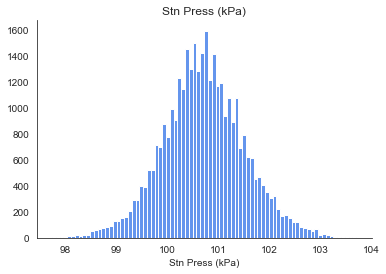


---------------------------------------------
Hmdx
---------------------------------------------
        


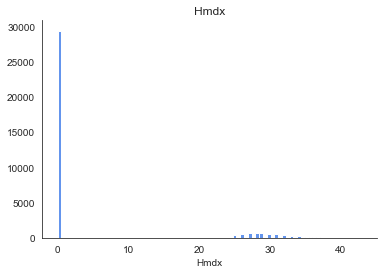


---------------------------------------------
Wind Chill
---------------------------------------------
        


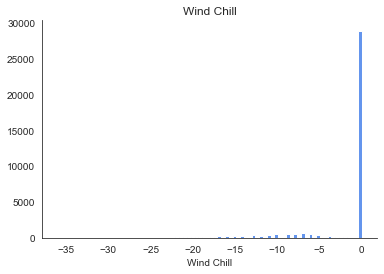


---------------------------------------------
Strong Wind
---------------------------------------------
        


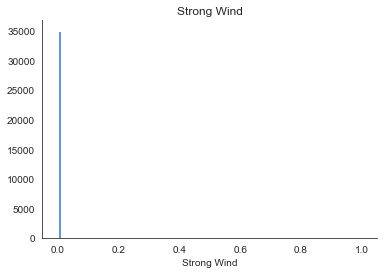


---------------------------------------------
Blowing Snow
---------------------------------------------
        


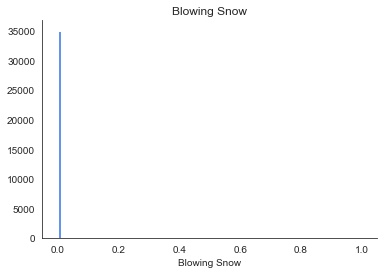


---------------------------------------------
Fog
---------------------------------------------
        


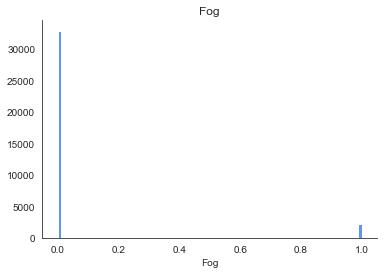


---------------------------------------------
Freezing Rain
---------------------------------------------
        


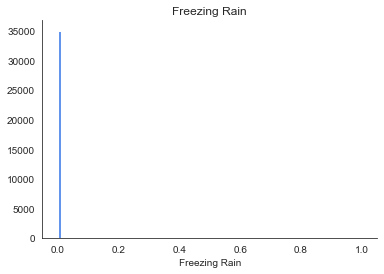


---------------------------------------------
Haze
---------------------------------------------
        


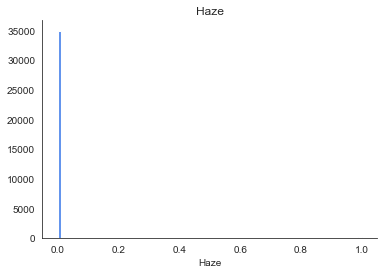


---------------------------------------------
Heavy Rain
---------------------------------------------
        


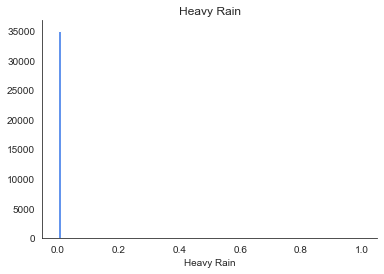


---------------------------------------------
Heavy Snow
---------------------------------------------
        


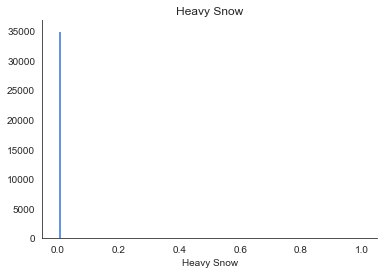


---------------------------------------------
Moderate Rain
---------------------------------------------
        


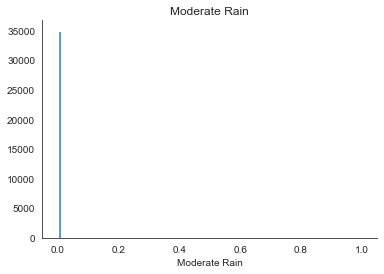


---------------------------------------------
Moderate Snow
---------------------------------------------
        


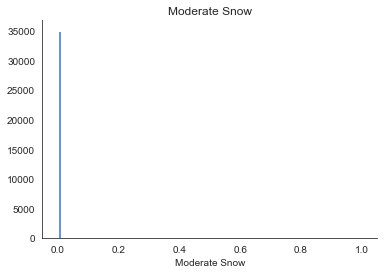


---------------------------------------------
Rain
---------------------------------------------
        


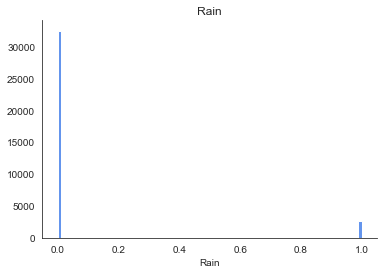


---------------------------------------------
Snow
---------------------------------------------
        


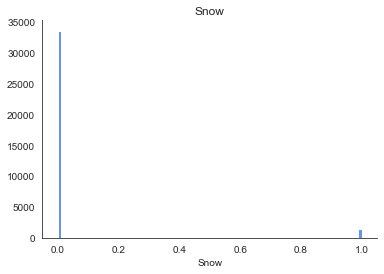


---------------------------------------------
Thunderstorms
---------------------------------------------
        


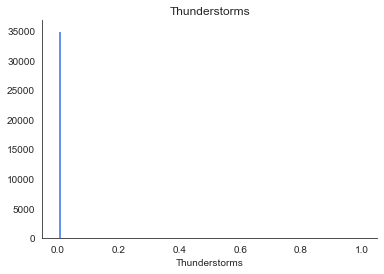

In [72]:
for col in weather_df.columns[1:]:
    try:
        print(f"""
---------------------------------------------
{col}
---------------------------------------------
        """)
        plt.figure(figsize=(6, 4))
        plt.title(col)
        plt.hist(weather_df[col], color='cornflowerblue', bins=80)
        plt.xlabel(col)
        sns.despine()
        plt.show()
    except KeyError:
        pass

**_Observations_**
- Most common `Temp (°C)` peaks around 2°C and around 21°C
- Most common `Dew Point Temp (°C)` peaks around 0°C and drops off above 20°C and distribution has a left skew
- Most common `Rel Hum (%)` peaks around 75% and distribution has a left skew
- `Stn Press (kPa)` has a normal distribution with the peak between 100-101kPa
- Normal Rain, Snow and Fog are the most common Weather Events

In [73]:
# Save cleaned dataset to new csv
# weather_df.to_csv('../data/processed/weather17_20.csv')

## Part 3: Loading API Datasets

Back to [Table of Contents](#Table-of-Contents).<br>

~1. Trip Datasets~<br>
~2. Weather Datasets~<br>
3. API Datasets

**_Datasets_**<br>

Toronto BikeShare API Links and description listed below:<br>

[System Regions](https://tor.publicbikesystem.net/ube/gbfs/v1/en/system_regions)<br>
JSON on Toronto BikeShare System Region

[System Information](https://tor.publicbikesystem.net/ube/gbfs/v1/en/system_information)<br>
JSON on Toronto BikeShare System Information

[Station Information](https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information)<br>
JSON on the current Toronto BikeShare Station Information including the geo-coordinates, altitude, and capacity

[Station Status](https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_status)<br>
JSON on the current Toronto BikeShare Station Status including on the number of bikes docks

[System Pricing Plans](https://tor.publicbikesystem.net/ube/gbfs/v1/en/system_pricing_plans)<br>
JSON on the current Toronto BikeShare Pricing Plan


Out of all the different APIs listed, I believe the ones that are the most useful would be `station_information` and `system_pricing_plans`. We will be requesting them individually, cleaning the datasets, and determine if they are useful in our analysis.

The [requests](https://requests.readthedocs.io/en/master/) module allows us to write a custom wrapper around a web API. Many web sites provide a way of interacting with them programmatically through an API. The way it generally works is that you send a request to a certain URL, and the data is returned as a JSON response.

**_Next Steps_**
1. Request & Clean Station Information
2. Request & Clean System Pricing Plans

### API 1: Station Information

In [74]:
# Import API requests and time
import requests
import time

# Counter
i = 1
print(f'API Request attempt {i}:')

# Request BikeShare Stations Information
request1 = requests.get('https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information')

# Loop if status code != 200 then retry with delay.
while request1.status_code != 200:
    print('Failed!')
    i += 1
    print(f'API Request attempt {i}:')
    request1 = requests.get('https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information')
    if request1.status_code == 200:
        break
    else:
        continue
    time.sleep(5)
    
print(f"Successful!\nContent-Type is: {request1.headers['Content-Type']}")

API Request attempt 1:
Successful!
Content-Type is: application/json


In [75]:
# If unable to reach API on mutiple attempts, then 
# load in the following csv from when it was last successful.

# station_info = pd.read_csv('..data/raw/station_info.csv')

In [76]:
# Convert json to a dataframe
station_info = pd.DataFrame(request1.json())
station_info

,last_updated,ttl,data
stations,1625171663,10,"[{'station_id': '7000', 'name': 'Fort York Bl..."


In [77]:
# Check last updated time
from datetime import datetime

time = station_info.iloc[0]['last_updated']

print(f"Data last updated:\n{datetime.fromtimestamp(time).strftime('%Y-%m-%d %I:%M:%S %p')}")

Data last updated:
2021-07-01 04:34:23 PM


**_Observation_**<br>
It appears that all the data is in in a single dictionary record under the data column. Lets extract/transform that dictionary into a workable data frame.

In [78]:
# Transform dictionary to dataframe
station_info = pd.DataFrame(station_info.iloc[0]['data'])

# Check the data set
station_info.head(3)

,station_id,name,physical_configuration,lat,lon,altitude,address,capacity,rental_methods,groups,obcn,nearby_distance,post_code,cross_street
0,7000,Fort York Blvd / Capreol Ct,REGULAR,43.639832,-79.395954,0.0,Fort York Blvd / Capreol Ct,35,"[KEY, TRANSITCARD, CREDITCARD, PHONE]",[],647-643-9607,500.0,NaN,NaN
1,7001,Wellesley Station Green P,REGULAR,43.664964,-79.383550,0.0,Yonge / Wellesley,17,"[KEY, TRANSITCARD, CREDITCARD, PHONE]",[],416-617-9576,500.0,M4Y 1G7,NaN
2,7002,St. George St / Bloor St W,REGULAR,43.667333,-79.399429,0.0,St. George St / Bloor St W,19,"[KEY, TRANSITCARD, CREDITCARD, PHONE]",[],647-643-9615,500.0,NaN,NaN


**_Observations_**<br>
It appears that the transformation worked. However some data features are ambigious and needs more in-depth analysis to ascertain the nature of each feature. But first, lets export this dataframe in case. weare unable to reach the API source.

In [79]:
# Export to csv in case unable to reach API
# station_info.to_csv('../data/raw/station_info.csv')

In [80]:
# Display the size of data set
station_info.shape

(608, 14)

In [81]:
# Print out value counts for each data column.

for col in station_info.columns:
    try:
        print(f"""
------------------------------
{col}
------------------------------

{station_info[col].value_counts()}
        """)
    except TypeError:
        pass


------------------------------
station_id
------------------------------

7456    1
7668    1
7428    1
7557    1
7576    1
       ..
7527    1
7216    1
7102    1
7523    1
7041    1
Name: station_id, Length: 608, dtype: int64
        

------------------------------
name
------------------------------

Humberside Grounds - SMART            1
Superior Ave / Lake Shore Blvd W      1
Richmond St E / Yonge St              1
Euclid Ave / Bloor St W               1
Sherbourne St / Isabella St           1
                                     ..
Humber Bay Shores Park West           1
Davenport Rd / McAlpine St - SMART    1
Nassau St / Bellevue Ave              1
Exhibition GO (Atlantic Ave)          1
Weston Lions Park                     1
Name: name, Length: 608, dtype: int64
        

------------------------------
physical_configuration
------------------------------

REGULAR                508
SMARTMAPFRAME           93
REGULARLITMAPFRAME       3
ELECTRICBIKESTATION      3
SMARTLITMAP

As of July 1 2021, there are 608 active bike stations at the time of API request across Toronto with 14 features(columns). This may vary depending on when the data is requested. The description of each feature is listed below:

- `station_id`: Unique Station ID
- `name`: Name of Bike Station
- `physical_configuration`: Type of Bike Station
- `lat`: Latitude coordinates of Bike Station
- `lon`: Longitude coordinates of Bike Station
- `address`: Address of where the Bike Station is located
- `capacity`: Max number of bikes the station can accommodate
- `rental_methods`: Payment Methods Available
- `groups`: Bike Station Group ID
- `obcn`: On-board Communication Number, the unique phone number at which the station communicates remotely
- `nearby_distance`: Based on heading, it is the distance nearby some unknown reference point
- `post_code`: Postal Code of where the Bike Station is located
- `cross_street`: Based on heading, it may be the intersection at which the Bikestation is located

Out of the features listed above, we are only interested in `station_id`, `name`, `lat`, `lon`, `capacity` `post_code` as these can help us identify the locations of the stations and their corresponding capacity currently. All other features will be dropped.

`physical_configuration`<br>
Physical Configuration seems to refer to the type of bike station it is and what type of map frame is attached to the station itself which may or maynot help riders navigate through the city if they are not familiar. Since there is only 5 distinct physical configurations for stations but majority of which are regular configuration I do not believe there is any bearing on bike usage and therefore can be dropped.

`address`<br>
It appears that the `address` is just a copy of the `name` feature and can be dropped.

`rental_methods`<br>
It appears all the stations take phone, key and transitcard as rental methods they are not useful values to differentiate the stations however 92 stations do not take creditcard so that we can encode that feature and change it to binary classification. 

`groups`<br>
It appears that this feature is mainly used for internal usage to classify station groupings and have no relation in terms of location, and most likly have no bearing into bike usage statistics, therefore can be dropped.

`obcn`<br>
It appears to be the internal device communication number and has no bearing on trip rentals and can be dropped.<br>

`nearby_distance`<br>
The measure is ambiguous in terms of reference point, therefore unusable and can be dropped.

`cross_street`<br>
It is not clear as to what this feature refers to or classifies as cross_street. As it may seem redundant to the address, it can be dropped.<br>

**Next Steps**
1. Drop features
2. Check for duplicates and nulls
3. Create binary classifier for Rental Methods
4. Check/Change dtypes

#### *Issue 1: Drop Features*

In [82]:
# Dropping features
station_info.drop(['address',
                   'physical_configuration', 
                   'groups', 
                   'obcn', 
                   'nearby_distance', 
                   'cross_street'], axis=1, inplace=True)

#### *Issue 2: Check Duplicates & Missing Values*

In [83]:
# Check for duplicates
print(f"Duplicates found: {station_info['station_id'].duplicated().sum()}")

Duplicates found: 0


In [84]:
# Check for null values
print(f"""
Total Number of Null values:\n\n{station_info.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{station_info.isna().mean()*100}
""")


Total Number of Null values:

station_id          0
name                0
lat                 0
lon                 0
altitude           10
capacity            0
rental_methods      0
post_code         325
dtype: int64

----------------------------------------

Total Percentage of Null values:

station_id         0.000000
name               0.000000
lat                0.000000
lon                0.000000
altitude           1.644737
capacity           0.000000
rental_methods     0.000000
post_code         53.453947
dtype: float64



**Initial Observations**

- 10 (~1.6%) missing data for `altitude`
- 326 (~53.6%) missing data for `post_code`

**Next Steps**

~1. Drop features.~<br>
~2. Check for duplicates and null values.~<br>
3. Create binary classifier for Rental Methods.<br>
4. Impute `altitude`. We can use [Open Elevation API](https://api.open-elevation.com/api/v1/lookup) to request elevation information based on `lat`, `lon` information. More information/documentation is available [here](https://github.com/Jorl17/open-elevation/blob/master/docs/api.md). Altitude and elevation are often used interchangeably where both are vertical measures using sea level as the start point.<br>
5. Impute `post_code`/`FSA`.  We can use [GeoPy](https://geopy.readthedocs.io/en/stable/) to impute the missing postal code values by using the geo-coordinates, but also group it together by FSA (Forward Sortation Area) to gain more insight by higher level more aggregated neighbourhood area.<br>
6. Check/Change dtypes

#### *Issue 3: Create Binary Classifier for Rental Methods*

In [85]:
# Check if value type is string or list
type(station_info['rental_methods'].iloc[0,])

list

In [86]:
# Convert to lowercase
station_info['rental_methods'] = station_info['rental_methods'].apply(lambda x: [rental_methods.lower() for rental_methods in x])

# Combine all tags into a single list, using nested list comprehension
method_list = [x for sublist in station_info['rental_methods'] for x in sublist]

# Display the list & count
pd.Series(method_list).value_counts()

key            608
transitcard    608
phone          608
creditcard     514
dtype: int64

**_Observations_**<br>
It appears all the stations take phone, key and transitcard as rental methods they are not useful values to differentiate the stations however 92 stations do not take creditcard so that we can encode that feature and change it to binary classification. 

In [87]:
# Encode rental_methods to binary change to integer
station_info['creditcard_payment'] = station_info['rental_methods'].apply(lambda x: 'creditcard' in x).astype(int)

In [88]:
# Check column value counts
station_info['creditcard_payment'].value_counts()

1    514
0     94
Name: creditcard_payment, dtype: int64

In [89]:
# Drop `rental_methods`
station_info.drop(['rental_methods'], axis=1, inplace=True)

#### *Issue 4: Impute Altitude Values*

Before we go ahead and impute the missing data using the Open Elevation API, lets check the current altitude distribution in the data set.

In [90]:
# Checking altitude distribution
station_info.groupby(['altitude']).size().reset_index(name='count')

,altitude,count
0,0.00,597
1,102.08,1


**_Observations_**<br>
It appears that most of the recorded station altitude are actually 0 with one at 102.08, assuming in meters. Because majority of the data is missing, we will need to replace it all using the Open Elevation API.

In [91]:
# Rename columns
station_info.rename(columns={'lat':'latitude', 'lon':'longitude'}, inplace=True)

In [92]:
# Separate geocoordinates to be used for API query
geocoordinates = station_info[['latitude','longitude']]

In [93]:
# Setup a dictionary from 2 pandas array
geo_dict = {"locations":geocoordinates.to_dict('records')}

In [94]:
# Import json
import json

# Convert dict to json
jsonData = json.dumps(geo_dict)

In [95]:
# WARNING API can be unreliable with it routinely timing out, 
# that is why I have written a loop here with a time delay to retry every 2 seconds.

# Counter
i = 1
print(f'API Request attempt {i}:')
request2 = requests.post('https://api.open-elevation.com/api/v1/lookup',
                         data=jsonData,
                         headers={'Accept': 'application/json', 'Content-type': 'application/json'})

# loop if status code != 200 then retry with delay.
while request2.status_code != 200:
    print('Failed!')
    i += 1
    print(f'API Request attempt {i}:')
    request2 = requests.post('https://api.open-elevation.com/api/v1/lookup',
                         data=jsonData,
                         headers={'Accept': 'application/json', 'Content-type': 'application/json'})
    if request2.status_code == 200:
        break
    else:
        continue
    time.sleep(5)
    
print(f"Successful!\nContent-Type is: {request2.headers['Content-Type']}")

API Request attempt 1:
Successful!
Content-Type is: application/json


**_Observation_**<br>
It appears that all the data is in in a single dictionary record under the data column. Lets extract/transform that dictionary into a workable data frame.

In [96]:
# Convert json to a dataframe
elevation_info = pd.DataFrame(request2.json())
elevation_info

,results
0,"{'latitude': 43.639832, 'elevation': 77, 'long..."
1,"{'latitude': 43.66496415990742, 'elevation': 1..."
2,"{'latitude': 43.667333, 'elevation': 120, 'lon..."
3,"{'latitude': 43.667158, 'elevation': 118, 'lon..."
4,"{'latitude': 43.656518, 'elevation': 106, 'lon..."
...,...
603,"{'latitude': 43.6504218, 'elevation': 107, 'lo..."
604,"{'latitude': 43.6647332, 'elevation': 117, 'lo..."
605,"{'latitude': 43.6558557, 'elevation': 115, 'lo..."
606,"{'latitude': 43.72814640000001, 'elevation': 1..."


**_Observation_**<br>
Because each station's elevation information is in each record, we can simply extract that information and add it into `station_info` data frame.

In [97]:
# Extract `elevation` values to `altitude` column in station_info data frame
station_info['altitude'] = elevation_info['results'].apply(lambda x: x['elevation'])

In [98]:
# Rename column from `altitude` to `elevation`
station_info.rename(columns={'altitude':'elevation'}, inplace=True)

In [99]:
# Check dataset
station_info.head(3)

,station_id,name,latitude,longitude,elevation,capacity,post_code,creditcard_payment
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,77,35,NaN,1
1,7001,Wellesley Station Green P,43.664964,-79.383550,112,17,M4Y 1G7,1
2,7002,St. George St / Bloor St W,43.667333,-79.399429,120,19,NaN,1


In [100]:
# Rechecking elevation distribution
station_info.groupby(['elevation']).size().reset_index(name='count')

,elevation,count
0,73,3
1,74,7
2,75,7
3,76,4
4,77,10
...,...,...
95,187,1
96,191,1
97,193,2
98,197,1


#### *Issue 5: Postal Code & FSA*

In [101]:
# Split `postal code` into two columns
postal_code = station_info["post_code"].str.split(" ", n = 1, expand = True)

# Check split
postal_code

,0,1
0,NaN,NaN
1,M4Y,1G7
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
603,M6K,1V6
604,M5S,2Y4
605,M5G,1W7
606,M4N,2L1


In [102]:
# Create new `fsa` column and place current known FSAs into it
station_info["fsa"] = postal_code[0]

In [103]:
# Check for any more null `fsa`
print(f'Number of Null values in `fsa`:\n\n{station_info["fsa"].isna().sum()}')

Number of Null values in `fsa`:

325


**_Next STeps_**<br>
Now that we extracted all the `FSA` we could, we need to use Nominatim to search OpenStreetMap and query the postal codes of the stations using the geo-coordinates to try and fill the missing `FSA` values.

In [104]:
# Import Nominatim from GeoPy
from geopy.geocoders import Nominatim

In [105]:
# Creating separate dataframe for `latitude` and `longitude` string searches
locations = station_info[['latitude', 'longitude']].astype(str).agg(','.join, axis=1)

# Display locations
display(locations)

0                      43.639832,-79.395954
1      43.66496415990742,-79.38355031526893
2                      43.667333,-79.399429
3                      43.667158,-79.402761
4                      43.656518,-79.389099
                       ...                 
603                  43.6504218,-79.4407647
604                  43.6647332,-79.4030281
605                  43.6558557,-79.3894093
606           43.72814640000001,-79.4032194
607                  43.7093201,-79.3996301
Length: 608, dtype: object

In [106]:
# Requesting address information for all 608 Toronto BikeShare Stations
# WARNING: This will take several minutes to run.

# Instantiate empty list for query
address = []

# Must set user_agent id in order to access API, user_agent id can be anything
# You may need to tweak timeout value if code does not run properly
geolocator = Nominatim(user_agent="bstn_jho", timeout=3)

# iterate through the address query list
for i in tqdm(range(len(locations))):
    # search each address and retrieve lat and lan
    location = geolocator.geocode(locations[i])
    # append lat and long data into empty lists
    address.append(location.address)

100%|██████████| 608/608 [05:03<00:00,  2.00it/s]


In [107]:
# Import regex package
import re

# regex the FSA postal code and save to new list
fsa = []
for i in range(len(address)):
    fsa.append(re.findall('[A-Z]\d[A-Z]', address[i]))

In [108]:
# Transform list in to data frame
fsa = pd.DataFrame(fsa)

# Check data frame
fsa

,0
0,M5V
1,M4Y
2,M5S
3,M5S
4,M5G
...,...
603,M6H
604,M5S
605,M5G
606,M4N


In [109]:
# Fill null values with FSA list obtained from OpenStreetMap API
station_info["fsa"] = station_info["fsa"].fillna(fsa[0])

In [110]:
# Check for any nulls `fsa`
print(f'Number of Null Values in fsa:\n\n{fsa[0].isna().sum()}')

Number of Null Values in fsa:

11


**_Observation_**<br>
Looks like we missed a few`FSA` value lets take alook into which station it is and we will have to impute the missing values manually via Google search because using the Google Maps API costs money and private API key.

In [111]:
# Looks like we missed an`FSA` value lets take alook into which station it is and 
# we will have to imput the missing value manually via Google search
null_fsa = station_info[station_info["fsa"].isna()]

In [112]:
# Display null_fsa
null_fsa

,station_id,name,latitude,longitude,elevation,capacity,post_code,creditcard_payment,fsa
6,7006,Bay St / College St (East Side),43.660439,-79.385525,115,11,NaN,1,None
14,7014,Sherbourne St / Carlton St (Allan Gardens),43.663102,-79.373181,104,17,NaN,1,None
21,7021,Bay St / Albert St,43.653264,-79.382458,107,35,NaN,1,None
75,7075,Queens Quay W / Dan Leckie Way,43.636533,-79.395854,82,27,NaN,1,None
76,7076,York St / Queens Quay W,43.640132,-79.380464,74,27,NaN,1,None
77,7077,College Park South,43.659777,-79.382767,107,19,NaN,1,None
166,7175,HTO Park (Queens Quay W),43.637960,-79.387502,81,27,NaN,1,None
356,7389,College Park- Gerrard Entrance,43.658938,-79.383518,124,25,NaN,1,None


Using Google Maps search, for the geo-coordinates provided in the datapoints above, I will manually replace the `fsa` and fill in the current `null` value.

In [113]:
# Manually create fsa_dict from Google Maps search
fsa_dict = {6: "M5G", 14: "M5A", 21: "M5G", 75: "M5V", 76: "M5J", 77: "M5G", 166: "M5V", 356: "M5G"}

In [114]:
# Update/Impute fsa_dict onto station_info
station_info['fsa'].update(pd.Series(fsa_dict))

In [115]:
# Check for any more null `fsa`
print(f'Number of Null values in `fsa`:\n\n{station_info["fsa"].isna().sum()}')

Number of Null values in `fsa`:

0


**_Next Step_**<br>
Just to be sure that all the FSAs were extracted properly from before, we will use a regex search on `fsa` column to see if any were extracted from `post_code` wrong.

In [116]:
# Check for any FSA not 3 characters long with letter 'M', number, letter combo.
bad_fsa = station_info[~station_info['fsa'].str.match('(?:^|\W)M\d[A-Z](?:$|\W)')]

# View dataframe
bad_fsa.head()

,station_id,name,latitude,longitude,elevation,capacity,post_code,creditcard_payment,fsa
29,7029,Bay St / Bloor St W (East Side),43.669430,-79.389150,133,15,M6G1X2,1,M6G1X2
39,7039,Simcoe St / Michael Sweet Ave - SMART,43.652327,-79.388254,103,19,M5T3M3,1,M5T3M3
57,7057,Simcoe St / Wellington St South,43.645857,-79.385365,103,27,M6a1a1,1,M6a1a1
61,7061,Dalton Rd / Bloor St W,43.666294,-79.406643,115,14,M6G1A1,1,M6G1A1
72,7072,Fleet St / Bathurst St,43.636611,-79.400042,79,19,M6G1X2,1,M6G1X2


In [117]:
# Display the size of data set
bad_fsa.shape

(24, 9)

**_Observation_**<br>
Now that we have found 24 stations incorrectly extracted their FSAs, we will need to create a dictionary from the master fsa dataframe we created earlier from using the Nominatim API then updating the station_info dataset with the correct FSAs.

In [118]:
# Create dictionary from FSAs found by API earlier
fsa_dict2 = fsa[0].to_dict()

# Replace bad FSAs with ones in dictionary
station_info['fsa'].update(pd.Series(fsa_dict2))

In [119]:
# Drop `post_code` after fixing FSAs as we no longer need postal codes
station_info.drop(['post_code'], axis=1, inplace=True)

In [120]:
# Final check for any FSA not 3 characters long with letter 'M', number, letter combo.
station_info[~station_info['fsa'].str.match('(?:^|\W)M\d[A-Z](?:$|\W)')]

,station_id,name,latitude,longitude,elevation,capacity,creditcard_payment,fsa


#### *Issue 6: Check/Change Datatypes*

In [121]:
# Datatype check
station_info.dtypes

station_id             object
name                   object
latitude              float64
longitude             float64
elevation               int64
capacity                int64
creditcard_payment      int64
fsa                    object
dtype: object

In [122]:
# Change `station_id` to `int`
station_info['station_id'] = station_info['station_id'].astype(int)

In [123]:
# Final datatype check
station_info.dtypes

station_id              int64
name                   object
latitude              float64
longitude             float64
elevation               int64
capacity                int64
creditcard_payment      int64
fsa                    object
dtype: object

In [124]:
# Save cleaned dataset to new csv
# station_info.to_csv('../data/processed/station_info_clean.csv')

### API 2: Pricing Plan

Back to [Table of Contents](#Table-of-Contents).<br>

~1. Request & Clean Station Information~<br>
2. Request & Clean System Pricing Plans

In [125]:
# Counter
i = 1
print(f'API Request attempt {i}:')

# Request BikeShare Pricing Plan
request3 = requests.get('https://tor.publicbikesystem.net/ube/gbfs/v1/en/system_pricing_plans')

# Loop if status code != 200 then retry with delay.
while request3.status_code != 200:
    print('Failed!')
    i += 1
    print(f'API Request attempt {i}:')
    request3 = requests.get('https://tor.publicbikesystem.net/ube/gbfs/v1/en/system_pricing_plans')
    if request3.status_code == 200:
        break
    else:
        continue
    time.sleep(5)
    
print(f"Successful!\nContent-Type is: {request2.headers['Content-Type']}")

API Request attempt 1:
Successful!
Content-Type is: application/json


In [126]:
# Convert json to a dataframe
pricing = pd.DataFrame(request3.json())
pricing

,last_updated,ttl,data
plans,1625171972,13,"[{'plan_id': '186', 'name': 'Annual', 'currenc..."


In [127]:
# Check last updated time
time = pricing.iloc[0]['last_updated']
print(f"Data last updated:\n{datetime.fromtimestamp(time).strftime('%Y-%m-%d %I:%M:%S %p')}")

Data last updated:
2021-07-01 04:39:32 PM


In [128]:
# Transform dictionary into a dataset
pricing = pd.DataFrame(pricing.iloc[0]['data'])

# Check dataset
pricing.head()

,plan_id,name,currency,price,is_taxable,description
0,186,Annual,CAD,99.00,1,Annual
1,188,24 Hour,CAD,7.00,1,24 Hour
2,189,72 Hour,CAD,15.00,1,72 Hour
3,191,City of Toronto,CAD,90.00,1,City of Toronto
4,197,Single Trip,CAD,3.25,1,Single Trip


In [129]:
# Display the size of dataset
pricing.shape

(10, 6)

In [130]:
# Check for duplicates
print(f"Duplicates found: {pricing['plan_id'].duplicated().sum()}")

Duplicates found: 0


In [131]:
# Check for null values
print(f"""
Total Number of Null values:\n\n{pricing.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{pricing.isna().mean()*100}
""")


Total Number of Null values:

plan_id        0
name           0
currency       0
price          0
is_taxable     0
description    0
dtype: int64

----------------------------------------

Total Percentage of Null values:

plan_id        0.0
name           0.0
currency       0.0
price          0.0
is_taxable     0.0
description    0.0
dtype: float64



In [132]:
# Check datatypes
pricing.dtypes

plan_id        object
name           object
currency       object
price          object
is_taxable      int64
description    object
dtype: object

In [133]:
# Dataset small enough to display fully
pricing

,plan_id,name,currency,price,is_taxable,description
0,186,Annual,CAD,99.00,1,Annual
1,188,24 Hour,CAD,7.00,1,24 Hour
2,189,72 Hour,CAD,15.00,1,72 Hour
3,191,City of Toronto,CAD,90.00,1,City of Toronto
4,197,Single Trip,CAD,3.25,1,Single Trip
5,203,OTM Exclusive Offer,CAD,99.00,1,OTM Exclusive Offer
6,204,CAA Exclusive Offer,CAD,32.50,1,CAA Exclusive Offer
7,205,24 Hours Test,CAD,1.00,1,24 Hours Test
8,207,Migration to 45 MIN,CAD,5.00,1,Migration to 45 MIN
9,208,Annual 45,CAD,115.00,1,Annual 45


**_Observations_**<br>
- `plan_id`: change to int
- `price`: change to float

In [134]:
# Change `station_id` dtype to int
pricing['plan_id'] = pricing['plan_id'].astype(int)
pricing['price'] = pricing['price'].astype(float)
# Last check on datatypes
pricing.dtypes

plan_id          int64
name            object
currency        object
price          float64
is_taxable       int64
description     object
dtype: object

In [135]:
# Save cleaned dataset to new csv
# pricing.to_csv('../data/processed/pricing_clean.csv') 

### Part 4: Creating Master Dataframe

Back to [Table of Contents](#Table-of-Contents).<br>

~1. Trip Datasets~<br>
~2. Weather Datasets~<br>
~3. API Datasets~

After cleaning all the necessary datasets, I will now combine them into one final dataset to be used for EDA and Modelling in the next notebook. 

**_Next Steps_**:
1. Merge the Trip & Weather Datasets
2. Merge `station_info`
3. Clean/Reorganize

#### *Issue 1: Merge Trip & Weather Datasets*

In [136]:
# To prep the trips data set to be merged with the weather dataset, we need to round the start time
# to nearest hour and save it to a temp column to use as key to join weather df
trips17_20['start_hour'] = trips17_20['Start Time'].dt.round('H')
trips19_20['start_hour'] = trips19_20['Start Time'].dt.round('H')

In [137]:
# Merge trip and weather data sets
df17_20 = pd.merge(trips17_20, weather_df, 
              how='left', 
              left_on='start_hour', right_on='Date/Time')

df19_20 = pd.merge(trips19_20, weather_df, 
              how='left', 
              left_on='start_hour', right_on='Date/Time')

# Check if merge is successful
print("\n**df17_20 dataset**")
display(df17_20.head(3))
print("\n**df19_20 dataset**")
display(df19_20.head(3))


**df17_20 dataset**


,Trip Id,Trip Duration (Seconds),Start Time,Start Station Id,Start Station Name,End Time,End Station Id,End Station Name,Member,Weekend,Holiday,start_hour,Date/Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Strong Wind,Blowing Snow,Fog,Freezing Rain,Haze,Heavy Rain,Heavy Snow,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms
0,712382,223,2017-01-01 00:00:00,7051,Wellesley St E / Yonge St Green P,2017-01-01 00:03:00,7089,Church St / Wood St,1,1,1,2017-01-01,2017-01-01,1.5,-3.6,69.0,16.1,99.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,712383,279,2017-01-01 00:00:00,7143,Kendal Ave / Bernard Ave,2017-01-01 00:05:00,7154,Bathurst Subway Station,1,1,1,2017-01-01,2017-01-01,1.5,-3.6,69.0,16.1,99.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,712384,1394,2017-01-01 00:05:00,7113,Parliament St / Aberdeen Ave,2017-01-01 00:29:00,7199,College St W / Markham St,1,1,1,2017-01-01,2017-01-01,1.5,-3.6,69.0,16.1,99.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



**df19_20 dataset**


,Trip Id,Subscription Id,Bike Id,Trip Duration (Seconds),Start Time,Start Station Id,Start Station Name,End Time,End Station Id,End Station Name,Member,Weekend,Holiday,start_hour,Date/Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Strong Wind,Blowing Snow,Fog,Freezing Rain,Haze,Heavy Rain,Heavy Snow,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms
0,4581278,199751,1296.0,1547,2019-01-01 00:08:00,7021,Bay St / Albert St,2019-01-01 00:33:00,7233,King / Cowan Ave - SMART,1,0,1,2019-01-01,2019-01-01,4.3,4.0,98.0,4.8,98.49,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4581279,294730,2947.0,1112,2019-01-01 00:10:00,7160,King St W / Tecumseth St,2019-01-01 00:29:00,7051,Wellesley St E / Yonge St (Green P),1,0,1,2019-01-01,2019-01-01,4.3,4.0,98.0,4.8,98.49,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4581280,197252,2293.0,589,2019-01-01 00:15:00,7055,Jarvis St / Carlton St,2019-01-01 00:25:00,7013,Scott St / The Esplanade,1,0,1,2019-01-01,2019-01-01,4.3,4.0,98.0,4.8,98.49,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**_Observations_**<br>
There seems to be a display glitch for the `start_time` and `Date/Time` to not show the time when it is 00:00:00, I have not found a solution to this yet but I have double-checked the values by inspecting the csv file and the merge was successful.

**_Next Step_**<br>
Now that the two data sets have been concatted, we can drop the redundant time features.

In [138]:
# Dropping `start_time` and `Date/Time` as these are not necessary features going forward in the analysis
df17_20.drop(['start_hour', 'Date/Time'], axis=1, inplace=True)
df19_20.drop(['start_hour', 'Date/Time'], axis=1, inplace=True)

#### *Issue 2: Merge Station Info*

In [139]:
# Combining station latitude, longitude, elevation, capacity, creditcard_payment, and fsa information
df17_20 = pd.merge(df17_20, station_info[['station_id', 'latitude', 'longitude', 'elevation', 
                                          'capacity', 'creditcard_payment','fsa']].add_prefix('start_'), 
                   how='left', 
                   left_on='Start Station Id', 
                   right_on='start_station_id')

df17_20 = pd.merge(df17_20, station_info[['station_id', 'latitude', 'longitude', 'elevation', 
                                          'capacity', 'creditcard_payment', 'fsa']].add_prefix('end_'), 
                   how='left', 
                   left_on='End Station Id', 
                   right_on='end_station_id')

df19_20 = pd.merge(df19_20, station_info[['station_id', 'latitude', 'longitude', 'elevation', 
                                          'capacity', 'creditcard_payment', 'fsa']].add_prefix('start_'), 
                   how='left', 
                   left_on='Start Station Id', 
                   right_on='start_station_id')

df19_20 = pd.merge(df19_20, station_info[['station_id', 'latitude', 'longitude', 'elevation', 
                                          'capacity', 'creditcard_payment', 'fsa']].add_prefix('end_'), 
                   how='left', 
                   left_on='End Station Id', 
                   right_on='end_station_id')

# Check if merge successful
print("\n**df17_20 dataset**")
display(df17_20.head(3))
print("\n**df19_20 dataset**")
display(df19_20.head(3))


**df17_20 dataset**


,Trip Id,Trip Duration (Seconds),Start Time,Start Station Id,Start Station Name,End Time,End Station Id,End Station Name,Member,Weekend,Holiday,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Strong Wind,Blowing Snow,Fog,Freezing Rain,Haze,Heavy Rain,Heavy Snow,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms,start_station_id,start_latitude,start_longitude,start_elevation,start_capacity,start_creditcard_payment,start_fsa,end_station_id,end_latitude,end_longitude,end_elevation,end_capacity,end_creditcard_payment,end_fsa
0,712382,223,2017-01-01 00:00:00,7051,Wellesley St E / Yonge St Green P,2017-01-01 00:03:00,7089,Church St / Wood St,1,1,1,1.5,-3.6,69.0,16.1,99.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7051.0,43.654879,-79.375091,90.0,19.0,1.0,M5B,7089.0,43.662712,-79.379903,118.0,19.0,1.0,M5B
1,712383,279,2017-01-01 00:00:00,7143,Kendal Ave / Bernard Ave,2017-01-01 00:05:00,7154,Bathurst Subway Station,1,1,1,1.5,-3.6,69.0,16.1,99.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7143.0,43.671513,-79.408317,120.0,15.0,1.0,M5R,7154.0,43.666667,-79.411667,118.0,23.0,1.0,M5R
2,712384,1394,2017-01-01 00:05:00,7113,Parliament St / Aberdeen Ave,2017-01-01 00:29:00,7199,College St W / Markham St,1,1,1,1.5,-3.6,69.0,16.1,99.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7113.0,43.665278,-79.368333,103.0,15.0,1.0,M4X,7199.0,43.656389,-79.409167,108.0,19.0,1.0,M6G



**df19_20 dataset**


,Trip Id,Subscription Id,Bike Id,Trip Duration (Seconds),Start Time,Start Station Id,Start Station Name,End Time,End Station Id,End Station Name,Member,Weekend,Holiday,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Strong Wind,Blowing Snow,Fog,Freezing Rain,Haze,Heavy Rain,Heavy Snow,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms,start_station_id,start_latitude,start_longitude,start_elevation,start_capacity,start_creditcard_payment,start_fsa,end_station_id,end_latitude,end_longitude,end_elevation,end_capacity,end_creditcard_payment,end_fsa
0,4581278,199751,1296.0,1547,2019-01-01 00:08:00,7021,Bay St / Albert St,2019-01-01 00:33:00,7233,King / Cowan Ave - SMART,1,0,1,4.3,4.0,98.0,4.8,98.49,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7021.0,43.653264,-79.382458,107.0,35.0,1.0,M5G,7233.0,43.637922,-79.431734,97.0,16.0,0.0,M6K
1,4581279,294730,2947.0,1112,2019-01-01 00:10:00,7160,King St W / Tecumseth St,2019-01-01 00:29:00,7051,Wellesley St E / Yonge St (Green P),1,0,1,4.3,4.0,98.0,4.8,98.49,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7160.0,43.643333,-79.405556,89.0,15.0,1.0,M5V,7051.0,43.654879,-79.375091,90.0,19.0,1.0,M5B
2,4581280,197252,2293.0,589,2019-01-01 00:15:00,7055,Jarvis St / Carlton St,2019-01-01 00:25:00,7013,Scott St / The Esplanade,1,0,1,4.3,4.0,98.0,4.8,98.49,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7055.0,43.662070,-79.376170,103.0,15.0,1.0,M5B,7013.0,43.646560,-79.375274,83.0,19.0,1.0,M5E


**_Observation_**<br>
Now that it was merged successfully, we can drop the redundant station ids.

In [140]:
# Dropping duplicate columns `start_station_id`, `end_station_id`
df17_20.drop(['start_station_id', 'end_station_id'], axis=1, inplace=True)
df19_20.drop(['start_station_id', 'end_station_id'], axis=1, inplace=True)

#### *Issue 3: Clean & Reorganize Dataframe*

In [141]:
# Renaming columns
df17_20.rename(columns={'start_latitude':'Start Station Latitude',
                        'start_longitude':'Start Station Longitude',
                        'start_elevation':'Start Station Elevation',
                        'start_capacity':'Start Station Capacity',
                        'start_creditcard_payment':'Start Station Credit Card',
                        'start_fsa':'Start Station FSA',
                        'end_latitude':'End Station Latitude',
                        'end_longitude':'End Station Longitude',
                        'end_elevation':'End Station Elevation',
                        'end_capacity':'End Station Capacity',
                        'end_creditcard_payment':'End Station Credit Card',
                        'end_fsa':'End Station FSA',
                        'Stn Press (kPa)':'Atm Pressure (kPa)',
                        'Hmdx':'Humidex'}, inplace=True)

# Reorganize columns
df17_20 = df17_20[['Trip Id',
                   'Start Time',
                   'Start Station Id',
                   'Start Station Name',
                   'Start Station Latitude',
                   'Start Station Longitude',
                   'Start Station Elevation',
                   'Start Station Capacity',
                   'Start Station Credit Card',
                   'Start Station FSA',
                   'End Time',
                   'End Station Id',
                   'End Station Name',
                   'End Station Latitude',
                   'End Station Longitude',
                   'End Station Elevation',
                   'End Station Capacity',
                   'End Station Credit Card',
                   'End Station FSA',
                   'Trip Duration (Seconds)',
#                    'Trip Duration (Minutes)',
                   'Member',
                   'Weekend',
                   'Holiday',
                   'Temp (°C)',
                   'Dew Point Temp (°C)',
                   'Rel Hum (%)',
                   'Visibility (km)',
                   'Atm Pressure (kPa)',
                   'Humidex',          
                   'Wind Chill',     
                   'Strong Wind',    
                   'Blowing Snow',   
                   'Fog',            
                   'Freezing Rain',  
                   'Haze',           
                   'Heavy Rain',     
                   'Heavy Snow',     
                   'Moderate Rain',  
                   'Moderate Snow',  
                   'Rain',           
                   'Snow',           
                   'Thunderstorms']]

# Column Label Check
display(df17_20.columns)

Index(['Trip Id', 'Start Time', 'Start Station Id', 'Start Station Name',
       'Start Station Latitude', 'Start Station Longitude',
       'Start Station Elevation', 'Start Station Capacity',
       'Start Station Credit Card', 'Start Station FSA', 'End Time',
       'End Station Id', 'End Station Name', 'End Station Latitude',
       'End Station Longitude', 'End Station Elevation',
       'End Station Capacity', 'End Station Credit Card', 'End Station FSA',
       'Trip Duration (Seconds)', 'Member', 'Weekend', 'Holiday', 'Temp (°C)',
       'Dew Point Temp (°C)', 'Rel Hum (%)', 'Visibility (km)',
       'Atm Pressure (kPa)', 'Humidex', 'Wind Chill', 'Strong Wind',
       'Blowing Snow', 'Fog', 'Freezing Rain', 'Haze', 'Heavy Rain',
       'Heavy Snow', 'Moderate Rain', 'Moderate Snow', 'Rain', 'Snow',
       'Thunderstorms'],
      dtype='object')

In [142]:
# Renaming columns
df19_20.rename(columns={'start_latitude':'Start Station Latitude',
                        'start_longitude':'Start Station Longitude',
                        'start_elevation':'Start Station Elevation',
                        'start_capacity':'Start Station Capacity',
                        'start_creditcard_payment':'Start Station Credit Card',
                        'start_fsa':'Start Station FSA',
                        'end_latitude':'End Station Latitude',
                        'end_longitude':'End Station Longitude',
                        'end_elevation':'End Station Elevation',
                        'end_capacity':'End Station Capacity',
                        'end_creditcard_payment':'End Station Credit Card',
                        'end_fsa':'End Station FSA',
                        'Stn Press (kPa)':'Atm Pressure (kPa)',
                        'Hmdx':'Humidex'}, inplace=True)


# Reorganize columns
df19_20 = df19_20[['Trip Id',
                   'Subscription Id',
                   'Bike Id',
                   'Start Time',
                   'Start Station Id',
                   'Start Station Name',
                   'Start Station Latitude',
                   'Start Station Longitude',
                   'Start Station Elevation',
                   'Start Station Capacity',
                   'Start Station Credit Card',
                   'Start Station FSA',
                   'End Time',
                   'End Station Id',
                   'End Station Name',
                   'End Station Latitude',
                   'End Station Longitude',
                   'End Station Elevation',
                   'End Station Capacity',
                   'End Station Credit Card',
                   'End Station FSA',
                   'Trip Duration (Seconds)',
#                    'Trip Duration (Minutes)',
                   'Member',
                   'Weekend',
                   'Holiday',
                   'Temp (°C)',
                   'Dew Point Temp (°C)',
                   'Rel Hum (%)',
                   'Visibility (km)',
                   'Atm Pressure (kPa)',
                   'Humidex',          
                   'Wind Chill',     
                   'Strong Wind',    
                   'Blowing Snow',   
                   'Fog',            
                   'Freezing Rain',  
                   'Haze',           
                   'Heavy Rain',     
                   'Heavy Snow',     
                   'Moderate Rain',  
                   'Moderate Snow',  
                   'Rain',           
                   'Snow',           
                   'Thunderstorms']]

# Column Label Check
display(df19_20.columns)

Index(['Trip Id', 'Subscription Id', 'Bike Id', 'Start Time',
       'Start Station Id', 'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'Start Station Elevation',
       'Start Station Capacity', 'Start Station Credit Card',
       'Start Station FSA', 'End Time', 'End Station Id', 'End Station Name',
       'End Station Latitude', 'End Station Longitude',
       'End Station Elevation', 'End Station Capacity',
       'End Station Credit Card', 'End Station FSA', 'Trip Duration (Seconds)',
       'Member', 'Weekend', 'Holiday', 'Temp (°C)', 'Dew Point Temp (°C)',
       'Rel Hum (%)', 'Visibility (km)', 'Atm Pressure (kPa)', 'Humidex',
       'Wind Chill', 'Strong Wind', 'Blowing Snow', 'Fog', 'Freezing Rain',
       'Haze', 'Heavy Rain', 'Heavy Snow', 'Moderate Rain', 'Moderate Snow',
       'Rain', 'Snow', 'Thunderstorms'],
      dtype='object')

In [143]:
# Check for null values
print(f"""
Total Number of Null values:\n\n{df17_20.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{df17_20.isna().mean()*100}\n
========================================\n
Total Number of Null values:\n\n{df19_20.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{df19_20.isna().mean()*100}
""")


Total Number of Null values:

Trip Id                          0
Start Time                       0
Start Station Id                 0
Start Station Name               0
Start Station Latitude       45646
Start Station Longitude      45646
Start Station Elevation      45646
Start Station Capacity       45646
Start Station Credit Card    45646
Start Station FSA            45646
End Time                         0
End Station Id                   0
End Station Name                 0
End Station Latitude         49066
End Station Longitude        49066
End Station Elevation        49066
End Station Capacity         49066
End Station Credit Card      49066
End Station FSA              49066
Trip Duration (Seconds)          0
Member                           0
Weekend                          0
Holiday                          0
Temp (°C)                       28
Dew Point Temp (°C)             28
Rel Hum (%)                     28
Visibility (km)                 28
Atm Pressure (kPa)      

In [144]:
# View rows with null values
df19_20[df19_20.isna().any(axis=1)].head()

,Trip Id,Subscription Id,Bike Id,Start Time,Start Station Id,Start Station Name,Start Station Latitude,Start Station Longitude,Start Station Elevation,Start Station Capacity,Start Station Credit Card,Start Station FSA,End Time,End Station Id,End Station Name,End Station Latitude,End Station Longitude,End Station Elevation,End Station Capacity,End Station Credit Card,End Station FSA,Trip Duration (Seconds),Member,Weekend,Holiday,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Atm Pressure (kPa),Humidex,Wind Chill,Strong Wind,Blowing Snow,Fog,Freezing Rain,Haze,Heavy Rain,Heavy Snow,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms
85,4581367,197178,2924.0,2019-01-01 04:11:00,7017,Widmer St / Adelaide St W,43.647508,-79.391484,90.0,11.0,1.0,M5V,2019-01-01 04:24:00,7254,Borden St / Bloor St W - SMART,NaN,NaN,NaN,NaN,NaN,NaN,745,1,0,1,2.8,1.2,89.0,16.1,99.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,4581480,197253,2978.0,2019-01-01 11:01:00,7254,Borden St / Bloor St W - SMART,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 11:11:00,7030,Bay St / Wellesley St W,43.664088,-79.387095,113.0,51.0,1.0,M5S,639,1,0,1,-0.1,-4.4,73.0,16.1,100.97,0.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
378,4581660,246396,2941.0,2019-01-01 13:19:00,7129,Davenport Rd / Avenue Rd,43.674991,-79.396273,121.0,11.0,1.0,M5R,2019-01-01 13:27:00,7254,Borden St / Bloor St W - SMART,NaN,NaN,NaN,NaN,NaN,NaN,482,1,0,1,-0.6,-5.1,72.0,16.1,101.14,0.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,4581792,183974,866.0,2019-01-01 14:37:00,7240,Bloor St W / Shaw Ave - SMART,43.662403,-79.423098,113.0,34.0,0.0,M6G,2019-01-01 14:42:00,7254,Borden St / Bloor St W - SMART,NaN,NaN,NaN,NaN,NaN,NaN,277,1,0,1,-0.9,-6.2,67.0,16.1,101.29,0.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
510,4581793,203577,237.0,2019-01-01 14:37:00,7096,Boston Ave / Queen St E,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 14:44:00,7104,King St E / River St,43.657071,-79.356598,83.0,15.0,1.0,M5A,414,1,0,1,-0.9,-6.2,67.0,16.1,101.29,0.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**_Observations_**<br>
It appears that there are null values create int Start Station and End Station information because we do no have any info for these discontinued stations. Since there is no way to impute this information, we will need to drop these rows.

But before we drop the null values, we first it looks like there are some weather null values that was created from rounding to the nearest hour and since we do not have weather information for `2020-11-01 00:00:00` we will need to forward fill this information.

In [145]:
# Forwardfill any weather null values
df17_20[['Temp (°C)', 
         'Dew Point Temp (°C)',
         'Rel Hum (%)',        
         'Visibility (km)',    
         'Atm Pressure (kPa)', 
         'Humidex',            
         'Wind Chill',         
         'Strong Wind',        
         'Blowing Snow',       
         'Fog',                
         'Freezing Rain',      
         'Haze',               
         'Heavy Rain',         
         'Heavy Snow',         
         'Moderate Rain',      
         'Moderate Snow',      
         'Rain',               
         'Snow',               
         'Thunderstorms']] = df17_20[['Temp (°C)', 
                                      'Dew Point Temp (°C)',
                                      'Rel Hum (%)',        
                                      'Visibility (km)',    
                                      'Atm Pressure (kPa)', 
                                      'Humidex',            
                                      'Wind Chill',         
                                      'Strong Wind',        
                                      'Blowing Snow',       
                                      'Fog',                
                                      'Freezing Rain',      
                                      'Haze',               
                                      'Heavy Rain',         
                                      'Heavy Snow',         
                                      'Moderate Rain',      
                                      'Moderate Snow',      
                                      'Rain',               
                                      'Snow',               
                                      'Thunderstorms']].fillna(method='ffill')

In [146]:
# Forwardfill any weather null values
df19_20[['Temp (°C)', 
         'Dew Point Temp (°C)',
         'Rel Hum (%)',        
         'Visibility (km)',    
         'Atm Pressure (kPa)', 
         'Humidex',            
         'Wind Chill',         
         'Strong Wind',        
         'Blowing Snow',       
         'Fog',                
         'Freezing Rain',      
         'Haze',               
         'Heavy Rain',         
         'Heavy Snow',         
         'Moderate Rain',      
         'Moderate Snow',      
         'Rain',               
         'Snow',               
         'Thunderstorms']] = df19_20[['Temp (°C)', 
                                      'Dew Point Temp (°C)',
                                      'Rel Hum (%)',        
                                      'Visibility (km)',    
                                      'Atm Pressure (kPa)', 
                                      'Humidex',            
                                      'Wind Chill',         
                                      'Strong Wind',        
                                      'Blowing Snow',       
                                      'Fog',                
                                      'Freezing Rain',      
                                      'Haze',               
                                      'Heavy Rain',         
                                      'Heavy Snow',         
                                      'Moderate Rain',      
                                      'Moderate Snow',      
                                      'Rain',               
                                      'Snow',               
                                      'Thunderstorms']].fillna(method='ffill')

In [147]:
# Drop null values
df17_20.dropna(inplace=True)
df19_20.dropna(inplace=True)

In [148]:
# Final check for null values
print(f"""
**df17_20 dataset**\n
Total Number of Null values:\n\n{df17_20.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{df17_20.isna().mean()*100}\n
========================================\n
**df19_20 dataset**\n
Total Number of Null values:\n\n{df19_20.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{df19_20.isna().mean()*100}\
""")


**df17_20 dataset**

Total Number of Null values:

Trip Id                      0
Start Time                   0
Start Station Id             0
Start Station Name           0
Start Station Latitude       0
Start Station Longitude      0
Start Station Elevation      0
Start Station Capacity       0
Start Station Credit Card    0
Start Station FSA            0
End Time                     0
End Station Id               0
End Station Name             0
End Station Latitude         0
End Station Longitude        0
End Station Elevation        0
End Station Capacity         0
End Station Credit Card      0
End Station FSA              0
Trip Duration (Seconds)      0
Member                       0
Weekend                      0
Holiday                      0
Temp (°C)                    0
Dew Point Temp (°C)          0
Rel Hum (%)                  0
Visibility (km)              0
Atm Pressure (kPa)           0
Humidex                      0
Wind Chill                   0
Strong Wind       

In [149]:
# Save cleaned datasets to new csv
# df17_20.to_csv('../data/processed/df17_20.csv')
# df19_20.to_csv('../data/processed/df19_20.csv') 

## Section 3: Exploratory Data Analysis

Back to [Table of Contents](#Table-of-Contents).<br>

This section will be devoted to an exploratory data analysis of our cleaned dataset and will have a conclusion of all the insights we can find in the data.

In [150]:
# Display most and least used stations of 2017 
trips17.groupby(['Start Station Id','Start Station Name']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)

,Start Station Id,Start Station Name,count
37,7033,Union Station,22143
66,7057,Simcoe St / Wellington St W,21365
86,7076,York St / Queens Quay W,19143
34,7030,Bay St / Wellesley St W,18082
12,7010,King St W / Spadina Ave,18039
...,...,...,...
248,7244,Dufferin Gate - SMART,227
291,7488,Summerhill Ave / MacLennan Ave - SMART,201
233,7229,Dundas St W / Roncesvalles Green P - SMART,187
268,7266,Victoria Park Subway Station - SMART,165


In [151]:
# Display most and least used stations of 2018
trips18.groupby(['Start Station Id','Start Station Name']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)

,Start Station Id,Start Station Name,count
76,7076,York St / Queens Quay W,24017
16,7016,Bay St / Queens Quay W (Ferry Terminal),22743
33,7033,Union Station,19869
30,7030,Bay St / Wellesley St W,19184
42,7042,Sherbourne St / Wellesley St E,19131
...,...,...,...
328,7359,Rosedale Park (20 Schofield Ave),259
277,7301,Primrose Ave / Davenport Rd,201
348,7380,Erskine Ave / Yonge St SMART,190
355,7387,Mortimer Ave / Carlaw Ave SMART,125


In [152]:
# Display most and least used stations of 2019
trips19.groupby(['Start Station Id','Start Station Name']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)

,Start Station Id,Start Station Name,count
76,7076,York St / Queens Quay W,29291
16,7016,Bay St / Queens Quay W (Ferry Terminal),22487
190,7203,Bathurst St/Queens Quay(Billy Bishop Airport),22114
33,7033,Union Station,19424
42,7042,Sherbourne St / Wellesley St E,19179
...,...,...,...
202,7219,Wolfpack - 7219,69
363,7393,55 Magnificent Rd. Garage,3
364,7394,Toronto Bike Shop,2
201,7218,Make Invisible - 7218,2


In [153]:
# Display most and least used stations of 2020
trips20.groupby(['Start Station Id','Start Station Name']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)

,Start Station Id,Start Station Name,count
242,7261,Queens Quay E / Lower Sherbourne St,30967
223,7242,Lake Shore Blvd W / Ontario Dr,30468
392,7430,Marilyn Bell Park Tennis Court,26585
167,7175,HTO Park (Queens Quay W),26138
76,7076,York St / Queens Quay W,25739
...,...,...,...
361,7394,Toronto Bike Shop,17
607,7663,Kilgour Rd / Rumsey Rd,7
608,7664,Sunnybrook Health Centre - L Wing,4
610,7666,Dundas St W / St Helen Ave - SMART,4


In [154]:
# Display most and least used stations of the last 4 years
trips17_20.groupby(['Start Station Id','Start Station Name']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)

,Start Station Id,Start Station Name,count
104,7076,York St / Queens Quay W,98190
20,7016,Bay St / Queens Quay W (Ferry Terminal),82945
43,7033,Union Station,71983
9,7006,Bay St / College St (East Side),68431
66,7049,Queen St W / Portland St,67335
...,...,...,...
693,7666,Dundas St W / St Helen Ave - SMART,4
441,7393,55 Magnificent Rd. Garage,3
259,7218,Make Invisible - 7218,2
692,7665,Sunnybrook Health Centre - S Wing,2


**_Observations_**<br>
- Union Station used to be one of the top used stations between 2017-2019 but was knocked off most likely due to the city being locked down and people working from home.
- In the beginning the service may have been most frequently used by commuters judging by the most used locations but gradually it became more leisure focussed with most used stations now located along the waterfront.

In [155]:
# Display feature statistics
print("\n**df17_20 dataset**")
display(df17_20.describe().apply(lambda x: x.apply('{0:.2f}'.format)))
print("\n**df19_20 dataset**")
display(df19_20.describe().apply(lambda x: x.apply('{0:.2f}'.format)))


**df17_20 dataset**


,Trip Id,Start Station Id,Start Station Latitude,Start Station Longitude,Start Station Elevation,Start Station Capacity,Start Station Credit Card,End Station Id,End Station Latitude,End Station Longitude,End Station Elevation,End Station Capacity,End Station Credit Card,Trip Duration (Seconds),Member,Weekend,Holiday,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Atm Pressure (kPa),Humidex,Wind Chill,Strong Wind,Blowing Snow,Fog,Freezing Rain,Haze,Heavy Rain,Heavy Snow,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms
count,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00,8671574.00
mean,5668344.41,7178.32,43.65,-79.39,99.67,20.47,0.90,7177.62,43.65,-79.39,98.59,20.51,0.90,1060.96,0.74,0.13,0.02,15.51,9.82,70.10,15.62,100.68,10.41,-0.51,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.01,0.00
std,2863807.67,145.75,0.01,0.03,17.56,7.75,0.30,145.52,0.01,0.03,17.00,7.68,0.30,11331.46,0.44,0.34,0.15,8.61,8.77,14.57,2.09,0.67,14.35,2.40,0.01,0.00,0.16,0.01,0.07,0.03,0.00,0.04,0.01,0.19,0.10,0.06
min,712382.00,7000.00,43.59,-79.55,73.00,0.00,0.00,7000.00,43.59,-79.55,73.00,0.00,0.00,0.00,0.00,0.00,0.00,-21.90,-28.40,16.00,0.00,97.73,0.00,-35.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3196675.25,7051.00,43.65,-79.40,86.00,15.00,1.00,7051.00,43.64,-79.40,86.00,15.00,1.00,439.00,0.00,0.00,0.00,9.40,3.70,60.00,16.10,100.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,5668877.50,7156.00,43.65,-79.39,99.00,19.00,1.00,7155.00,43.65,-79.39,97.00,19.00,1.00,718.00,1.00,0.00,0.00,17.90,11.60,71.00,16.10,100.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,8164744.75,7269.00,43.66,-79.38,112.00,23.00,1.00,7269.00,43.66,-79.38,110.00,24.00,1.00,1134.00,1.00,0.00,0.00,22.40,16.90,81.00,16.10,101.10,28.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,10644217.00,7666.00,43.79,-79.12,199.00,51.00,1.00,7666.00,43.79,-79.12,199.00,51.00,1.00,12403785.00,1.00,1.00,1.00,34.10,24.70,100.00,16.10,103.71,43.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00



**df19_20 dataset**


,Trip Id,Subscription Id,Bike Id,Start Station Id,Start Station Latitude,Start Station Longitude,Start Station Elevation,Start Station Capacity,Start Station Credit Card,End Station Id,End Station Latitude,End Station Longitude,End Station Elevation,End Station Capacity,End Station Credit Card,Trip Duration (Seconds),Member,Weekend,Holiday,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Atm Pressure (kPa),Humidex,Wind Chill,Strong Wind,Blowing Snow,Fog,Freezing Rain,Haze,Heavy Rain,Heavy Snow,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms
count,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00,5287440.00
mean,7604381.25,498071.78,3199.75,7217.94,43.65,-79.39,99.30,20.43,0.89,7217.11,43.65,-79.39,98.20,20.48,0.89,1109.97,0.70,0.14,0.02,15.71,9.95,69.81,15.65,100.66,10.51,-0.48,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.04,0.01,0.00
std,1746685.72,173258.48,1726.39,158.35,0.02,0.03,18.73,7.50,0.31,158.05,0.02,0.03,18.09,7.47,0.31,13518.42,0.46,0.35,0.15,8.53,8.53,14.51,2.05,0.68,14.37,2.31,0.01,0.01,0.15,0.01,0.07,0.03,0.00,0.05,0.01,0.19,0.10,0.06
min,4581278.00,65377.00,14.00,7000.00,43.59,-79.55,73.00,0.00,0.00,7000.00,43.59,-79.55,73.00,0.00,0.00,0.00,0.00,0.00,0.00,-21.00,-28.40,16.00,0.00,97.76,0.00,-35.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,6087242.75,342946.00,1879.00,7072.00,43.64,-79.41,84.00,15.00,1.00,7072.00,43.64,-79.41,83.00,15.00,1.00,454.00,0.00,0.00,0.00,9.90,4.30,60.00,16.10,100.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,7604654.50,489882.00,3269.00,7203.00,43.65,-79.39,97.00,19.00,1.00,7203.00,43.65,-79.39,96.00,19.00,1.00,760.00,1.00,0.00,0.00,18.00,11.50,71.00,16.10,100.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,9115835.50,623325.00,4466.00,7334.00,43.66,-79.38,112.00,23.00,1.00,7333.00,43.66,-79.38,110.00,23.00,1.00,1193.00,1.00,0.00,0.00,22.50,16.80,81.00,16.10,101.08,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,10644217.00,886224.00,6927.00,7666.00,43.79,-79.12,199.00,51.00,1.00,7666.00,43.79,-79.12,199.00,51.00,1.00,12403785.00,1.00,1.00,1.00,34.10,24.70,100.00,16.10,103.71,43.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


**_Observations_**

- Longest Trip Duration is 206,730 minutes
- Mean Trip Duration is 17.8  minutes with a standard deviation of 191
- 50% of all trips end at 12 minutes
- The hottest temperature the last 4 years was 34.1°C and the coldest was -21.9°C
- The highest relative humidity recorded in the last 4 years was 81% and the lowest was 16%
- The windiest speed recorded was 76 km/h

As suspected from the previously observations before running this graph that it would be heavily skewed to the right where we see that the majority of rides are concentrated in the 12 min mark with the long tail of rides that stretch out to the longest trip length of ~200,000 min.

We will need to address this imbalance by either binning the trips into categories or dropping datapoints where trips exceed a threshold.

Based on the Toronto BikeShare Usage Fees
https://bikesharetoronto.com/get-pass/

Riders only get overfee charges after the trip length is >30min so we can categorize the trips into 3 categories to simplify the ride stats. Trips <10min would be categorized as short trips, >10min to <30min as medium trips and >30min for long trips.

Capping the max trip duration to 540,000 Seconds or (9,000 Minutes) because that is the same cost that BikeShare Toronto will charge a member for the bike to be replaced.

\\$1,200 for bike replacement \\$3.75 for first 30min(1,800sec) + \\$ 4.00 each 30min(1,800sec) over.

In [156]:
# Replacing trip duration greater than 540,000 to 540,000
df17_20['Trip Duration (Seconds)'].where(df17_20['Trip Duration (Seconds)'] <= 540000, 540000, inplace=True)
df19_20['Trip Duration (Seconds)'].where(df19_20['Trip Duration (Seconds)'] <= 540000, 540000, inplace=True)

### Histograms

Back to [Table of Contents](#Table-of-Contents).<br>


------------------------------------------------------------
Trip Id
------------------------------------------------------------
    


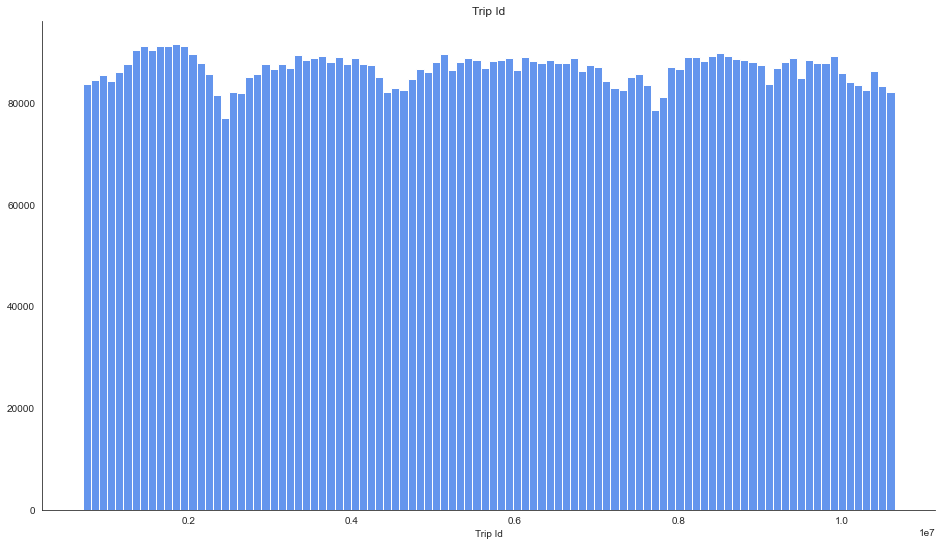


------------------------------------------------------------
Start Time
------------------------------------------------------------
    


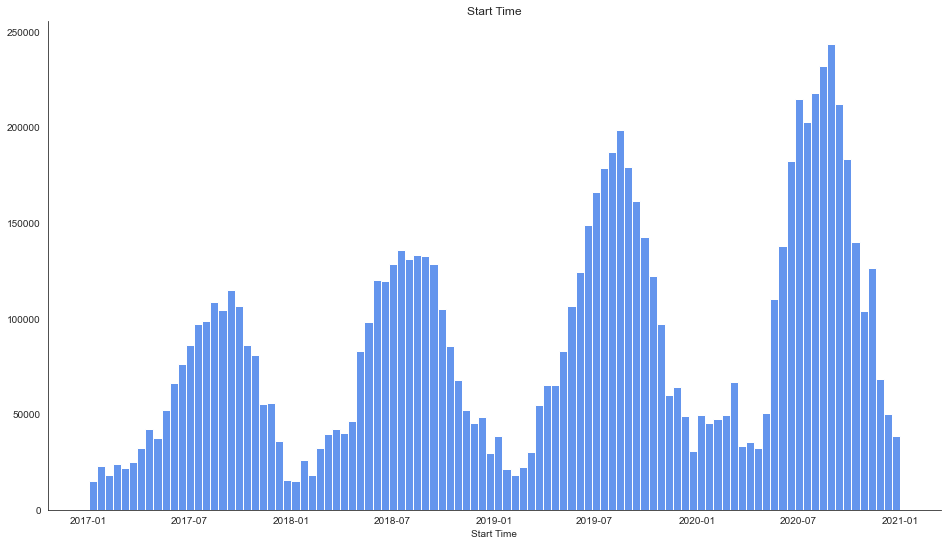


------------------------------------------------------------
Start Station Id
------------------------------------------------------------
    


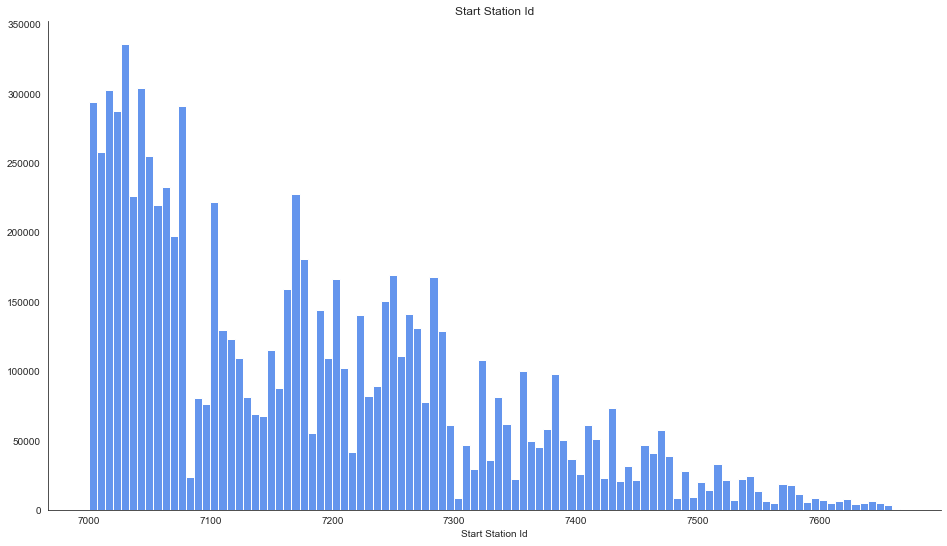


------------------------------------------------------------
Start Station Name
------------------------------------------------------------
    


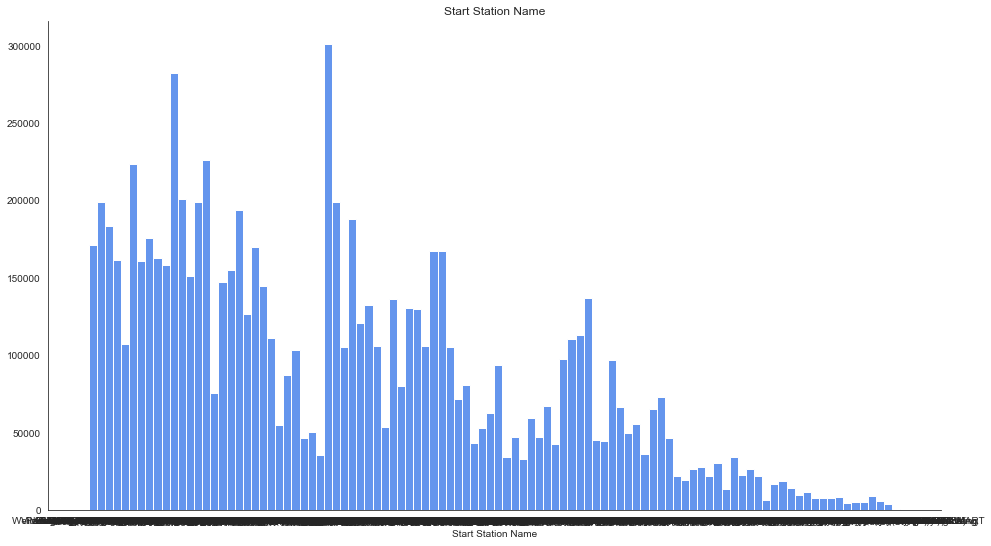


------------------------------------------------------------
Start Station Latitude
------------------------------------------------------------
    


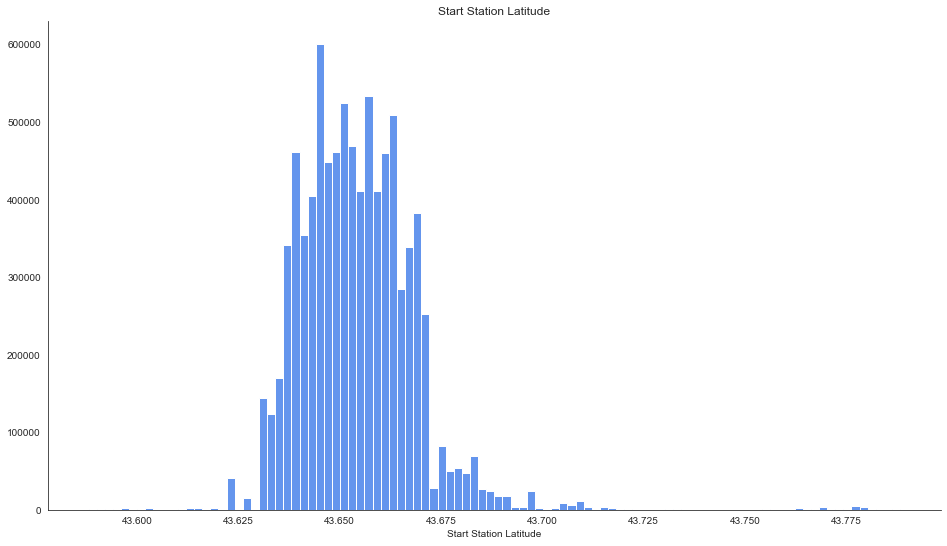


------------------------------------------------------------
Start Station Longitude
------------------------------------------------------------
    


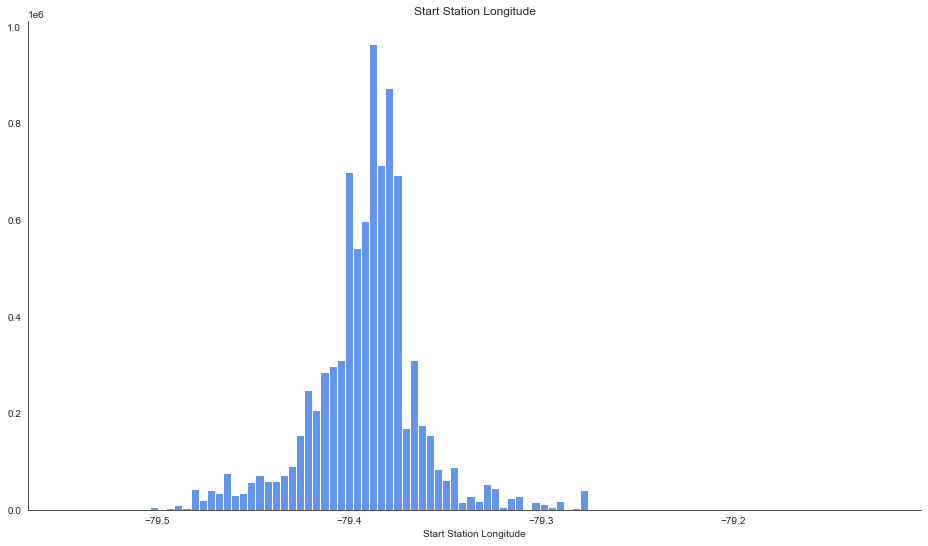


------------------------------------------------------------
Start Station Elevation
------------------------------------------------------------
    


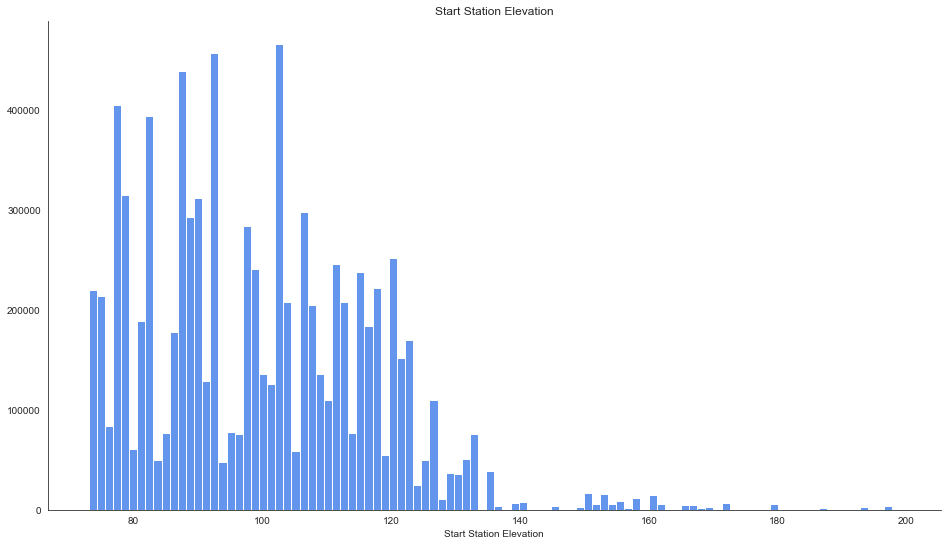


------------------------------------------------------------
Start Station Capacity
------------------------------------------------------------
    


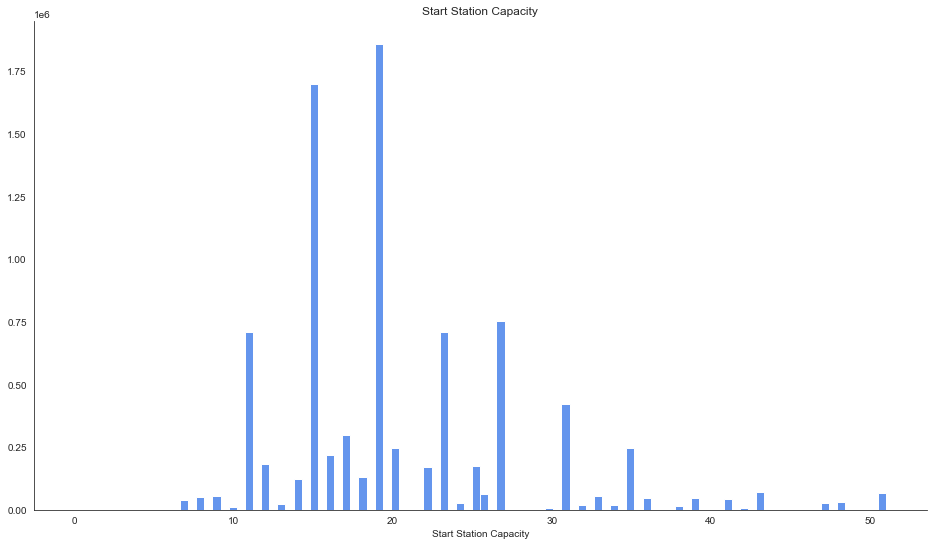


------------------------------------------------------------
Start Station Credit Card
------------------------------------------------------------
    


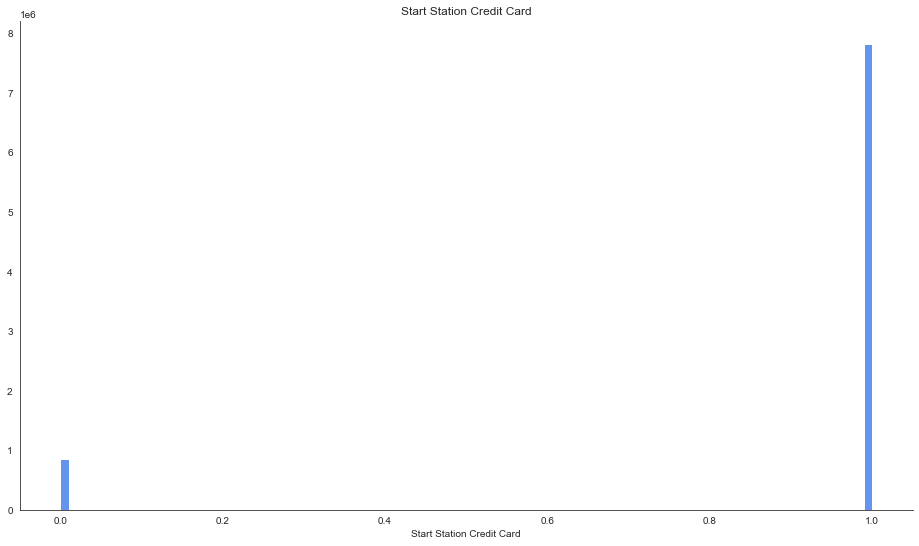


------------------------------------------------------------
Start Station FSA
------------------------------------------------------------
    


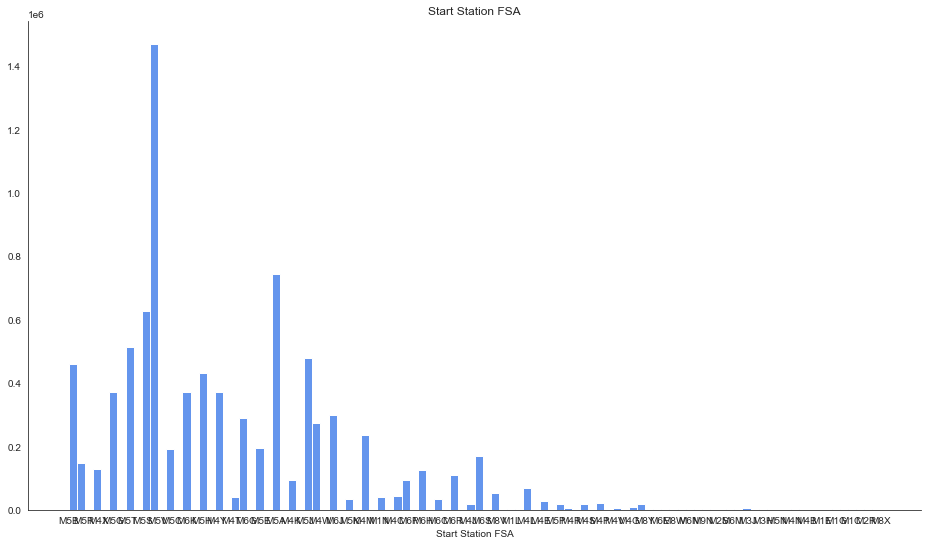


------------------------------------------------------------
End Time
------------------------------------------------------------
    


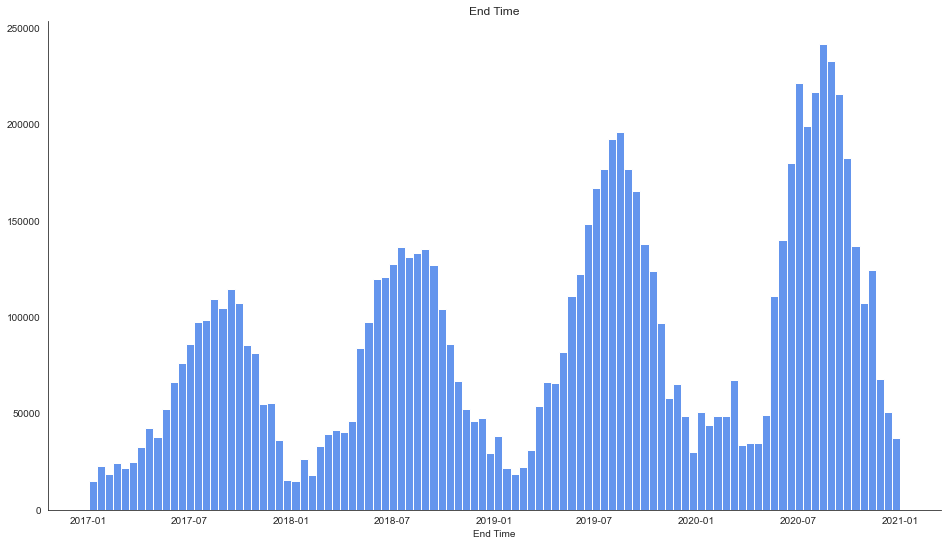


------------------------------------------------------------
End Station Id
------------------------------------------------------------
    


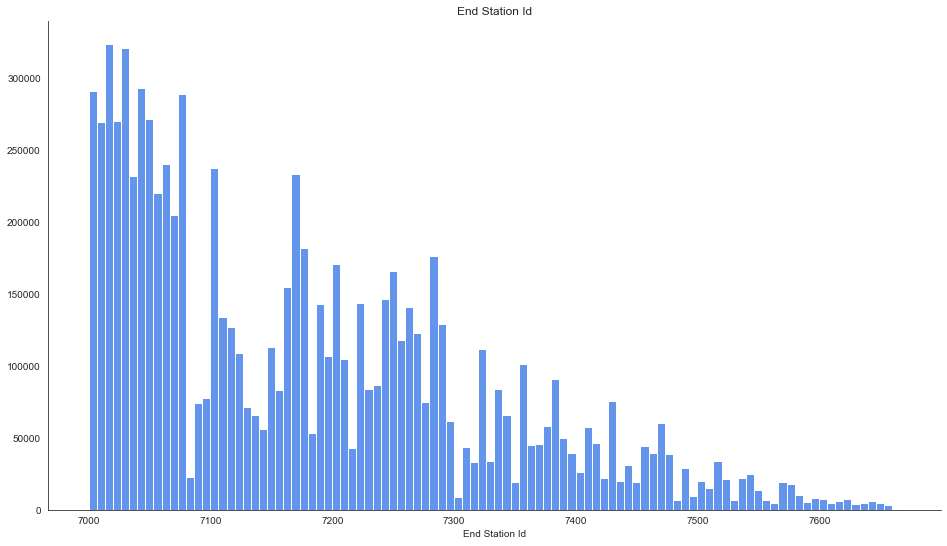


------------------------------------------------------------
End Station Name
------------------------------------------------------------
    


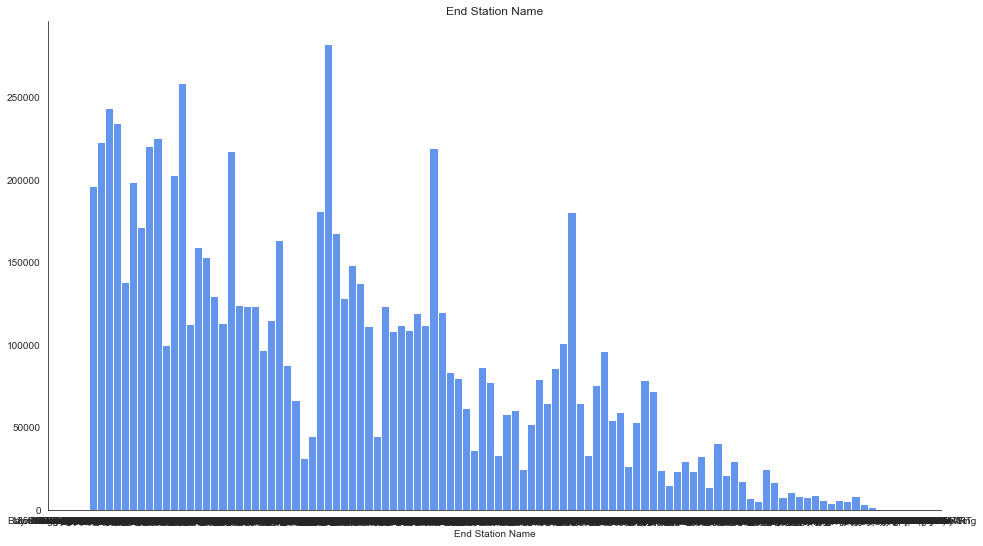


------------------------------------------------------------
End Station Latitude
------------------------------------------------------------
    


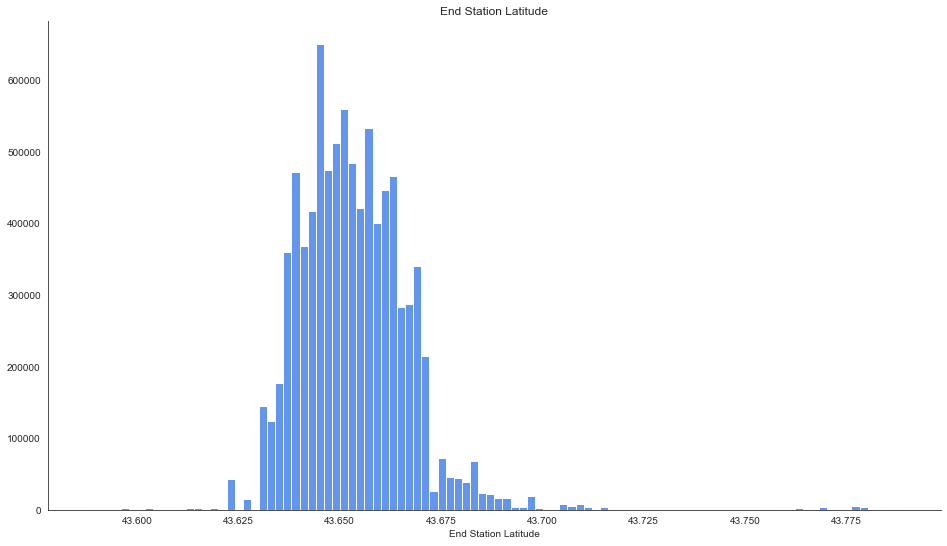


------------------------------------------------------------
End Station Longitude
------------------------------------------------------------
    


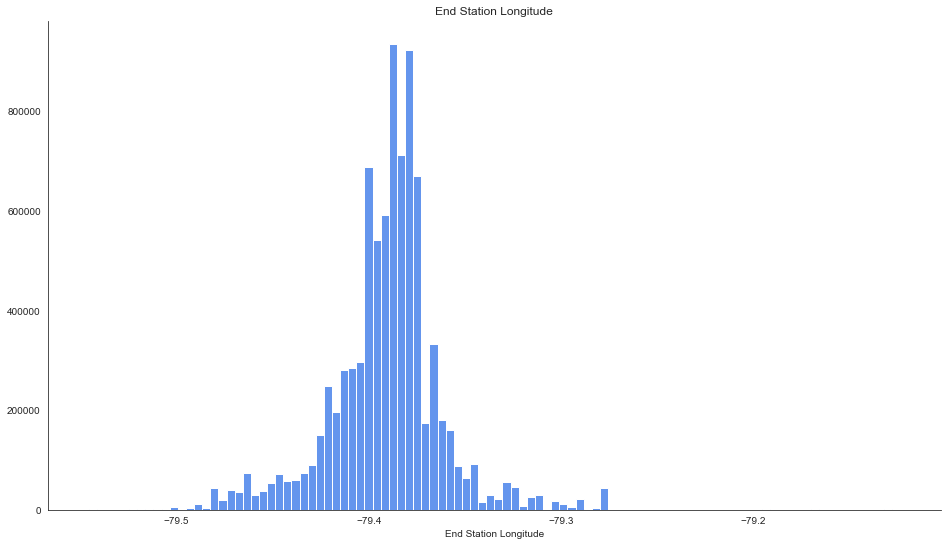


------------------------------------------------------------
End Station Elevation
------------------------------------------------------------
    


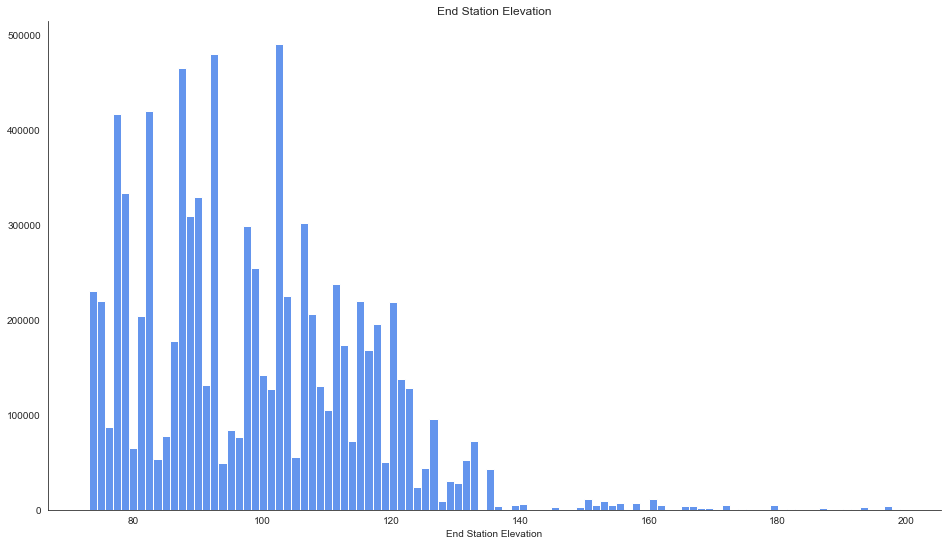


------------------------------------------------------------
End Station Capacity
------------------------------------------------------------
    


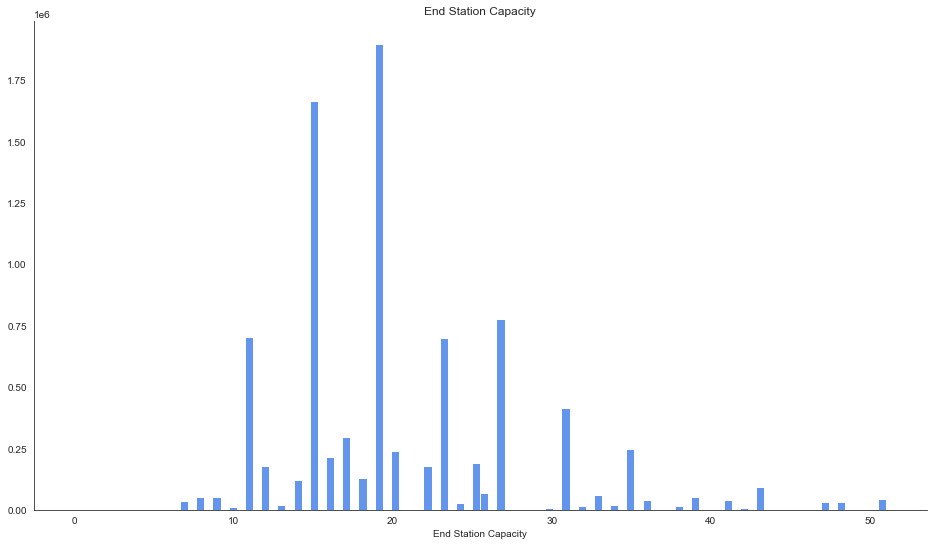


------------------------------------------------------------
End Station Credit Card
------------------------------------------------------------
    


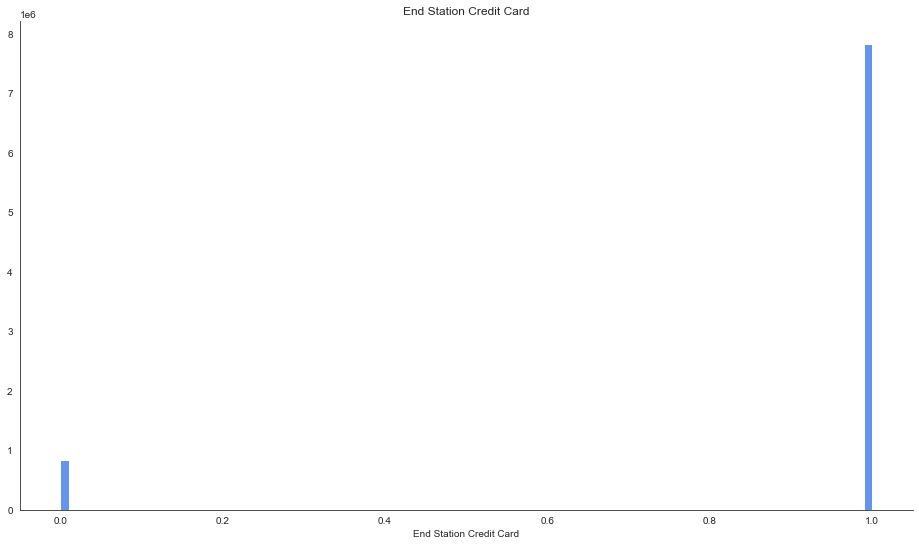


------------------------------------------------------------
End Station FSA
------------------------------------------------------------
    


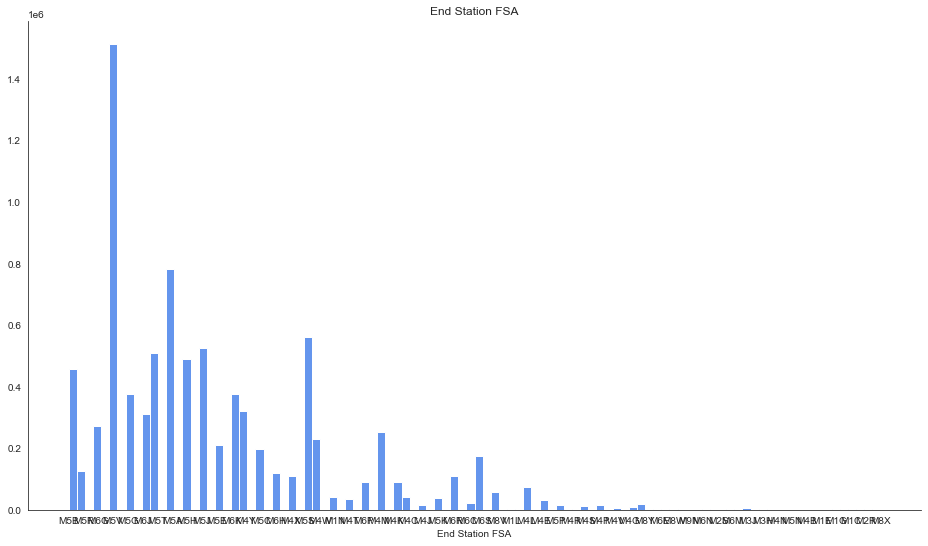


------------------------------------------------------------
Trip Duration (Seconds)
------------------------------------------------------------
    


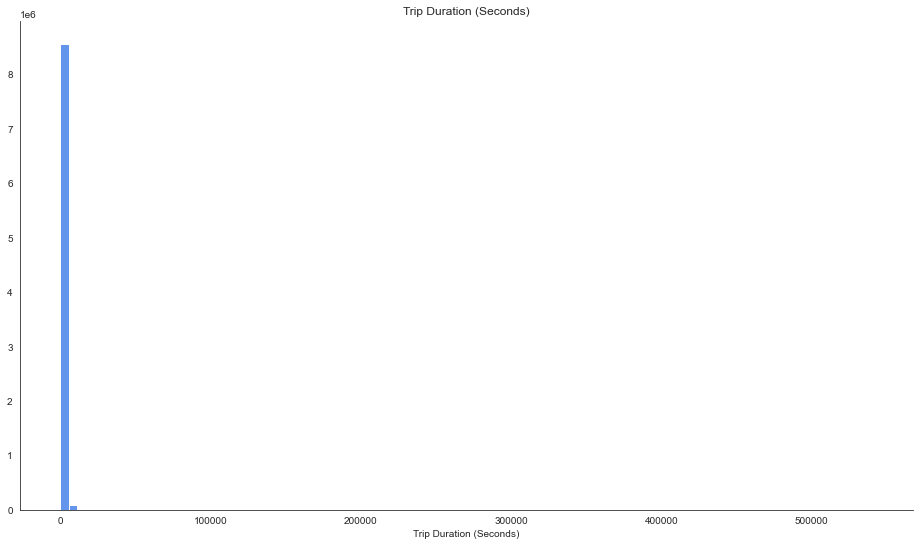


------------------------------------------------------------
Member
------------------------------------------------------------
    


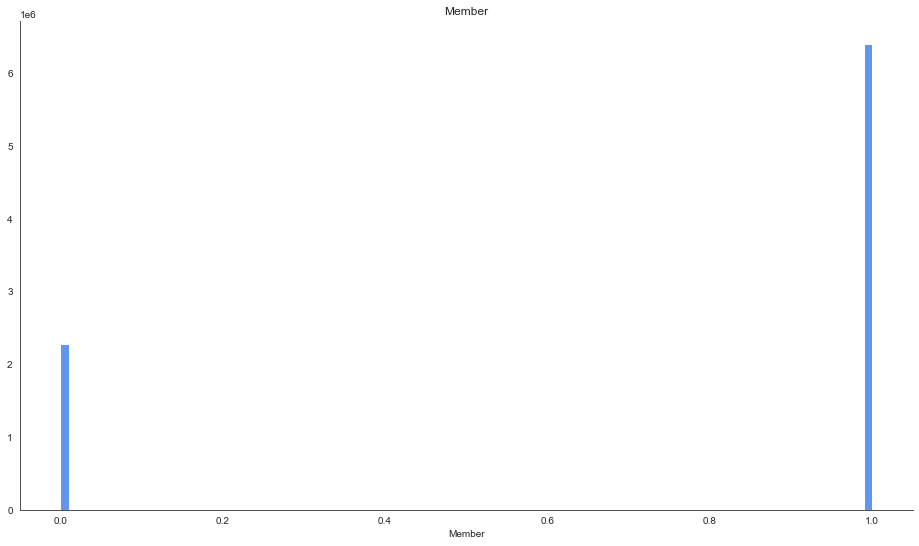


------------------------------------------------------------
Weekend
------------------------------------------------------------
    


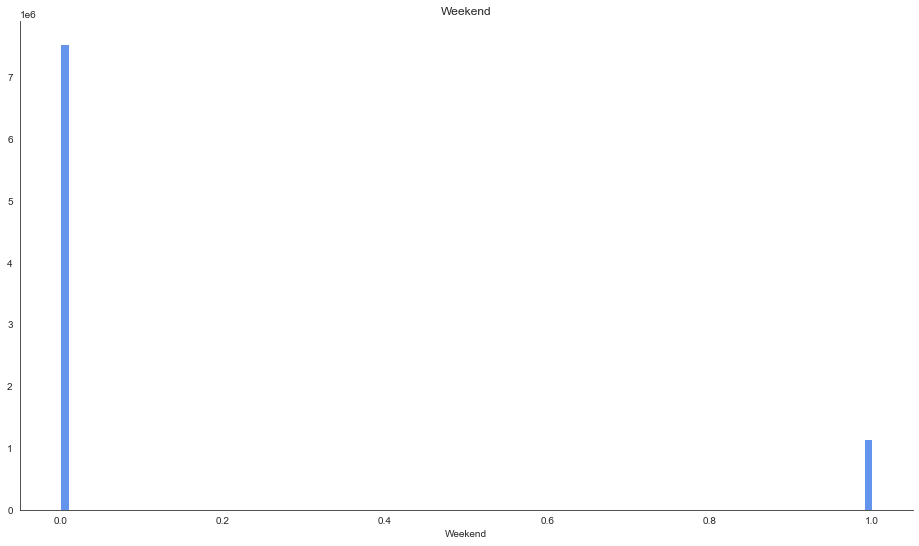


------------------------------------------------------------
Holiday
------------------------------------------------------------
    


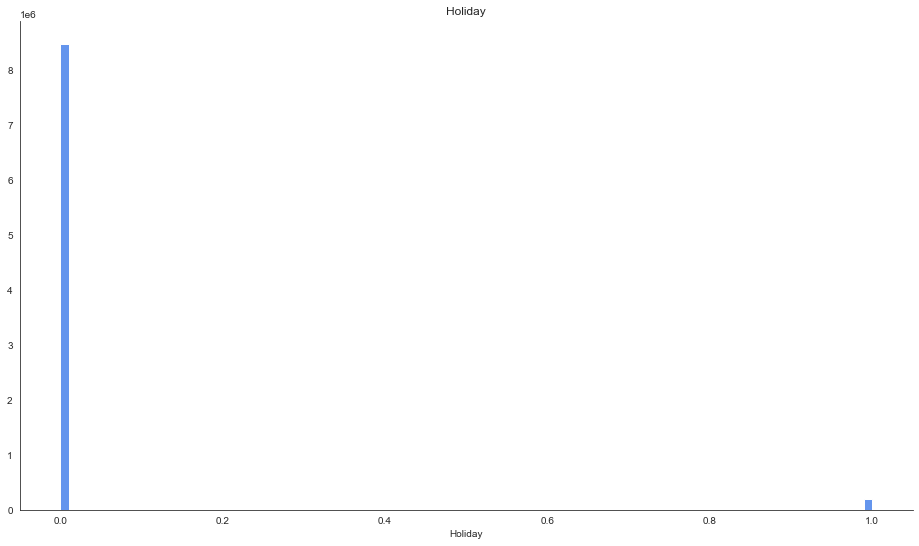


------------------------------------------------------------
Temp (°C)
------------------------------------------------------------
    


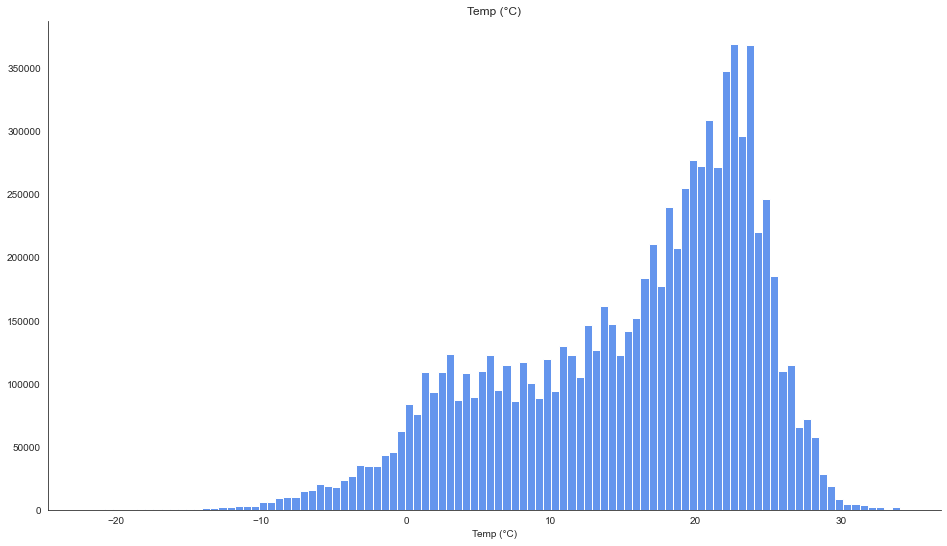


------------------------------------------------------------
Dew Point Temp (°C)
------------------------------------------------------------
    


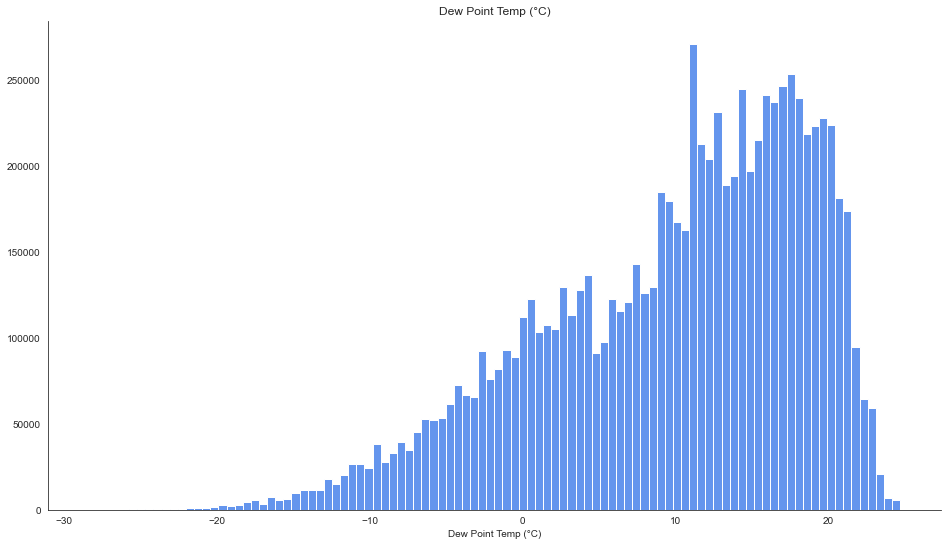


------------------------------------------------------------
Rel Hum (%)
------------------------------------------------------------
    


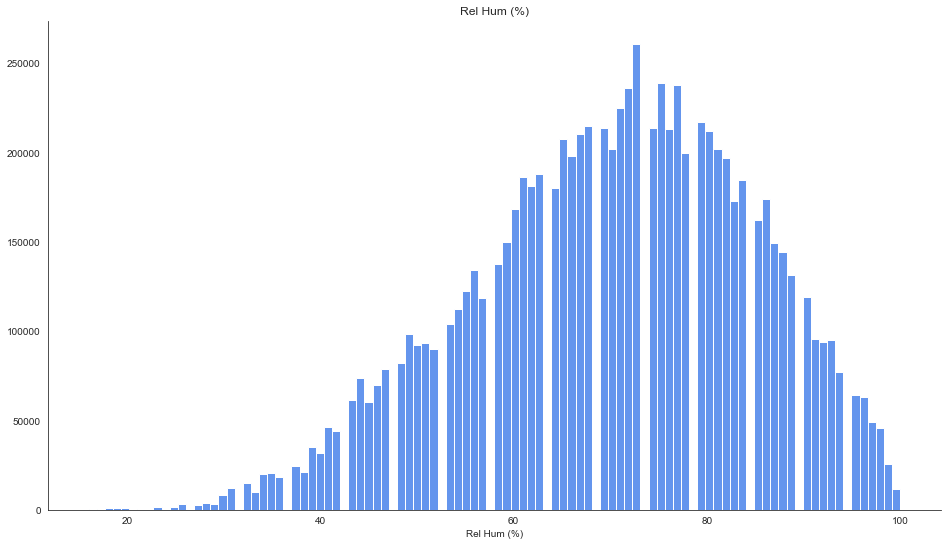


------------------------------------------------------------
Visibility (km)
------------------------------------------------------------
    


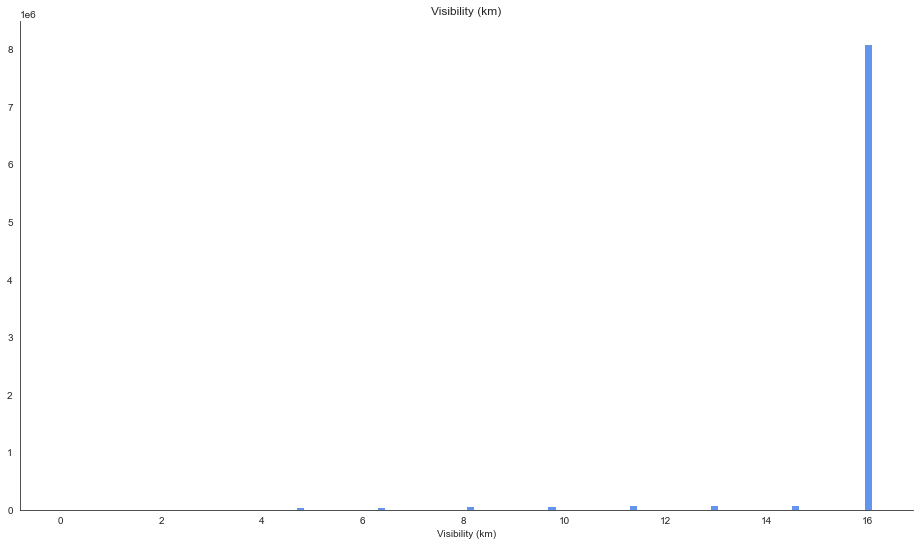


------------------------------------------------------------
Atm Pressure (kPa)
------------------------------------------------------------
    


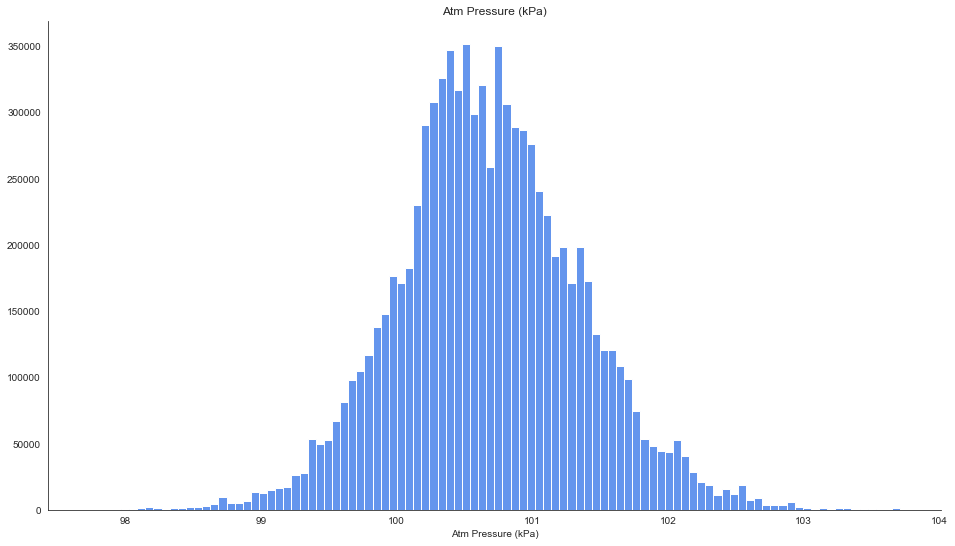


------------------------------------------------------------
Humidex
------------------------------------------------------------
    


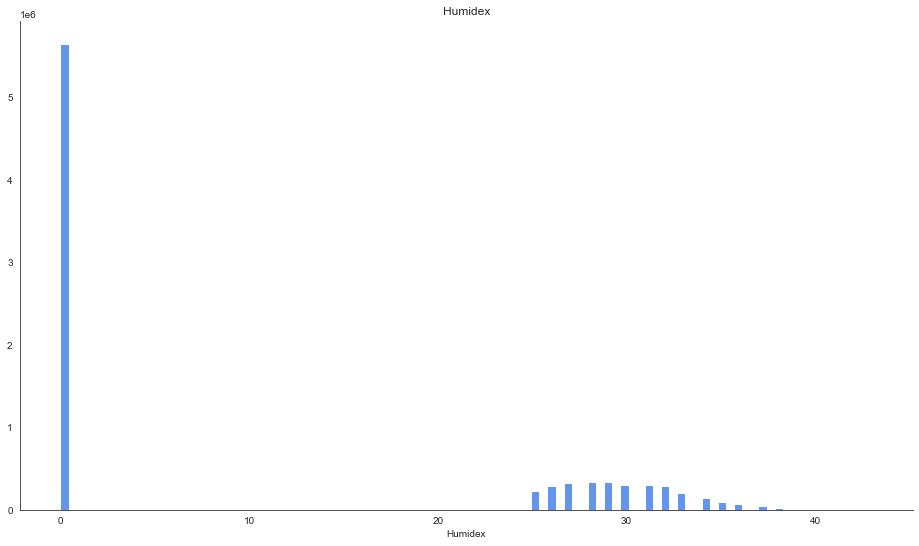


------------------------------------------------------------
Wind Chill
------------------------------------------------------------
    


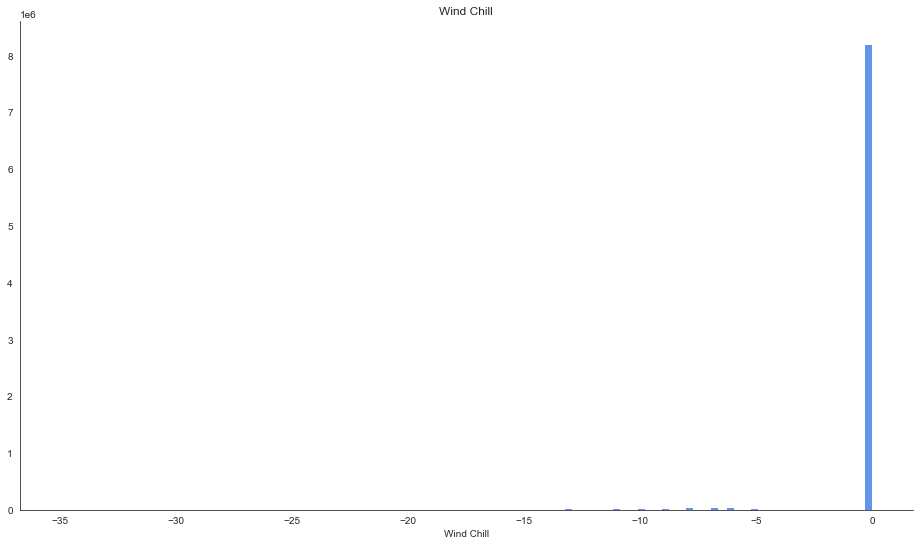


------------------------------------------------------------
Strong Wind
------------------------------------------------------------
    


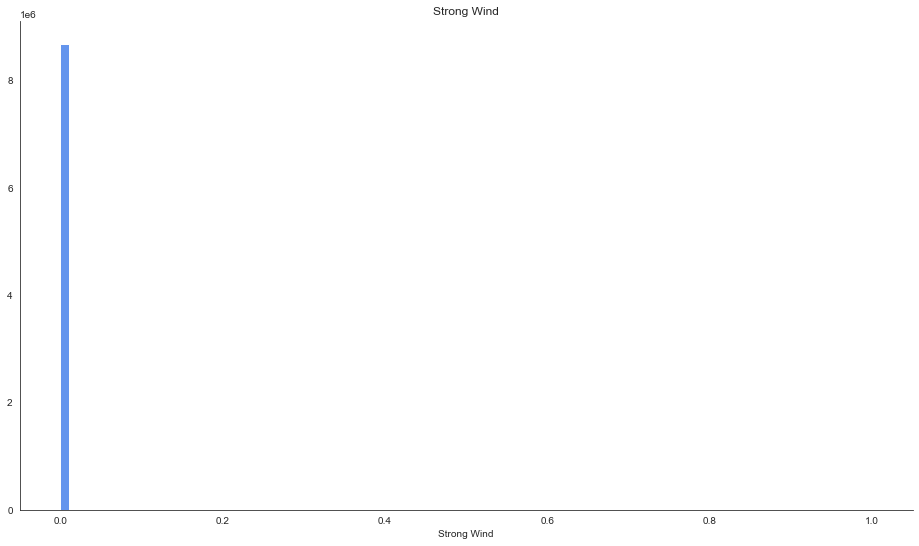


------------------------------------------------------------
Blowing Snow
------------------------------------------------------------
    


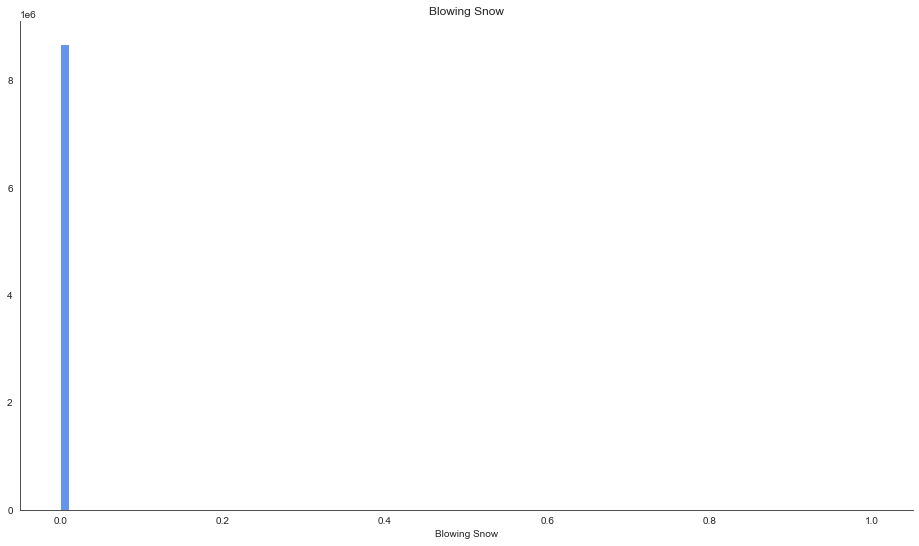


------------------------------------------------------------
Fog
------------------------------------------------------------
    


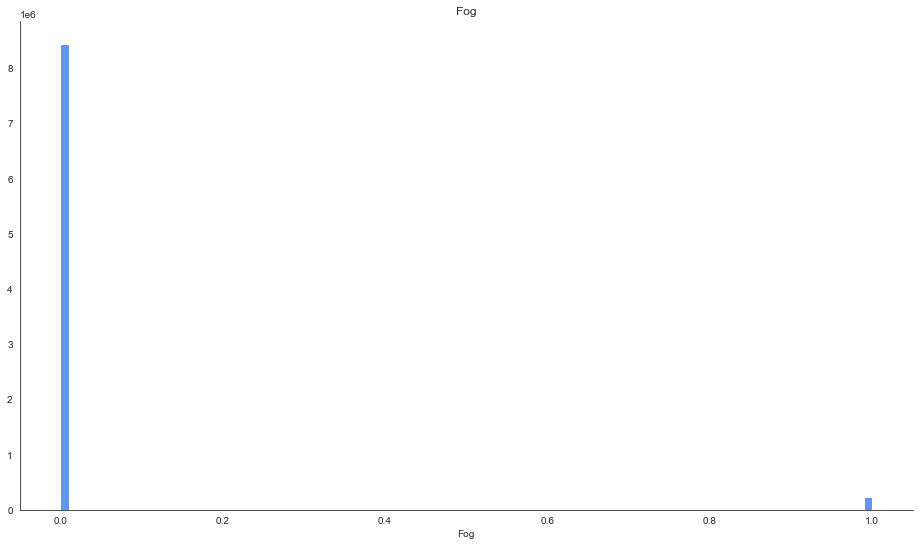


------------------------------------------------------------
Freezing Rain
------------------------------------------------------------
    


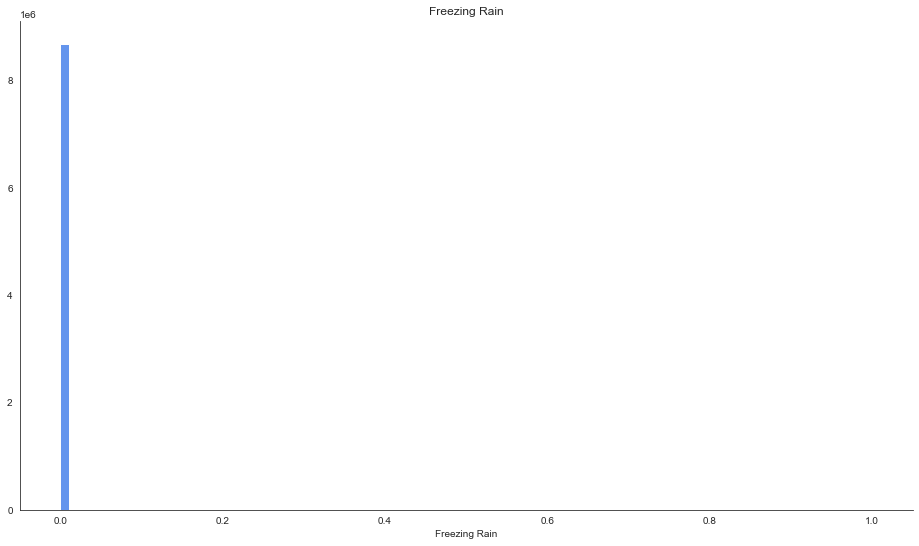


------------------------------------------------------------
Haze
------------------------------------------------------------
    


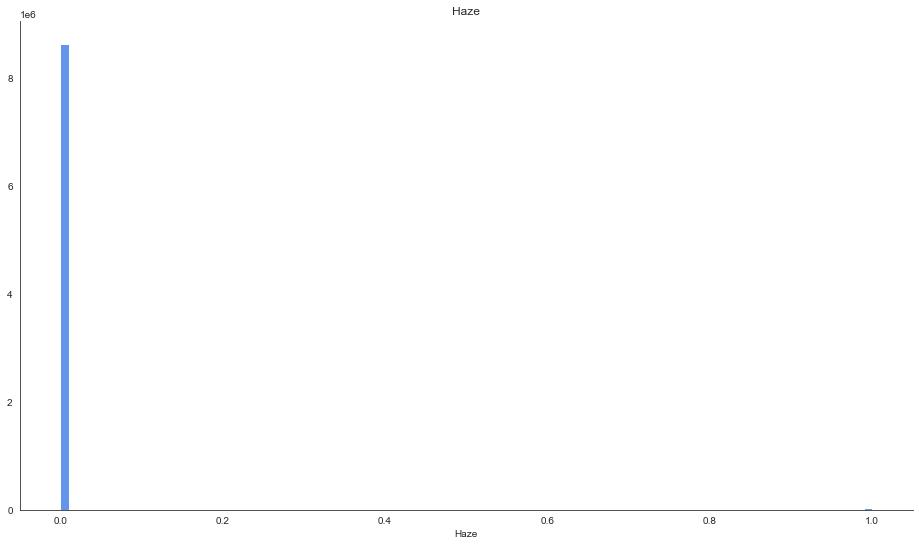


------------------------------------------------------------
Heavy Rain
------------------------------------------------------------
    


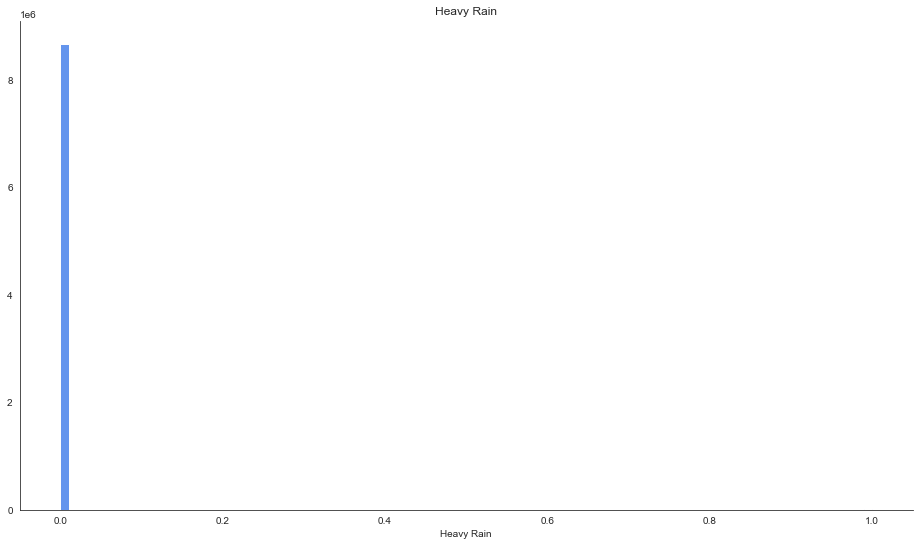


------------------------------------------------------------
Heavy Snow
------------------------------------------------------------
    


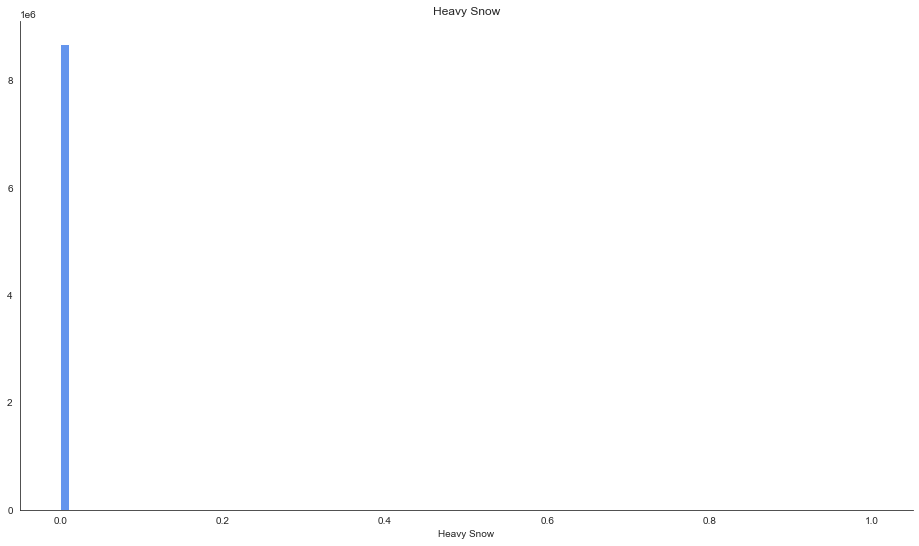


------------------------------------------------------------
Moderate Rain
------------------------------------------------------------
    


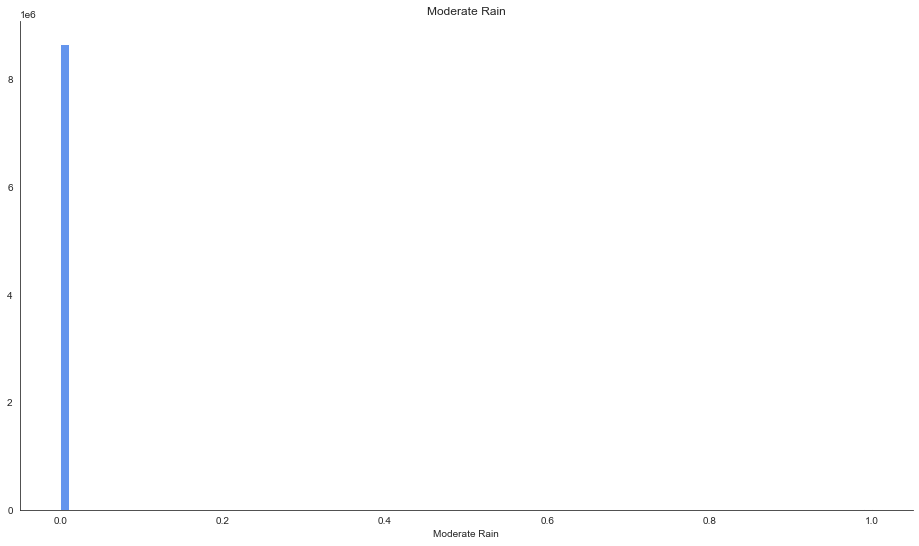


------------------------------------------------------------
Moderate Snow
------------------------------------------------------------
    


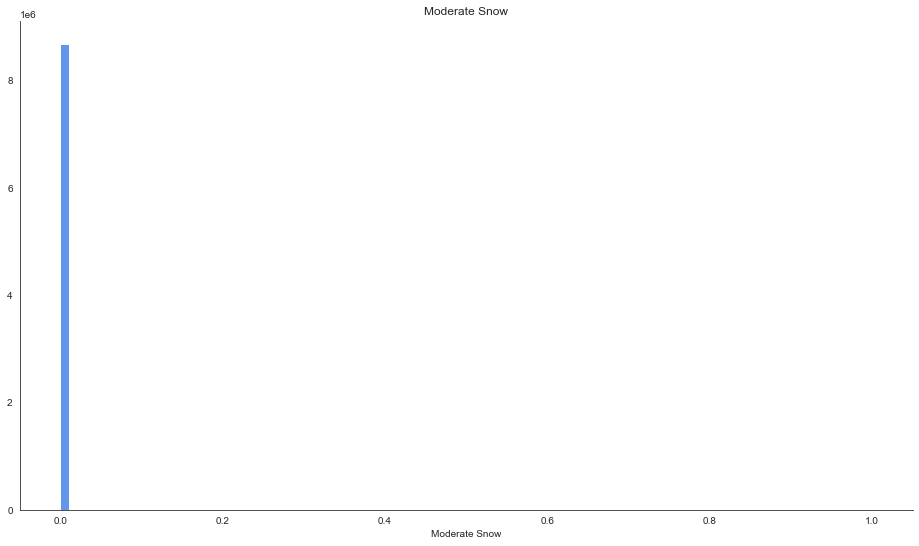


------------------------------------------------------------
Rain
------------------------------------------------------------
    


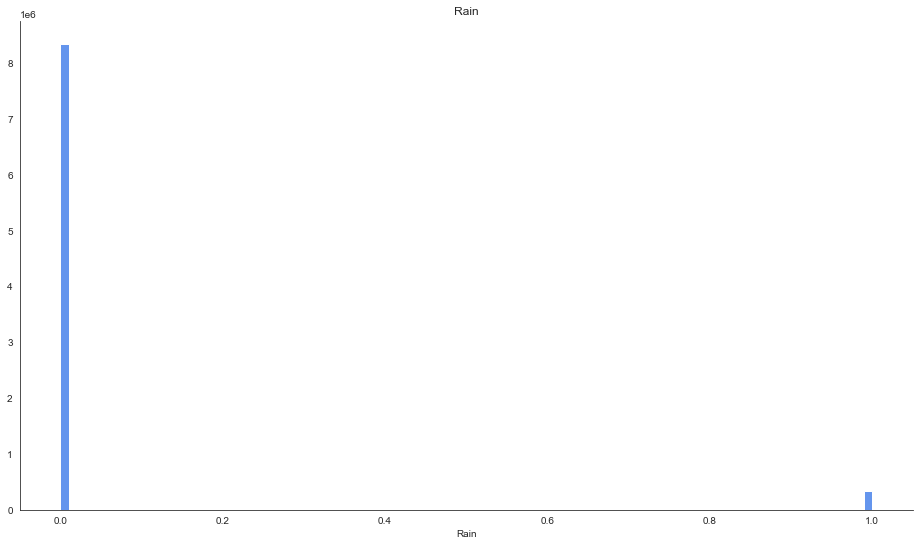


------------------------------------------------------------
Snow
------------------------------------------------------------
    


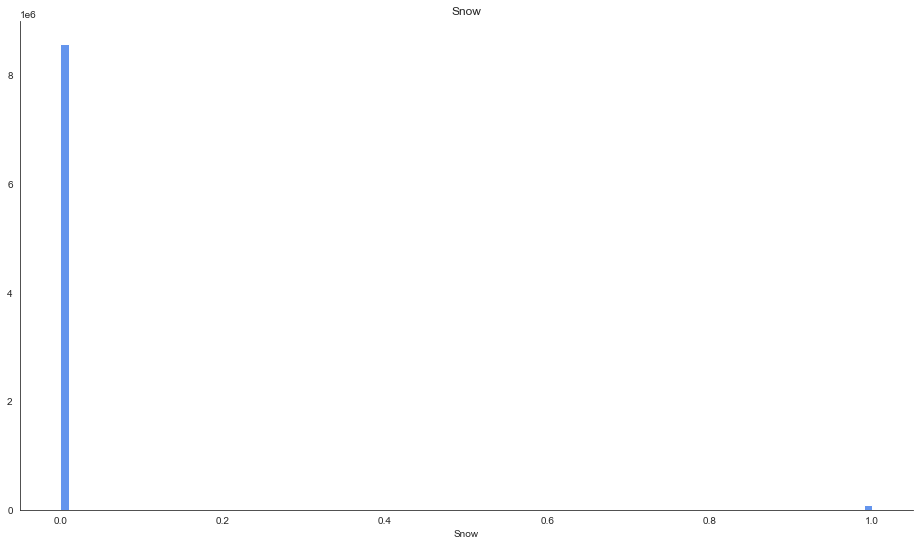


------------------------------------------------------------
Thunderstorms
------------------------------------------------------------
    


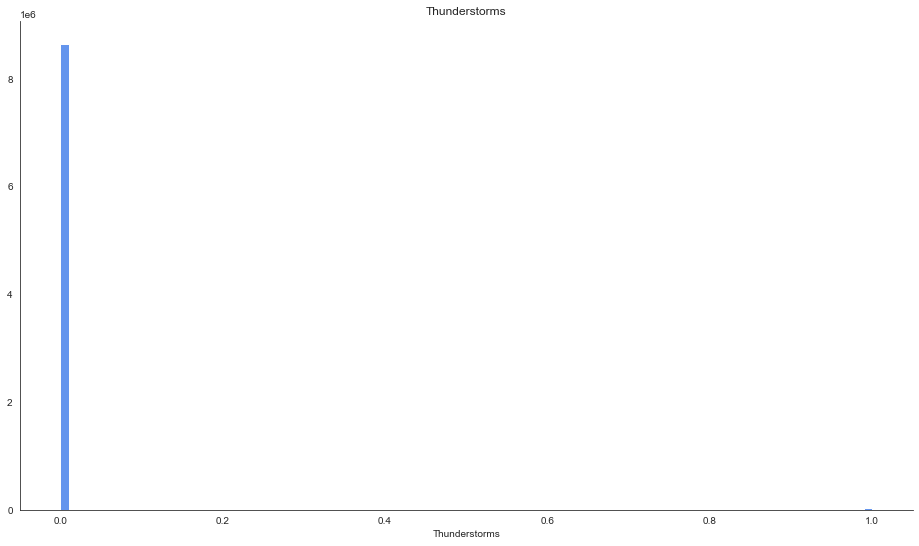

In [157]:
# Ignore runtime warning
import warnings
warnings.filterwarnings('ignore')

# Display histogram for each feature in dataframe
for col in df17_20:
    print(f"""
------------------------------------------------------------
{col}
------------------------------------------------------------
    """)
    plt.figure(figsize=(16, 9))
    plt.title(col)
    plt.hist(df17_20[col], color='cornflowerblue', bins=100)
    plt.xlabel(col)
    sns.despine()
    plt.show()

**_Observations_**<br>
- There is a clear seasonality displayed in the Start Time and End Time columns based on bike usage trend. 
- There tight binning happening in the Latitude and Longitude columns that may connote tight clustering of stations or that users take trips in a small geographic area, this can be better displayed on a map or network graph.
- Most of thr rides happen at the lower range of elevation between 80-100m.
- Most common trips are taken from stations with capacity around 20 bikes then 15 bikes and thirdly 10 bikes.
- Most common temperature at the start of trip is around 18-25°C which can indicate that is the most ideal temperature bike users prefer to take trips.
- Most common relative humidity at the start of trip is between 60% to 80% which can indicate that is the most ideal relative humidity bike users prefer to take trips.
- While majority of rides happen when there are no weather events, rain seems the most common for riders to ride in compared to other events.

In [158]:
# Display most active FSA in the last 4 years
df17_20.groupby(['Start Station FSA']).size().reset_index(name='count').sort_values(by = 'count', ascending=False).head()

,Start Station FSA,count
39,M5V,1470021
26,M5A,743799
37,M5S,625911
38,M5T,512619
32,M5J,477483


**_Observations_**<br>
The top 5 most active FSA neighbourhoods are all downtown areas with M5V being the most active and also most dense in population as well as encompassing a number of tourist attractions.

### Time Scale Graphs

Back to [Table of Contents](#Table-of-Contents).<br>

I will now chart to time series graphs of the bike usage over the 4 years of dataset.

In [159]:
# Saving all trips `Start Time` to a temp series
t_series = pd.to_datetime(df17_20['Start Time'])

# Creating dataframe and groupby day with count of trips
dtrips_df = t_series.groupby(t_series.dt.floor('d')).size().reset_index(name='Trip Count')

# Check
display(dtrips_df.head(5))

,Start Time,Trip Count
0,2017-01-01,485
1,2017-01-02,769
2,2017-01-03,918
3,2017-01-04,1351
4,2017-01-05,1199


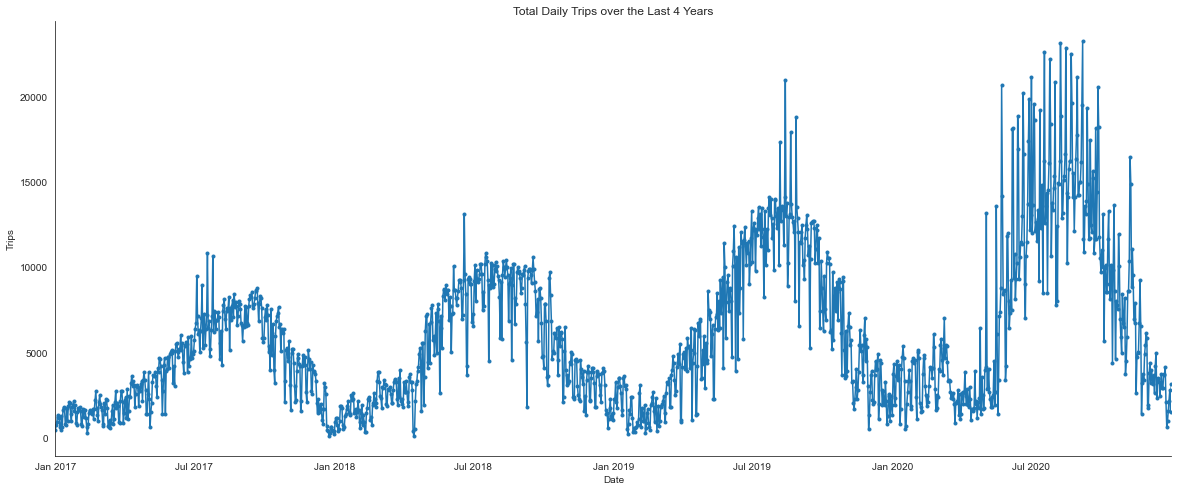

In [160]:
from matplotlib.dates import DateFormatter

# Plot time series chart for all daily trips
plt.figure(figsize=(20,8))
ax = plt.gca()
plt.plot(dtrips_df['Start Time'], dtrips_df['Trip Count'], marker='.')
plt.xlabel('Date')
plt.ylabel('Trips')
plt.title('Total Daily Trips over the Last 4 Years')
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))

sns.despine()
plt.show();

**Observations**<br>
Trips have been on the upward trend over the years with the last few months having the most variation between each day compared to previous years.

In [161]:
# Closer look into each year
dtrips_df17 = dtrips_df[dtrips_df['Start Time'].dt.year==2017]
dtrips_df18 = dtrips_df[dtrips_df['Start Time'].dt.year==2018]
dtrips_df19 = dtrips_df[dtrips_df['Start Time'].dt.year==2019]
dtrips_df20 = dtrips_df[dtrips_df['Start Time'].dt.year==2020]

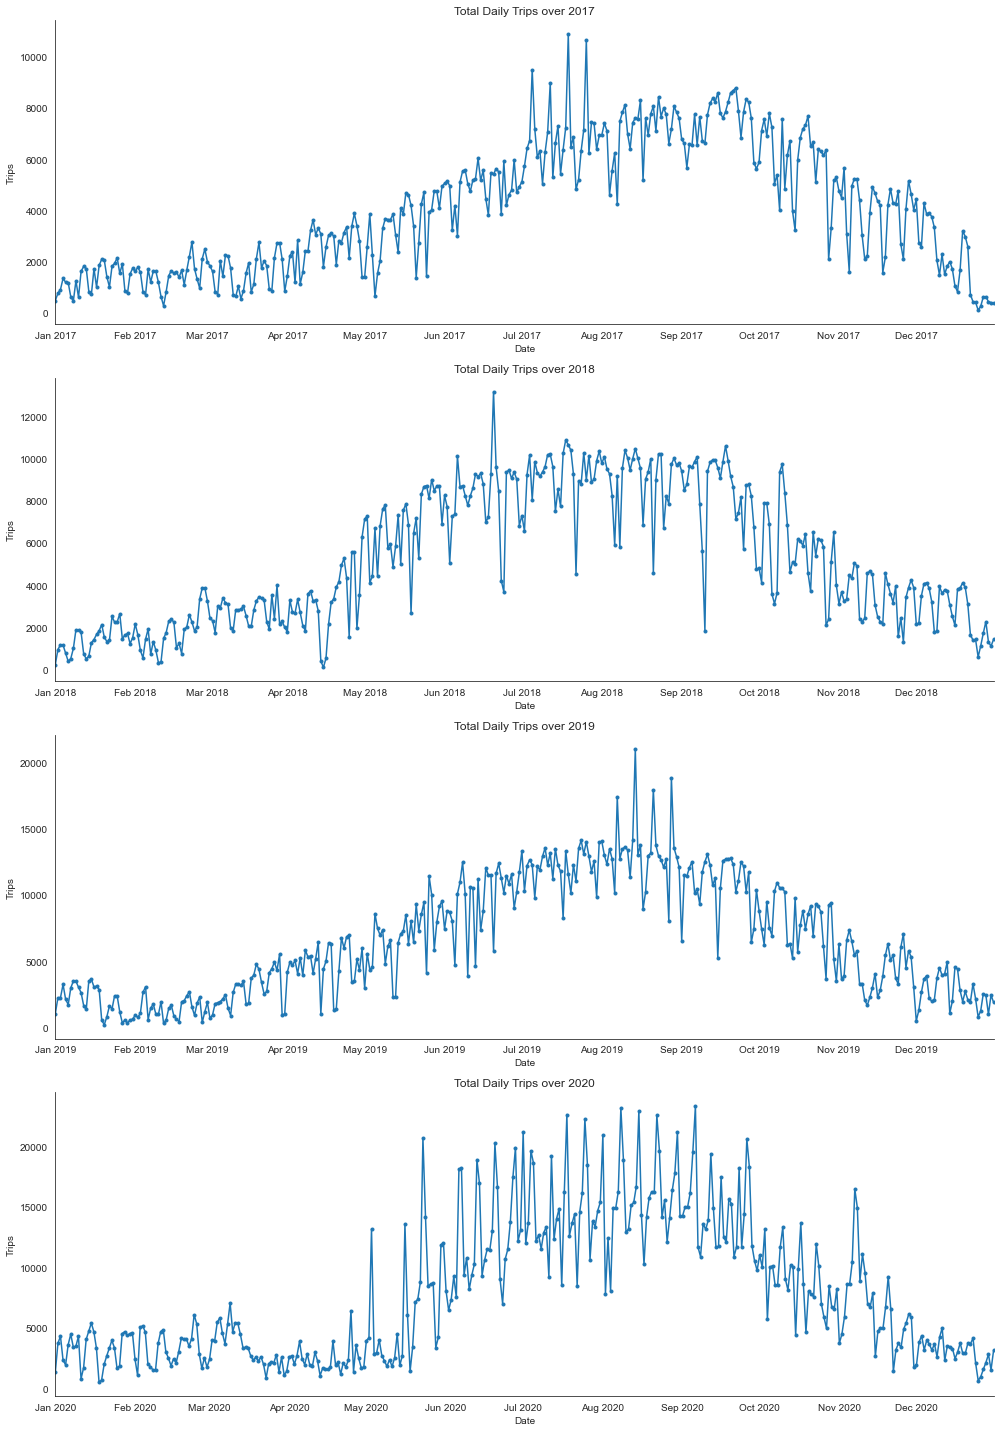

In [162]:
# Subplots of the time series chart of each year
# Can possibly shorten the code in the fture by writing a loop function.

plt.subplots(4, 2, figsize=(14, 20))

# Daily trips for 2017
plt.subplot(4, 1, 1)
ax = plt.gca()
plt.plot(dtrips_df17['Start Time'], dtrips_df17['Trip Count'], marker='.')
plt.xlabel('Date')
plt.ylabel('Trips')
plt.title('Total Daily Trips over 2017')
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))

# Daily trips for 2018
plt.subplot(4, 1, 2)
ax = plt.gca()
plt.plot(dtrips_df18['Start Time'], dtrips_df18['Trip Count'], marker='.')
plt.xlabel('Date')
plt.ylabel('Trips')
plt.title('Total Daily Trips over 2018')
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))

# Daily trips for 2019
plt.subplot(4, 1, 3)
ax = plt.gca()
plt.plot(dtrips_df19['Start Time'], dtrips_df19['Trip Count'], marker='.')
plt.xlabel('Date')
plt.ylabel('Trips')
plt.title('Total Daily Trips over 2019')
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))

# Daily trips for 2020
plt.subplot(4, 1, 4)
ax = plt.gca()
plt.plot(dtrips_df20['Start Time'], dtrips_df20['Trip Count'], marker='.')
plt.xlabel('Date')
plt.ylabel('Trips')
plt.title('Total Daily Trips over 2020')
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))

sns.despine()
plt.tight_layout()
plt.show()

In [163]:
# Creating dataframe and groupby `Start Station Id` and `Start Station Name` with count of trips
# trips17_20.groupby(['Start Station Id','Start Station Name']).size().reset_index(name='count')

---
## Section 4: Conclusions

#### Observations & Trends
Just to reinterate the observations and trends from before:
- Trips have been on the upward trend over the years with the 2020 having the most weekly variation compared to previous years.
- There is also a clear seasonality each year where the most rides happen in the heart of summer and least rides in the winter months. 
-  Station usage pattern have been relatively consistant the previous 3 years where the top 5 start and stop stations have been a mix of downtown stations and harbourfront where in 2020 all the top start and stop stations are along the harbourfront.
- Most of thr rides happen at the lower range of elevation between 80-100m, indicating this to be places closer to the water.
- Most common trips are taken from stations with capacity around 20 bikes then 15 bikes and thirdly 10 bikes.
- Most common temperature at the start of trip is around 18-25°C which can indicate that is the most ideal temperature bike users prefer to take trips.
- Most common relative humidity at the start of trip is between 60% to 80% which can indicate that is the most ideal relative humidity bike users prefer to take trips.
- Most trips happen outside of weather events with rain being the most common if there were to be a ride when a weather event is occurring.
- The top 5 most active FSA neighbourhoods are all downtown areas with M5V being the most active and also most dense in population as well as encompassing a number of tourist attractions.

#### Suggestions
- While 2020 was an atypical year from others there is a clear trend for higher weekend usage and that was amplified in 2020 and could well continue into the 2021 as people get more used to the service as tourism ramps back up.

#### Next Steps
- Complete Machine Learning Models, Time Series Analysis, and Network Analysis in subsequent notebooks.